In [15]:
import cv2


over_90=[]
import os
for folders in os.listdir('/home/alpaco/project/drunk_prj/data/videofile/32.이동 행위'):
    vid_path = os.path.join('/home/alpaco/project/drunk_prj/data/videofile/32.이동 행위',folders)
    for video in os.listdir(vid_path):
        video_path = os.path.join(vid_path,video)
        
        cap = cv2.VideoCapture(video_path)

        if not cap.isOpened():
            print("동영상을 열 수 없습니다.")
        else:
            # 총 프레임 수 확인
            total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
        if total_frames >=90:
            csv_s = video.split('.')[0]+'.csv'
            new_path = os.path.join('/home/alpaco/project/drunk_prj/data/normal_ver2',folders)
            new_path = os.path.join(new_path,'abs')
            new_path = os.path.join(new_path,csv_s)
            over_90.append([new_path,total_frames//2-45,total_frames//2+45])
        # 자원 해제
        cap.release()
        
    

In [ ]:
over_900=[]
for file in os.listdir('/home/alpaco/project/drunk_prj/data/comfirm_video1/totter/Abs'):
    folder = os.path.join('/home/alpaco/project/drunk_prj/data/comfirm_video1/totter/Abs',file)
    

In [48]:
import pandas as pd
import os


# 잘린 CSV 파일을 저장할 폴더 경로
cutting_folder = "/home/alpaco/project/drunk_prj/data/abs_normal_30초"
os.makedirs(cutting_folder, exist_ok=True)

# 작업 수행
for entry in over_900:
    csv_path, start_frame, end_frame = entry
    
    # CSV 파일 읽기
    try:
        df = pd.read_csv(csv_path)
    except Exception as e:
        print(f"CSV 파일을 열 수 없습니다: {csv_path}. 오류: {e}")
        continue

    # 'frame' 열에서 특정 범위의 데이터만 필터링
    if 'frame' not in df.columns:
        print(f"'frame' 열이 없습니다: {csv_path}")
        continue
    
    filtered_df = df[(df['frame'] >= start_frame) & (df['frame'] <= end_frame)]
    
    # 저장할 파일 이름 및 경로 생성
    file_name = os.path.basename(csv_path).replace(".csv", f"_({start_frame}_{end_frame}).csv")
    output_path = os.path.join(cutting_folder, file_name)

    # 필터링된 데이터 저장
    try:
        filtered_df.to_csv(output_path, index=False)
        print(f"저장 완료: {output_path}")
    except Exception as e:
        print(f"파일 저장 중 오류 발생: {output_path}. 오류: {e}")


저장 완료: /home/alpaco/project/drunk_prj/data/abs_normal_30초/C_32_9_smp_su_09-11_13-21-00_b_aft_DF2_(52_142).csv
저장 완료: /home/alpaco/project/drunk_prj/data/abs_normal_30초/C_32_9_smp_su_09-11_12-53-00_b_aft_DF2_(54_144).csv
저장 완료: /home/alpaco/project/drunk_prj/data/abs_normal_30초/C_32_9_smp_su_09-11_12-56-00_b_aft_DF2_(53_143).csv
저장 완료: /home/alpaco/project/drunk_prj/data/abs_normal_30초/C_32_9_smp_su_09-11_13-23-00_a_aft_DF2_(52_142).csv
저장 완료: /home/alpaco/project/drunk_prj/data/abs_normal_30초/C_32_9_smp_su_09-11_12-56-00_a_aft_DF2_(53_143).csv
저장 완료: /home/alpaco/project/drunk_prj/data/abs_normal_30초/C_32_9_smp_su_09-11_12-50-00_a_aft_DF2_(55_145).csv
저장 완료: /home/alpaco/project/drunk_prj/data/abs_normal_30초/C_32_9_smp_su_09-11_13-23-00_b_aft_DF2_(52_142).csv
저장 완료: /home/alpaco/project/drunk_prj/data/abs_normal_30초/C_32_9_smp_su_09-11_13-01-00_c_aft_DF2_(53_143).csv
저장 완료: /home/alpaco/project/drunk_prj/data/abs_normal_30초/C_32_9_smp_su_09-11_13-25-00_c_aft_DF2_(52_142).csv
저장 완료: /ho

In [ ]:
import os
import re
import pandas as pd

# 입력 및 출력 디렉토리 설정
input_folder = '/home/alpaco/project/drunk_prj/data/abs_normal_30초'
output_folder = '/home/alpaco/project/drunk_prj/data/abs_normal_0넣기'
os.makedirs(output_folder, exist_ok=True)

# 입력 폴더의 모든 파일 반복 처리
for csv_file in os.listdir(input_folder):
    # CSV 파일만 처리
    if not csv_file.endswith('.csv'):
        continue

    # 파일 이름에서 최소, 최대 값 추출
    file_name = csv_file.split(".")[0]
    match = re.search(r'\((\d+)_(\d+)\)', file_name)
    if not match:
        print(f"파일 이름에서 최소/최대 값을 찾을 수 없습니다: {file_name}")
        continue  # 중단하지 않고 다음 파일로 이동

    min_frame, max_frame = map(int, match.groups())

    # CSV 파일 읽기
    csv_path = os.path.join(input_folder, csv_file)
    try:
        df = pd.read_csv(csv_path)
        print(f"CSV 파일 읽기 성공: {csv_path}")
    except Exception as e:
        print(f"CSV 파일을 읽을 수 없습니다: {csv_path}. 오류: {e}")
        continue

    # 'label' 열 확인
    if 'label' not in df.columns:
        print(f"'label' 열이 없습니다: {csv_path}. 파일을 건너뜁니다.")
        continue

    # 'frame' 열 확인
    if 'frame' not in df.columns:
        print(f"'frame' 열이 없습니다: {csv_path}. 파일을 건너뜁니다.")
        continue

    # 'label' 열을 기준으로 그룹화 및 프레임 보정
    processed_dfs = []
    for label, group in df.groupby('label'):
        # 전체 프레임 범위 생성
        full_frames = pd.DataFrame({'frame': range(min_frame, max_frame + 1)})

        # 기존 데이터와 병합하여 누락된 프레임 추가
        merged = pd.merge(full_frames, group, on='frame', how='left')

        # 누락된 값 채우기
        for col in merged.columns:
            if col != 'frame' and col != 'label':  # frame과 label 열은 유지
                merged[col] = merged[col].fillna(0)
        merged['label'] = merged['label'].fillna(label)

        # 처리된 데이터 저장
        processed_dfs.append(merged)

    # 그룹 데이터 병합
    if processed_dfs:
        final_df = pd.concat(processed_dfs, ignore_index=True)
    else:
        print(f"처리된 데이터가 없습니다: {csv_path}. 파일을 건너뜁니다.")
        continue

    # 결과 저장 경로
    output_path = os.path.join(output_folder, csv_file)
    try:
        final_df.to_csv(output_path, index=False)
        print(f"처리 완료: {output_path}")
    except Exception as e:
        print(f"결과를 저장하는 동안 오류 발생: {output_path}. 오류: {e}")


CSV 파일 읽기 성공: /home/alpaco/project/drunk_prj/data/chroma3frame/217-2_cam02_drunken04_place03_night_summer_153_1969_part0.mp4_combined.csv
처리 완료: /home/alpaco/project/drunk_prj/data/chroma3frame0넣기/217-2_cam02_drunken04_place03_night_summer_153_1969_part0.mp4_combined.csv
CSV 파일 읽기 성공: /home/alpaco/project/drunk_prj/data/chroma3frame/209-5_cam02_drunken01_place03_night_winter_413_2350_part1.mp4_combined.csv
처리 완료: /home/alpaco/project/drunk_prj/data/chroma3frame0넣기/209-5_cam02_drunken01_place03_night_winter_413_2350_part1.mp4_combined.csv
CSV 파일 읽기 성공: /home/alpaco/project/drunk_prj/data/chroma3frame/217-6_cam03_drunken04_place03_night_spring_174_1098_part0.mp4_combined.csv
처리 완료: /home/alpaco/project/drunk_prj/data/chroma3frame0넣기/217-6_cam03_drunken04_place03_night_spring_174_1098_part0.mp4_combined.csv
CSV 파일 읽기 성공: /home/alpaco/project/drunk_prj/data/chroma3frame/278-2_cam02_drunken03_place03_night_spring_210_1287_part0.mp4_combined.csv
처리 완료: /home/alpaco/project/drunk_prj/data/chr

In [22]:
over_900=[]
for folders in os.listdir('/home/alpaco/project/drunk_prj/data/comfirm_video1/totter/Rel'):
    vid_path = os.path.join('/home/alpaco/project/drunk_prj/data/comfirm_video1/totter/Rel',folders)
    for video in os.listdir(vid_path):
        start,end = int(video.split('_')[-3]),int((video.split('_')[-2]).split('.')[0])
        total = end- start
        if total >=900:
            video_name = os.path.join(vid_path,video)
            over_900.append([video_name,total//2-450,total//2+450])            

In [ ]:


import pandas as pd
import os


# 잘린 CSV 파일을 저장할 폴더 경로
cutting_folder = "/home/alpaco/project/drunk_prj/data/croki_30초"
os.makedirs(cutting_folder, exist_ok=True)

# 작업 수행
for entry in over_900:
    csv_path, start_frame, end_frame = entry
    
    # CSV 파일 읽기
    try:
        df = pd.read_csv(csv_path)
    except Exception as e:
        print(f"CSV 파일을 열 수 없습니다: {csv_path}. 오류: {e}")
        continue

    # 'frame' 열에서 특정 범위의 데이터만 필터링
    if 'frame' not in df.columns:
        print(f"'frame' 열이 없습니다: {csv_path}")
        continue
    
    filtered_df = df[(df['frame'] >= start_frame) & (df['frame'] <= end_frame)]
    
    # 저장할 파일 이름 및 경로 생성
    file_name = os.path.basename(csv_path).replace(".csv", f"_({start_frame}_{end_frame}).csv")
    output_path = os.path.join(cutting_folder, file_name)

    # 필터링된 데이터 저장
    try:
        filtered_df.to_csv(output_path, index=False)
        print(f"저장 완료: {output_path}")
    except Exception as e:
        print(f"파일 저장 중 오류 발생: {output_path}. 오류: {e}")


저장 완료: /home/alpaco/project/drunk_prj/data/croki_30초/278-3_cam03_drunken03_place03_night_summer_151_3017_totter_(983_1883).csv
저장 완료: /home/alpaco/project/drunk_prj/data/croki_30초/278-2_cam03_drunken03_place03_night_winter_2733_3932_totter_(149_1049).csv
저장 완료: /home/alpaco/project/drunk_prj/data/croki_30초/278-4_cam02_drunken03_place03_night_winter_1597_3116_totter_(309_1209).csv
저장 완료: /home/alpaco/project/drunk_prj/data/croki_30초/278-4_cam01_drunken03_place03_night_winter_1478_3040_totter_(331_1231).csv
저장 완료: /home/alpaco/project/drunk_prj/data/croki_30초/278-2_cam01_drunken03_place03_night_summer_1136_4740_totter_(1352_2252).csv
저장 완료: /home/alpaco/project/drunk_prj/data/croki_30초/278-1_cam03_drunken03_place03_night_winter_162_1576_totter_(257_1157).csv
저장 완료: /home/alpaco/project/drunk_prj/data/croki_30초/278-4_cam01_drunken03_place03_night_summer_133_1529_totter_(248_1148).csv
저장 완료: /home/alpaco/project/drunk_prj/data/croki_30초/278-3_cam03_drunken03_place03_night_winter_140_2996_t

In [ ]:
import os
import re
import pandas as pd

# 입력 및 출력 디렉토리 설정
input_folder = '/home/alpaco/project/drunk_prj/data/croki_30초'
output_folder = '/home/alpaco/project/drunk_prj/data/croki_0넣기'
os.makedirs(output_folder, exist_ok=True)

# 입력 폴더의 모든 파일 반복 처리
for csv_file in os.listdir(input_folder):
    # CSV 파일만 처리
    if not csv_file.endswith('.csv'):
        continue

    # 파일 이름에서 최소, 최대 값 추출
    file_name = csv_file.split(".")[0]
    match = re.search(r'\((\d+)_(\d+)\)', file_name)
    if not match:
        print(f"파일 이름에서 최소/최대 값을 찾을 수 없습니다: {file_name}")
        continue

    min_frame, max_frame = map(int, match.groups())

    # CSV 파일 읽기
    csv_path = os.path.join(input_folder, csv_file)
    try:
        df = pd.read_csv(csv_path)
        print(f"CSV 파일 읽기 성공: {csv_path}")
    except Exception as e:
        print(f"CSV 파일을 읽을 수 없습니다: {csv_path}. 오류: {e}")
        continue

    # 'label' 및 'frame' 열 확인
    if 'label' not in df.columns or 'frame' not in df.columns:
        print(f"'label' 또는 'frame' 열이 없습니다: {csv_path}. 파일을 건너뜁니다.")
        continue

    # 데이터프레임을 'label' 열로 그룹화
    processed_dfs = []
    for label, group in df.groupby('label'):
        frames_to_add = []  # 새로운 프레임 데이터 저장 리스트

        # 10프레임 간격으로 선택
        for frame in range(min_frame, max_frame + 1, 10):
            # 선택한 프레임이 존재하는 경우 그대로 추가
            if frame in group['frame'].values:
                frames_to_add.append(group[group['frame'] == frame].iloc[0].to_dict())
            else:
                # 대체 프레임 탐색: 우선적으로 다음 프레임, 그다음 이전 프레임
                replacement_frame = None
                if (frame + 1) in group['frame'].values:
                    replacement_frame = frame + 1
                elif (frame - 1) in group['frame'].values:
                    replacement_frame = frame - 1

                if replacement_frame:
                    frames_to_add.append(group[group['frame'] == replacement_frame].iloc[0].to_dict())
                else:
                    # 대체 프레임도 없으면 0으로 채운 데이터 추가
                    empty_row = {col: 0 for col in group.columns if col != 'label'}
                    empty_row['label'] = label
                    empty_row['frame'] = frame
                    frames_to_add.append(empty_row)

        # 생성된 프레임 리스트를 데이터프레임으로 변환
        new_df = pd.DataFrame(frames_to_add)
        processed_dfs.append(new_df)

    # 그룹별 처리된 데이터 병합
    if processed_dfs:
        final_df = pd.concat(processed_dfs, ignore_index=True)
    else:
        print(f"처리된 데이터가 없습니다: {csv_path}. 파일을 건너뜁니다.")
        continue

    # 결과 저장 경로
    output_path = os.path.join(output_folder, csv_file)
    try:
        final_df.to_csv(output_path, index=False)
        print(f"처리 완료: {output_path}")
    except Exception as e:
        print(f"결과를 저장하는 동안 오류 발생: {output_path}. 오류: {e}")


CSV 파일 읽기 성공: /home/alpaco/project/drunk_prj/data/croki_30초/209-5_cam02_drunken01_place03_night_spring_5038_6650_totter_(356_1256).csv
처리 완료: /home/alpaco/project/drunk_prj/data/croki_0넣기/209-5_cam02_drunken01_place03_night_spring_5038_6650_totter_(356_1256).csv
CSV 파일 읽기 성공: /home/alpaco/project/drunk_prj/data/croki_30초/278-4_cam01_drunken03_place03_night_winter_479_1427_totter_(24_924).csv
처리 완료: /home/alpaco/project/drunk_prj/data/croki_0넣기/278-4_cam01_drunken03_place03_night_winter_479_1427_totter_(24_924).csv
CSV 파일 읽기 성공: /home/alpaco/project/drunk_prj/data/croki_30초/233-2_cam01_drunken03_place02_night_spring_7893_9008_totter_(107_1007).csv
처리 완료: /home/alpaco/project/drunk_prj/data/croki_0넣기/233-2_cam01_drunken03_place02_night_spring_7893_9008_totter_(107_1007).csv
CSV 파일 읽기 성공: /home/alpaco/project/drunk_prj/data/croki_30초/217-2_cam03_drunken04_place03_night_summer_155_1916_totter_(430_1330).csv
처리 완료: /home/alpaco/project/drunk_prj/data/croki_0넣기/217-2_cam03_drunken04_place03_

# 다시

In [12]:
# 1. 크로마키 영상
import os
import pandas as pd
croki_data = pd.DataFrame()

for vid in os.listdir('/home/alpaco/project/drunk_prj/data/croki_0넣기'):
    csv_path = os.path.join('/home/alpaco/project/drunk_prj/data/croki_0넣기',vid)
    tmp_csv = pd.read_csv(csv_path)
    tmp_csv['y'] = 1
    tmp_csv['FILENAME'] = (vid.split('/')[-1]).split('.')[0]
    num_cols = tmp_csv.select_dtypes(include=['number']).columns  # 숫자형 열만 선택
    tmp_csv[num_cols] = tmp_csv[num_cols].clip(lower=0)
    croki_data = pd.concat([croki_data,tmp_csv],ignore_index=True)
croki_data
#34580줄

,frame,x1,y1,x2,y2,x3,y3,x4,y4,x5,...,y14,x15,y15,x16,y16,x17,y17,label,y,FILENAME
0,356,0,0,0,0,0,0,57,59,0,...,437,145,402,122,553,166,511,ID: 2613.0,1,209-5_cam02_drunken01_place03_night_spring_503...
1,366,0,0,0,0,0,0,79,65,135,...,428,181,376,167,543,217,483,ID: 2613.0,1,209-5_cam02_drunken01_place03_night_spring_503...
2,376,0,0,0,0,0,0,84,69,151,...,423,202,366,198,538,236,477,ID: 2613.0,1,209-5_cam02_drunken01_place03_night_spring_503...
3,386,0,0,0,0,0,0,73,71,142,...,415,196,366,199,528,231,478,ID: 2613.0,1,209-5_cam02_drunken01_place03_night_spring_503...
4,396,0,0,0,0,0,0,66,67,134,...,402,187,371,197,515,213,492,ID: 2613.0,1,209-5_cam02_drunken01_place03_night_spring_503...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34575,887,65,91,69,76,0,0,114,74,0,...,510,83,480,210,651,95,615,ID: 1416.0,1,212-5_cam02_drunken03_place03_night_summer_167...
34576,897,42,94,44,79,0,0,89,73,0,...,512,64,490,146,653,111,601,ID: 1416.0,1,212-5_cam02_drunken03_place03_night_summer_167...
34577,907,41,97,45,82,0,0,94,81,0,...,501,104,454,77,681,144,567,ID: 1416.0,1,212-5_cam02_drunken03_place03_night_summer_167...
34578,917,26,99,32,85,0,0,83,88,0,...,509,72,466,95,657,121,590,ID: 1416.0,1,212-5_cam02_drunken03_place03_night_summer_167...


In [13]:

# 1. 크로마키 영상
import os
import pandas as pd
normal_data = pd.DataFrame()

for vid in os.listdir('/home/alpaco/project/drunk_prj/data/normal_0넣기'):
    csv_path = os.path.join('/home/alpaco/project/drunk_prj/data/normal_0넣기',vid)
    tmp_csv = pd.read_csv(csv_path)
    tmp_csv['y'] = 0
    tmp_csv['FILENAME'] = (vid.split('/')[-1]).split('.')[0]
    num_cols = tmp_csv.select_dtypes(include=['number']).columns  # 숫자형 열만 선택
    tmp_csv[num_cols] = tmp_csv[num_cols].clip(lower=0)
    normal_data = pd.concat([normal_data,tmp_csv],ignore_index=True)
normal_data
#102375 

,frame,x1,y1,x2,y2,x3,y3,x4,y4,x5,...,y14,x15,y15,x16,y16,x17,y17,label,FILENAME,y
0,53,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1585.0,C_32_7_smp_su_09-11_11-01-00_c_for_DF2_(53_143),0
1,54,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1585.0,C_32_7_smp_su_09-11_11-01-00_c_for_DF2_(53_143),0
2,55,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1585.0,C_32_7_smp_su_09-11_11-01-00_c_for_DF2_(53_143),0
3,56,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1585.0,C_32_7_smp_su_09-11_11-01-00_c_for_DF2_(53_143),0
4,57,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1585.0,C_32_7_smp_su_09-11_11-01-00_c_for_DF2_(53_143),0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102370,142,38.0,27.0,40.0,23.0,34.0,24.0,0.0,0.0,26.0,...,127.0,55.0,132.0,67.0,157.0,65.0,161.0,19394.0,C_32_8_smp_su_09-11_11-27-00_a_for_DF2_(56_146),0
102371,143,46.0,28.0,48.0,24.0,41.0,25.0,0.0,0.0,33.0,...,142.0,53.0,146.0,0.0,0.0,61.0,173.0,19394.0,C_32_8_smp_su_09-11_11-27-00_a_for_DF2_(56_146),0
102372,144,48.0,30.0,50.0,26.0,43.0,26.0,0.0,0.0,33.0,...,144.0,69.0,149.0,0.0,0.0,0.0,0.0,19394.0,C_32_8_smp_su_09-11_11-27-00_a_for_DF2_(56_146),0
102373,145,55.0,29.0,57.0,26.0,50.0,26.0,0.0,0.0,39.0,...,140.0,57.0,147.0,89.0,174.0,71.0,181.0,19394.0,C_32_8_smp_su_09-11_11-27-00_a_for_DF2_(56_146),0


In [14]:
Combined = pd.concat([normal_data,croki_data],ignore_index=True)
Combined

,frame,x1,y1,x2,y2,x3,y3,x4,y4,x5,...,y14,x15,y15,x16,y16,x17,y17,label,FILENAME,y
0,53,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1585.0,C_32_7_smp_su_09-11_11-01-00_c_for_DF2_(53_143),0
1,54,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1585.0,C_32_7_smp_su_09-11_11-01-00_c_for_DF2_(53_143),0
2,55,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1585.0,C_32_7_smp_su_09-11_11-01-00_c_for_DF2_(53_143),0
3,56,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1585.0,C_32_7_smp_su_09-11_11-01-00_c_for_DF2_(53_143),0
4,57,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1585.0,C_32_7_smp_su_09-11_11-01-00_c_for_DF2_(53_143),0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
136950,887,65.0,91.0,69.0,76.0,0.0,0.0,114.0,74.0,0.0,...,510.0,83.0,480.0,210.0,651.0,95.0,615.0,ID: 1416.0,212-5_cam02_drunken03_place03_night_summer_167...,1
136951,897,42.0,94.0,44.0,79.0,0.0,0.0,89.0,73.0,0.0,...,512.0,64.0,490.0,146.0,653.0,111.0,601.0,ID: 1416.0,212-5_cam02_drunken03_place03_night_summer_167...,1
136952,907,41.0,97.0,45.0,82.0,0.0,0.0,94.0,81.0,0.0,...,501.0,104.0,454.0,77.0,681.0,144.0,567.0,ID: 1416.0,212-5_cam02_drunken03_place03_night_summer_167...,1
136953,917,26.0,99.0,32.0,85.0,0.0,0.0,83.0,88.0,0.0,...,509.0,72.0,466.0,95.0,657.0,121.0,590.0,ID: 1416.0,212-5_cam02_drunken03_place03_night_summer_167...,1


In [ ]:
columns_to_convert = Combined.columns.difference(['FILENAME','label'])

# float으로 변환
Combined[columns_to_convert] = Combined[columns_to_convert].astype(float)

In [ ]:

#스케일링 진행 후
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler


coordinate_cols = [f'x{i}' for i in range(1, 18)] + [f'y{i}' for i in range(1, 18)]
X = Combined[coordinate_cols].values  # 34개의 좌표 피처

scaler_X = StandardScaler()
X_normalized = scaler_X.fit_transform(X)
#y_normalized = scaler_y.fit_transform(y.reshape(-1, 1)).flatten()


Combined[coordinate_cols] = X_normalized


In [ ]:
# 6. sequence length 생성하기
import numpy as np
#Sequence Lenght 설정 후 진행 예정
def create_sequences(df, seq_length):
    xs, ys = [], []
    
    # 'FILENAME'과 'label' 기준으로 그룹화
    for _, group in df.groupby(['FILENAME', 'label']):
        # 그룹 내 'frame' 기준 정렬
        group = group.sort_values(by=['frame']).reset_index(drop=True)
        
        # frame, FILENAME, label, id, y 제외한 좌표 피처
        data_X = group.drop(columns=['frame', 'FILENAME', 'label','y'], errors='ignore').values  
        
        data_y = group['y'].values  # 이진 분류 레이블
        
        # 시퀀스 생성
        for i in range(len(data_X) - seq_length):
            x = data_X[i:i + seq_length]
            y = data_y[i + seq_length - 1]  # 시퀀스의 마지막 레이블 사용
            xs.append(x)
            ys.append(y)
    
    return np.array(xs), np.array(ys)

sequence_length = 90

# 시퀀스 생성
X_seq, Y_seq = create_sequences(Combined, sequence_length)


In [7]:
X_seq.shape

(178420, 90, 34)

In [19]:

from sklearn.model_selection import train_test_split
import torch
from torch.utils.data import TensorDataset,DataLoader

# 학습 데이터와 테스트 데이터로 나누고, 라벨의 비율을 유지합니다.
train_X, valid_X, train_y, valid_y = train_test_split(X_seq, Y_seq, test_size=0.2, stratify=Y_seq, random_state=42)

# 학습 데이터를 다시 셔플하여 모델이 순서에 너무 의존하지 않도록 합니다.
train_indices = np.arange(len(train_X))
np.random.shuffle(train_indices)
train_X, train_y = train_X[train_indices], train_y[train_indices]


# 학습 데이터와 테스트 데이터를 PyTorch 텐서로 변환하여 모델 학습에 사용합니다.
train_X_tensor = torch.FloatTensor(train_X)
train_y_tensor = torch.LongTensor(train_y)
valid_X_tensor = torch.FloatTensor(valid_X)
valid_y_tensor = torch.LongTensor(valid_y)

# PyTorch의 DataLoader를 사용해 데이터를 묶어 관리할 수 있습니다.
batch_size = 16  # 배치 사이즈는 한 번에 학습하는 데이터 개수를 뜻합니다.
train_dataset = TensorDataset(train_X_tensor, train_y_tensor)
valid_dataset = TensorDataset(valid_X_tensor, valid_y_tensor)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
valid_loader = DataLoader(valid_dataset, batch_size=batch_size, shuffle=False)


###########################################################################################################################################

import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score
from torch.utils.data import DataLoader, TensorDataset
import matplotlib.pyplot as plt
from tqdm import tqdm

device = torch.device("cuda:2" if torch.cuda.is_available() else "cpu")

class BinaryLSTMModel(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers):
        super(BinaryLSTMModel, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, 1)  # 이진 분류이므로 출력 노드를 1개로 설정

    def forward(self, x):
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(device)
        c0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(device)

        out, _ = self.lstm(x, (h0, c0))
        out = self.fc(out[:, -1, :])  # 마지막 시퀀스 출력 사용
        return out

# 모델 초기화
input_size = X_seq.shape[2]
hidden_size = 50
num_layers = 1
model = BinaryLSTMModel(input_size, hidden_size, num_layers).to(device)

# 손실 함수 및 옵티마이저
criterion = nn.BCEWithLogitsLoss()  # 이진 분류용
optimizer = optim.NAdam(model.parameters(), lr=0.01)

# 학습 및 검증 함수
def evaluate(model, val_loader):
    model.eval()
    all_preds = []
    all_labels = []
    with torch.no_grad():
        for inputs, labels in val_loader:
            inputs, labels = inputs.to(device), labels.to(device).float()
            outputs = model(inputs)
            preds = torch.sigmoid(outputs).cpu().numpy() > 0.5
            all_preds.extend(preds.astype(int))
            all_labels.extend(labels.cpu().numpy().astype(int))

    # F1 Score 계산
    f1 = f1_score(all_labels, all_preds)
    return f1

# 모델 학습
num_epochs = 50
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    train_loader = tqdm(train_loader, desc=f"Epoch {epoch+1}/{num_epochs}")

    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device).float()

        optimizer.zero_grad()
        outputs = model(inputs)
        outputs = outputs.squeeze()
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    # F1 Score 계산
    f1 = evaluate(model, valid_loader)
    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {running_loss/len(train_loader):.4f}, F1 Score: {f1:.4f}')

Epoch 1/50: 100%|██████████| 76/76 [00:00<00:00, 120.45it/s]


Epoch [1/50], Loss: 0.3750, F1 Score: 0.7778


Epoch 2/50: 100%|██████████| 76/76 [00:00<00:00, 188.16it/s]


Epoch [2/50], Loss: 0.3685, F1 Score: 0.7742


Epoch 3/50: 100%|██████████| 76/76 [00:00<00:00, 289.72it/s]


Epoch [3/50], Loss: 0.2999, F1 Score: 0.7778


Epoch 4/50: 100%|██████████| 76/76 [00:00<00:00, 195.68it/s]


Epoch [4/50], Loss: 0.2928, F1 Score: 0.7778


Epoch 5/50: 100%|██████████| 76/76 [00:00<00:00, 272.30it/s]


Epoch [5/50], Loss: 0.2585, F1 Score: 0.7465


Epoch 6/50: 100%|██████████| 76/76 [00:00<00:00, 217.24it/s]


Epoch [6/50], Loss: 0.2233, F1 Score: 0.7770


Epoch 7/50: 100%|██████████| 76/76 [00:00<00:00, 224.58it/s]


Epoch [7/50], Loss: 0.1949, F1 Score: 0.6298


Epoch 8/50: 100%|██████████| 76/76 [00:00<00:00, 218.25it/s]


Epoch [8/50], Loss: 0.1769, F1 Score: 0.8333


Epoch 9/50: 100%|██████████| 76/76 [00:00<00:00, 186.57it/s]


Epoch [9/50], Loss: 0.1563, F1 Score: 0.8406


Epoch 10/50: 100%|██████████| 76/76 [00:00<00:00, 278.09it/s]


Epoch [10/50], Loss: 0.1268, F1 Score: 0.8358


Epoch 11/50: 100%|██████████| 76/76 [00:00<00:00, 176.02it/s]


Epoch [11/50], Loss: 0.1227, F1 Score: 0.8467


Epoch 12/50: 100%|██████████| 76/76 [00:00<00:00, 264.15it/s]


Epoch [12/50], Loss: 0.1270, F1 Score: 0.8784


Epoch 13/50: 100%|██████████| 76/76 [00:00<00:00, 189.14it/s]


Epoch [13/50], Loss: 0.1188, F1 Score: 0.8529


Epoch 14/50: 100%|██████████| 76/76 [00:00<00:00, 209.05it/s]


Epoch [14/50], Loss: 0.1129, F1 Score: 0.8780


Epoch 15/50: 100%|██████████| 76/76 [00:00<00:00, 216.93it/s]


Epoch [15/50], Loss: 0.1136, F1 Score: 0.8054


Epoch 16/50: 100%|██████████| 76/76 [00:00<00:00, 171.44it/s]


Epoch [16/50], Loss: 0.1178, F1 Score: 0.8774


Epoch 17/50: 100%|██████████| 76/76 [00:00<00:00, 182.49it/s]


Epoch [17/50], Loss: 0.1112, F1 Score: 0.9054


Epoch 18/50: 100%|██████████| 76/76 [00:00<00:00, 219.35it/s]


Epoch [18/50], Loss: 0.0999, F1 Score: 0.8966


Epoch 19/50: 100%|██████████| 76/76 [00:00<00:00, 175.72it/s]


Epoch [19/50], Loss: 0.0886, F1 Score: 0.8844


Epoch 20/50: 100%|██████████| 76/76 [00:00<00:00, 279.02it/s]


Epoch [20/50], Loss: 0.0905, F1 Score: 0.9116


Epoch 21/50: 100%|██████████| 76/76 [00:00<00:00, 177.31it/s]


Epoch [21/50], Loss: 0.0747, F1 Score: 0.9078


Epoch 22/50: 100%|██████████| 76/76 [00:00<00:00, 277.13it/s]


Epoch [22/50], Loss: 0.0700, F1 Score: 0.9262


Epoch 23/50: 100%|██████████| 76/76 [00:00<00:00, 190.63it/s]


Epoch [23/50], Loss: 0.0642, F1 Score: 0.8936


Epoch 24/50: 100%|██████████| 76/76 [00:00<00:00, 216.41it/s]


Epoch [24/50], Loss: 0.1512, F1 Score: 0.8148


Epoch 25/50: 100%|██████████| 76/76 [00:00<00:00, 239.20it/s]


Epoch [25/50], Loss: 0.1431, F1 Score: 0.8489


Epoch 26/50: 100%|██████████| 76/76 [00:00<00:00, 179.57it/s]


Epoch [26/50], Loss: 0.1076, F1 Score: 0.9067


Epoch 27/50: 100%|██████████| 76/76 [00:00<00:00, 300.98it/s]


Epoch [27/50], Loss: 0.0974, F1 Score: 0.8966


Epoch 28/50: 100%|██████████| 76/76 [00:00<00:00, 184.88it/s]


Epoch [28/50], Loss: 0.0807, F1 Score: 0.8784


Epoch 29/50: 100%|██████████| 76/76 [00:00<00:00, 304.44it/s]


Epoch [29/50], Loss: 0.0760, F1 Score: 0.8889


Epoch 30/50: 100%|██████████| 76/76 [00:00<00:00, 182.18it/s]


Epoch [30/50], Loss: 0.0797, F1 Score: 0.8444


Epoch 31/50: 100%|██████████| 76/76 [00:00<00:00, 277.88it/s]


Epoch [31/50], Loss: 0.0806, F1 Score: 0.8859


Epoch 32/50: 100%|██████████| 76/76 [00:00<00:00, 164.93it/s]


Epoch [32/50], Loss: 0.1148, F1 Score: 0.8889


Epoch 33/50: 100%|██████████| 76/76 [00:00<00:00, 281.58it/s]


Epoch [33/50], Loss: 0.1147, F1 Score: 0.9054


Epoch 34/50: 100%|██████████| 76/76 [00:00<00:00, 185.98it/s]


Epoch [34/50], Loss: 0.1013, F1 Score: 0.8811


Epoch 35/50: 100%|██████████| 76/76 [00:00<00:00, 301.48it/s]


Epoch [35/50], Loss: 0.0809, F1 Score: 0.8966


Epoch 36/50: 100%|██████████| 76/76 [00:00<00:00, 174.71it/s]


Epoch [36/50], Loss: 0.0891, F1 Score: 0.8060


Epoch 37/50: 100%|██████████| 76/76 [00:00<00:00, 213.89it/s]


Epoch [37/50], Loss: 0.0760, F1 Score: 0.8966


Epoch 38/50: 100%|██████████| 76/76 [00:00<00:00, 220.55it/s]


Epoch [38/50], Loss: 0.0661, F1 Score: 0.8295


Epoch 39/50: 100%|██████████| 76/76 [00:00<00:00, 184.64it/s]


Epoch [39/50], Loss: 0.1308, F1 Score: 0.8980


Epoch 40/50: 100%|██████████| 76/76 [00:00<00:00, 297.05it/s]


Epoch [40/50], Loss: 0.0842, F1 Score: 0.8873


Epoch 41/50: 100%|██████████| 76/76 [00:00<00:00, 182.93it/s]


Epoch [41/50], Loss: 0.0834, F1 Score: 0.8244


Epoch 42/50: 100%|██████████| 76/76 [00:00<00:00, 277.05it/s]


Epoch [42/50], Loss: 0.0738, F1 Score: 0.9128


Epoch 43/50: 100%|██████████| 76/76 [00:00<00:00, 194.76it/s]


Epoch [43/50], Loss: 0.0591, F1 Score: 0.9103


Epoch 44/50: 100%|██████████| 76/76 [00:00<00:00, 216.49it/s]


Epoch [44/50], Loss: 0.0581, F1 Score: 0.9014


Epoch 45/50: 100%|██████████| 76/76 [00:00<00:00, 185.38it/s]


Epoch [45/50], Loss: 0.0562, F1 Score: 0.9200


Epoch 46/50: 100%|██████████| 76/76 [00:00<00:00, 177.26it/s]


Epoch [46/50], Loss: 0.0490, F1 Score: 0.9189


Epoch 47/50: 100%|██████████| 76/76 [00:00<00:00, 294.20it/s]


Epoch [47/50], Loss: 0.0517, F1 Score: 0.8889


Epoch 48/50: 100%|██████████| 76/76 [00:00<00:00, 196.32it/s]


Epoch [48/50], Loss: 0.0540, F1 Score: 0.9067


Epoch 49/50: 100%|██████████| 76/76 [00:00<00:00, 168.47it/s]


Epoch [49/50], Loss: 0.0392, F1 Score: 0.9054


Epoch 50/50: 100%|██████████| 76/76 [00:00<00:00, 316.11it/s]

Epoch [50/50], Loss: 0.0381, F1 Score: 0.9028


In [20]:
torch.save(model.state_dict(),'90frame000_LSTM.pt')

In [34]:
test_900=[]

for video in os.listdir('/home/alpaco/project/drunk_prj/data/comfirm_labeling/video1_1/Rel2'):
    start,end = int(video.split('_')[-3]),int((video.split('_')[-2]))
    total = end- start
    if total >=900:
        video_name = os.path.join('/home/alpaco/project/drunk_prj/data/comfirm_labeling/video1_1/Rel2',video)
        test_900.append([video_name,total//2-450,total//2+450])         
for video in os.listdir('/home/alpaco/project/drunk_prj/data/comfirm_labeling/video1/Rel2'):
    start,end = int(video.split('_')[-3]),int((video.split('_')[-2]))
    total = end- start
    if total >=900:
        video_name = os.path.join('/home/alpaco/project/drunk_prj/data/comfirm_labeling/video1/Rel2',video)
        test_900.append([video_name,total//2-450,total//2+450])       


In [35]:
len(test_900)

59

In [38]:
import pandas as pd
import os

# 잘린 CSV 파일을 저장할 폴더 경로
cutting_folder = "/home/alpaco/project/drunk_prj/data/test_30초2"
os.makedirs(cutting_folder, exist_ok=True)

# 작업 수행
for entry in test_900:
    csv_path, start_frame, end_frame = entry
    
    # CSV 파일 읽기
    try:
        df = pd.read_csv(csv_path)
    except Exception as e:
        print(f"CSV 파일을 열 수 없습니다: {csv_path}. 오류: {e}")
        continue

    # 'frame' 열에서 특정 범위의 데이터만 필터링
    if 'frame' not in df.columns:
        print(f"'frame' 열이 없습니다: {csv_path}")
        continue
    
    filtered_df = df[(df['frame'] >= start_frame) & (df['frame'] <= end_frame)]
    
    # 'y' 열 값 확인 및 제외 처리
    if 'y' in filtered_df.columns and filtered_df['y'].isnull().all():
        filtered_df = filtered_df.drop(columns=['y'])
    
    # 저장할 파일 이름 및 경로 생성
    file_name = os.path.basename(csv_path).replace(".csv", f"_({start_frame}_{end_frame}).csv")
    output_path = os.path.join(cutting_folder, file_name)

    # 필터링된 데이터 저장
    try:
        filtered_df.to_csv(output_path, index=False)
        print(f"저장 완료: {output_path}")
    except Exception as e:
        print(f"파일 저장 중 오류 발생: {output_path}. 오류: {e}")


저장 완료: /home/alpaco/project/drunk_prj/data/test_30초2/616-6_cam02_drunken03_place01_day_summer_396_2687_totter_(695_1595).csv
저장 완료: /home/alpaco/project/drunk_prj/data/test_30초2/617-1_cam02_drunken04_place03_night_summer_4695_6314_totter_(359_1259).csv
저장 완료: /home/alpaco/project/drunk_prj/data/test_30초2/616-6_cam01_drunken03_place01_day_summer_1545_2711_totter_(133_1033).csv
저장 완료: /home/alpaco/project/drunk_prj/data/test_30초2/618-8_cam01_drunken01_place03_night_spring_3115_4019_totter_(2_902).csv
저장 완료: /home/alpaco/project/drunk_prj/data/test_30초2/618-9_cam02_drunken01_place03_night_summer_7673_8654_totter_(40_940).csv
저장 완료: /home/alpaco/project/drunk_prj/data/test_30초2/618-4_cam01_drunken04_place03_night_summer_1638_5279_totter_(1370_2270).csv
저장 완료: /home/alpaco/project/drunk_prj/data/test_30초2/617-4_cam01_drunken04_place03_night_summer_4583_5622_totter_(69_969).csv
저장 완료: /home/alpaco/project/drunk_prj/data/test_30초2/617-4_cam01_drunken04_place03_night_spring_4677_5595_totter_(9

In [44]:
import os
import re
import pandas as pd

# 입력 및 출력 디렉토리 설정
input_folder = '/home/alpaco/project/drunk_prj/data/test_30초2'
output_folder = '/home/alpaco/project/drunk_prj/data/test_0넣기3'
os.makedirs(output_folder, exist_ok=True)

# 입력 폴더의 모든 파일 반복 처리
for csv_file in os.listdir(input_folder):
    # CSV 파일만 처리
    if not csv_file.endswith('.csv'):
        continue

    # 파일 이름에서 최소, 최대 값 추출
    file_name = csv_file.split(".")[0]
    match = re.search(r'\((\d+)_(\d+)\)', file_name)
    if not match:
        print(f"파일 이름에서 최소/최대 값을 찾을 수 없습니다: {file_name}")
        continue

    min_frame, max_frame = map(int, match.groups())

    # CSV 파일 읽기
    csv_path = os.path.join(input_folder, csv_file)
    try:
        df = pd.read_csv(csv_path)
        print(f"CSV 파일 읽기 성공: {csv_path}")
    except Exception as e:
        print(f"CSV 파일을 읽을 수 없습니다: {csv_path}. 오류: {e}")
        continue

    # 'label' 및 'frame' 열 확인
    if 'label' not in df.columns or 'frame' not in df.columns:
        print(f"'label' 또는 'frame' 열이 없습니다: {csv_path}. 파일을 건너뜁니다.")
        continue

    # 데이터프레임을 'label' 열로 그룹화
    processed_dfs = []
    for label, group in df.groupby('label'):
        frames_to_add = []  # 새로운 프레임 데이터 저장 리스트

        # 10프레임 간격으로 선택
        for frame in range(min_frame, max_frame + 1, 10):
            # 선택한 프레임이 존재하는 경우 그대로 추가
            if frame in group['frame'].values:
                frames_to_add.append(group[group['frame'] == frame].iloc[0].to_dict())
            else:
                # 대체 프레임 탐색: 우선적으로 다음 프레임, 그다음 이전 프레임
                replacement_frame = None
                if (frame + 1) in group['frame'].values:
                    replacement_frame = frame + 1
                elif (frame - 1) in group['frame'].values:
                    replacement_frame = frame - 1

                if replacement_frame:
                    frames_to_add.append(group[group['frame'] == replacement_frame].iloc[0].to_dict())
                else:
                    # 대체 프레임도 없으면 0으로 채운 데이터 추가
                    empty_row = {col: 0 for col in group.columns if col != 'label'}
                    empty_row['label'] = label
                    empty_row['frame'] = frame
                    frames_to_add.append(empty_row)

        # 생성된 프레임 리스트를 데이터프레임으로 변환
        new_df = pd.DataFrame(frames_to_add)
        processed_dfs.append(new_df)

    # 그룹별 처리된 데이터 병합
    if processed_dfs:
        final_df = pd.concat(processed_dfs, ignore_index=True)
    else:
        print(f"처리된 데이터가 없습니다: {csv_path}. 파일을 건너뜁니다.")
        continue

    # 결과 저장 경로
    output_path = os.path.join(output_folder, csv_file)
    try:
        final_df.to_csv(output_path, index=False)
        print(f"처리 완료: {output_path}")
    except Exception as e:
        print(f"결과를 저장하는 동안 오류 발생: {output_path}. 오류: {e}")


CSV 파일 읽기 성공: /home/alpaco/project/drunk_prj/data/test_30초2/617-2_cam02_drunken04_place03_night_spring_717_2898_totter_(640_1540).csv
처리 완료: /home/alpaco/project/drunk_prj/data/test_0넣기3/617-2_cam02_drunken04_place03_night_spring_717_2898_totter_(640_1540).csv
CSV 파일 읽기 성공: /home/alpaco/project/drunk_prj/data/test_30초2/617-6_cam01_drunken04_place03_night_summer_4909_6240_totter_(215_1115).csv
처리 완료: /home/alpaco/project/drunk_prj/data/test_0넣기3/617-6_cam01_drunken04_place03_night_summer_4909_6240_totter_(215_1115).csv
CSV 파일 읽기 성공: /home/alpaco/project/drunk_prj/data/test_30초2/618-3_cam01_drunken04_place03_night_spring_1930_3718_totter_(444_1344).csv
처리 완료: /home/alpaco/project/drunk_prj/data/test_0넣기3/618-3_cam01_drunken04_place03_night_spring_1930_3718_totter_(444_1344).csv
CSV 파일 읽기 성공: /home/alpaco/project/drunk_prj/data/test_30초2/618-1_cam01_drunken04_place03_night_spring_2463_3550_totter_(93_993).csv
처리 완료: /home/alpaco/project/drunk_prj/data/test_0넣기3/618-1_cam01_drunken04_place

In [39]:
import os
import re
import pandas as pd

# 입력 및 출력 디렉토리 설정
input_folder = '/home/alpaco/project/drunk_prj/data/test_30초2'
output_folder = '/home/alpaco/project/drunk_prj/data/test_0넣기2'
os.makedirs(output_folder, exist_ok=True)

# 입력 폴더의 모든 파일 반복 처리
for csv_file in os.listdir(input_folder):
    # CSV 파일만 처리
    if not csv_file.endswith('.csv'):
        continue

    # 파일 이름에서 최소, 최대 값 추출
    file_name = csv_file.split(".")[0]
    match = re.search(r'\((\d+)_(\d+)\)', file_name)
    if not match:
        print(f"파일 이름에서 최소/최대 값을 찾을 수 없습니다: {file_name}")
        continue  # 중단하지 않고 다음 파일로 이동

    min_frame, max_frame = map(int, match.groups())

    # CSV 파일 읽기
    csv_path = os.path.join(input_folder, csv_file)
    try:
        df = pd.read_csv(csv_path)
        print(f"CSV 파일 읽기 성공: {csv_path}")
    except Exception as e:
        print(f"CSV 파일을 읽을 수 없습니다: {csv_path}. 오류: {e}")
        continue

    # 'label' 열 확인
    if 'label' not in df.columns:
        print(f"'label' 열이 없습니다: {csv_path}. 파일을 건너뜁니다.")
        continue

    # 'frame' 열 확인
    if 'frame' not in df.columns:
        print(f"'frame' 열이 없습니다: {csv_path}. 파일을 건너뜁니다.")
        continue

    # 'label' 열을 기준으로 그룹화 및 프레임 보정
    processed_dfs = []
    for label, group in df.groupby('label'):
        # 전체 프레임 범위 생성
        full_frames = pd.DataFrame({'frame': range(min_frame, max_frame + 1)})

        # 기존 데이터와 병합하여 누락된 프레임 추가
        merged = pd.merge(full_frames, group, on='frame', how='left')

        # 누락된 값 채우기
        for col in merged.columns:
            if col != 'frame' and col != 'label':  # frame과 label 열은 유지
                merged[col] = merged[col].fillna(0)
        merged['label'] = merged['label'].fillna(label)

        # 처리된 데이터 저장
        processed_dfs.append(merged)

    # 그룹 데이터 병합
    if processed_dfs:
        final_df = pd.concat(processed_dfs, ignore_index=True)
    else:
        print(f"처리된 데이터가 없습니다: {csv_path}. 파일을 건너뜁니다.")
        continue

    # 결과 저장 경로
    output_path = os.path.join(output_folder, csv_file)
    try:
        final_df.to_csv(output_path, index=False)
        print(f"처리 완료: {output_path}")
    except Exception as e:
        print(f"결과를 저장하는 동안 오류 발생: {output_path}. 오류: {e}")


CSV 파일 읽기 성공: /home/alpaco/project/drunk_prj/data/test_30초2/617-2_cam02_drunken04_place03_night_spring_717_2898_totter_(640_1540).csv
처리 완료: /home/alpaco/project/drunk_prj/data/test_0넣기2/617-2_cam02_drunken04_place03_night_spring_717_2898_totter_(640_1540).csv
CSV 파일 읽기 성공: /home/alpaco/project/drunk_prj/data/test_30초2/617-6_cam01_drunken04_place03_night_summer_4909_6240_totter_(215_1115).csv
처리 완료: /home/alpaco/project/drunk_prj/data/test_0넣기2/617-6_cam01_drunken04_place03_night_summer_4909_6240_totter_(215_1115).csv
CSV 파일 읽기 성공: /home/alpaco/project/drunk_prj/data/test_30초2/618-3_cam01_drunken04_place03_night_spring_1930_3718_totter_(444_1344).csv
처리 완료: /home/alpaco/project/drunk_prj/data/test_0넣기2/618-3_cam01_drunken04_place03_night_spring_1930_3718_totter_(444_1344).csv
CSV 파일 읽기 성공: /home/alpaco/project/drunk_prj/data/test_30초2/618-1_cam01_drunken04_place03_night_spring_2463_3550_totter_(93_993).csv
처리 완료: /home/alpaco/project/drunk_prj/data/test_0넣기2/618-1_cam01_drunken04_place

In [45]:

import os
import pandas as pd
test_data = pd.DataFrame()

for vid in os.listdir('/home/alpaco/project/drunk_prj/data/test_0넣기3'):
    csv_path = os.path.join('/home/alpaco/project/drunk_prj/data/test_0넣기3',vid)
    tmp_csv = pd.read_csv(csv_path)
    tmp_csv['FILENAME'] = (vid.split('/')[-1]).split('.')[0]
    num_cols = tmp_csv.select_dtypes(include=['number']).columns  # 숫자형 열만 선택
    tmp_csv[num_cols] = tmp_csv[num_cols].clip(lower=0)
    test_data = pd.concat([test_data,tmp_csv],ignore_index=True)
test_data
#13741    

,frame,x1,y1,x2,y2,x3,y3,x4,y4,x5,...,y14,x15,y15,x16,y16,x17,y17,y,label,FILENAME
0,640,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0.0,ID: 110.0,617-2_cam02_drunken04_place03_night_spring_717...
1,650,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0.0,ID: 110.0,617-2_cam02_drunken04_place03_night_spring_717...
2,660,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0.0,ID: 110.0,617-2_cam02_drunken04_place03_night_spring_717...
3,670,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0.0,ID: 110.0,617-2_cam02_drunken04_place03_night_spring_717...
4,680,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0.0,ID: 110.0,617-2_cam02_drunken04_place03_night_spring_717...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13736,1131,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0.0,ID: 530.0,618-2_cam02_drunken04_place03_night_spring_180...
13737,1141,41,14,45,11,38,11,50,14,32,...,133,28,133,46,162,30,162,0.0,ID: 530.0,618-2_cam02_drunken04_place03_night_spring_180...
13738,1151,47,14,51,11,44,11,57,14,40,...,129,40,128,46,161,43,160,0.0,ID: 530.0,618-2_cam02_drunken04_place03_night_spring_180...
13739,1161,43,15,46,12,39,12,52,14,34,...,134,35,133,55,167,39,167,0.0,ID: 530.0,618-2_cam02_drunken04_place03_night_spring_180...


In [46]:
#스케일링 진행 후
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler


coordinate_cols = [f'x{i}' for i in range(1, 18)] + [f'y{i}' for i in range(1, 18)]
X = test_data[coordinate_cols].values  # 34개의 좌표 피처

scaler_X = StandardScaler()
X_normalized = scaler_X.fit_transform(X)
#y_normalized = scaler_y.fit_transform(y.reshape(-1, 1)).flatten()


test_data[coordinate_cols] = X_normalized


In [47]:
columns_to_convert = test_data.columns.difference(['FILENAME','label'])

# float으로 변환
test_data[columns_to_convert] = test_data[columns_to_convert].astype(float)



# 6. sequence length 생성하기
import numpy as np
#Sequence Lenght 설정 후 진행 예정
def create_sequences(df, seq_length):
    xs, ys = [], []
    
    # 'FILENAME'과 'label' 기준으로 그룹화
    for _, group in df.groupby(['FILENAME', 'label']):
        # 그룹 내 'frame' 기준 정렬
        group = group.sort_values(by=['frame']).reset_index(drop=True)
        
        # frame, FILENAME, label, id, y 제외한 좌표 피처
        data_X = group.drop(columns=['frame', 'FILENAME', 'label','y'], errors='ignore').values  
        
        data_y = group['y'].values  # 이진 분류 레이블
        
        # 시퀀스 생성
        for i in range(len(data_X) - seq_length):
            x = data_X[i:i + seq_length]
            y = data_y[i + seq_length - 1]  # 시퀀스의 마지막 레이블 사용
            xs.append(x)
            ys.append(y)
    
    return np.array(xs), np.array(ys)

sequence_length = 90


In [48]:
# 시퀀스 생성
X_seq, Y_seq = create_sequences(test_data, sequence_length)

In [49]:

from sklearn.model_selection import train_test_split
import torch
from torch.utils.data import TensorDataset,DataLoader



# 학습 데이터와 테스트 데이터를 PyTorch 텐서로 변환하여 모델 학습에 사용합니다.
test_X_tensor = torch.FloatTensor(X_seq)
test_y_tensor = torch.LongTensor(Y_seq)


# PyTorch의 DataLoader를 사용해 데이터를 묶어 관리할 수 있습니다.
batch_size = 16  # 배치 사이즈는 한 번에 학습하는 데이터 개수를 뜻합니다.
test_dataset = TensorDataset(test_X_tensor, test_y_tensor)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)


###########################################################################################################################################

import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score
from torch.utils.data import DataLoader, TensorDataset
import matplotlib.pyplot as plt
from tqdm import tqdm

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

class BinaryLSTMModel(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers):
        super(BinaryLSTMModel, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, 1)  # 이진 분류이므로 출력 노드를 1개로 설정

    def forward(self, x):
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(device)
        c0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(device)

        out, _ = self.lstm(x, (h0, c0))
        out = self.fc(out[:, -1, :])  # 마지막 시퀀스 출력 사용
        return out

# 모델 초기화
input_size = X_seq.shape[2]
hidden_size = 50
num_layers = 1
model = BinaryLSTMModel(input_size, hidden_size, num_layers).to(device)


loaded_model = BinaryLSTMModel(X_seq.shape[2],50,1)
loaded_model.load_state_dict(torch.load('/home/alpaco/project/jsw_model/90frame000_LSTM.pt'))
loaded_model.to(device)
loaded_model.eval()

/tmp/ipykernel_1172931/1278838449.py:57: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  loaded_model.load_state_dict(torch.load('/home/alpaco/project/jsw_model/90frame000_LST

BinaryLSTMModel(
  (lstm): LSTM(34, 50, batch_first=True)
  (fc): Linear(in_features=50, out_features=1, bias=True)
)

Accuracy of the model on test data: 59.60%


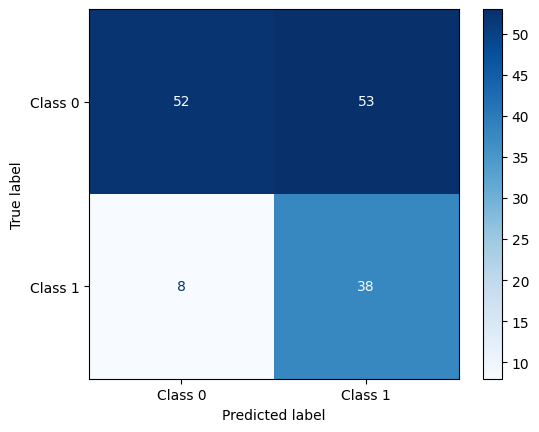

Precision: 0.42
Recall: 0.83
F1 Score: 0.55


In [50]:
import torch
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt

correct = 0
total = 0
all_preds = []
all_labels = []

with torch.no_grad():
    for inputs, labels in test_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        
        # 모델 예측
        outputs = loaded_model(inputs)
        preds = torch.sigmoid(outputs).cpu().numpy() > 0.5  # 이진 분류로 변환
        
        # 예측값과 실제값 저장
        all_preds.extend(preds.astype(int).squeeze())
        all_labels.extend(labels.cpu().numpy().astype(int).squeeze())
        
        # 정확도 계산
        correct += np.sum(preds.astype(int).squeeze() == labels.cpu().numpy())

        total += labels.size(0)

# 정확도 계산
accuracy = 100 * correct / total

print(f'Accuracy of the model on test data: {accuracy:.2f}%')

# 혼돈 행렬 계산
cm = confusion_matrix(all_labels, all_preds)

# 혼돈 행렬 출력
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Class 0', 'Class 1'])
disp.plot(cmap=plt.cm.Blues)
plt.show()

# Precision, Recall, F1-Score 계산
precision = precision_score(all_labels, all_preds)
recall = recall_score(all_labels, all_preds)
f1 = f1_score(all_labels, all_preds)

print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')


Accuracy of the model on test data: 87.84%


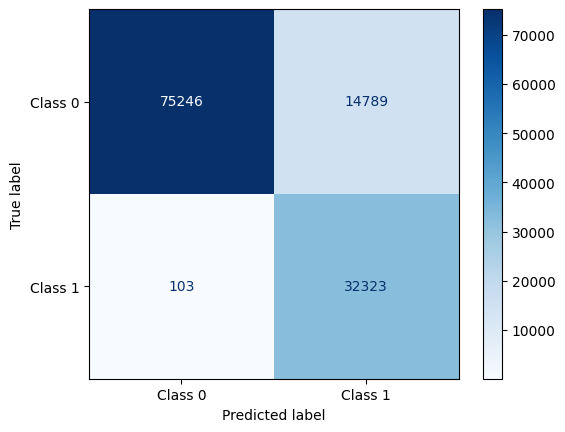

Precision: 0.69
Recall: 1.00
F1 Score: 0.81


In [14]:
import torch
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt

correct = 0
total = 0
all_preds = []
all_labels = []

with torch.no_grad():
    for inputs, labels in test_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        
        # 모델 예측
        outputs = loaded_model(inputs)
        preds = torch.sigmoid(outputs).cpu().numpy() > 0.5  # 이진 분류로 변환
        
        # 예측값과 실제값 저장
        all_preds.extend(preds.astype(int).squeeze())
        all_labels.extend(labels.cpu().numpy().astype(int).squeeze())
        
        # 정확도 계산
        correct += np.sum(preds.astype(int).squeeze() == labels.cpu().numpy())

        total += labels.size(0)

# 정확도 계산
accuracy = 100 * correct / total

print(f'Accuracy of the model on test data: {accuracy:.2f}%')

# 혼돈 행렬 계산
cm = confusion_matrix(all_labels, all_preds)

# 혼돈 행렬 출력
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Class 0', 'Class 1'])
disp.plot(cmap=plt.cm.Blues)
plt.show()

# Precision, Recall, F1-Score 계산
precision = precision_score(all_labels, all_preds,pos_label=1)
recall = recall_score(all_labels, all_preds,pos_label=1)
f1 = f1_score(all_labels, all_preds)

print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')


# ABS

In [16]:
import cv2


over_90=[]
import os
for folders in os.listdir('/home/alpaco/project/drunk_prj/data/videofile/32.이동 행위'):
    vid_path = os.path.join('/home/alpaco/project/drunk_prj/data/videofile/32.이동 행위',folders)
    for video in os.listdir(vid_path):
        video_path = os.path.join(vid_path,video)
        
        cap = cv2.VideoCapture(video_path)

        if not cap.isOpened():
            print("동영상을 열 수 없습니다.")
        else:
            # 총 프레임 수 확인
            total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
        if total_frames >=90:
            csv_s = video.split('.')[0]+'.csv'
            new_path = os.path.join('/home/alpaco/project/drunk_prj/data/normal_ver2',folders)
            new_path = os.path.join(new_path,'abs')
            new_path = os.path.join(new_path,csv_s)
            over_90.append([new_path,total_frames//2-45,total_frames//2+45])
        # 자원 해제
        cap.release()
        
    

In [18]:
import pandas as pd
import os


# 잘린 CSV 파일을 저장할 폴더 경로
cutting_folder = "/home/alpaco/project/drunk_prj/data/abs_normal_30초"
os.makedirs(cutting_folder, exist_ok=True)

# 작업 수행
for entry in over_90:
    csv_path, start_frame, end_frame = entry
    
    # CSV 파일 읽기
    try:
        df = pd.read_csv(csv_path)
    except Exception as e:
        print(f"CSV 파일을 열 수 없습니다: {csv_path}. 오류: {e}")
        continue

    # 'frame' 열에서 특정 범위의 데이터만 필터링
    if 'frame' not in df.columns:
        print(f"'frame' 열이 없습니다: {csv_path}")
        continue
    
    filtered_df = df[(df['frame'] >= start_frame) & (df['frame'] <= end_frame)]
    
    # 저장할 파일 이름 및 경로 생성
    file_name = os.path.basename(csv_path).replace(".csv", f"_({start_frame}_{end_frame}).csv")
    output_path = os.path.join(cutting_folder, file_name)

    # 필터링된 데이터 저장
    try:
        filtered_df.to_csv(output_path, index=False)
        print(f"저장 완료: {output_path}")
    except Exception as e:
        print(f"파일 저장 중 오류 발생: {output_path}. 오류: {e}")


저장 완료: /home/alpaco/project/drunk_prj/data/abs_normal_30초/C_32_9_smp_su_09-11_13-21-00_b_aft_DF2_(52_142).csv
저장 완료: /home/alpaco/project/drunk_prj/data/abs_normal_30초/C_32_9_smp_su_09-11_12-53-00_b_aft_DF2_(54_144).csv
저장 완료: /home/alpaco/project/drunk_prj/data/abs_normal_30초/C_32_9_smp_su_09-11_12-56-00_b_aft_DF2_(53_143).csv
저장 완료: /home/alpaco/project/drunk_prj/data/abs_normal_30초/C_32_9_smp_su_09-11_13-23-00_a_aft_DF2_(52_142).csv
저장 완료: /home/alpaco/project/drunk_prj/data/abs_normal_30초/C_32_9_smp_su_09-11_12-56-00_a_aft_DF2_(53_143).csv
저장 완료: /home/alpaco/project/drunk_prj/data/abs_normal_30초/C_32_9_smp_su_09-11_12-50-00_a_aft_DF2_(55_145).csv
저장 완료: /home/alpaco/project/drunk_prj/data/abs_normal_30초/C_32_9_smp_su_09-11_13-23-00_b_aft_DF2_(52_142).csv
저장 완료: /home/alpaco/project/drunk_prj/data/abs_normal_30초/C_32_9_smp_su_09-11_13-01-00_c_aft_DF2_(53_143).csv
저장 완료: /home/alpaco/project/drunk_prj/data/abs_normal_30초/C_32_9_smp_su_09-11_13-25-00_c_aft_DF2_(52_142).csv
저장 완료: /ho

In [19]:
import os
import re
import pandas as pd

# 입력 및 출력 디렉토리 설정
input_folder = '/home/alpaco/project/drunk_prj/data/abs_normal_30초'
output_folder = '/home/alpaco/project/drunk_prj/data/abs_normal_0넣기'
os.makedirs(output_folder, exist_ok=True)

# 입력 폴더의 모든 파일 반복 처리
for csv_file in os.listdir(input_folder):
    # CSV 파일만 처리
    if not csv_file.endswith('.csv'):
        continue

    # 파일 이름에서 최소, 최대 값 추출
    file_name = csv_file.split(".")[0]
    match = re.search(r'\((\d+)_(\d+)\)', file_name)
    if not match:
        print(f"파일 이름에서 최소/최대 값을 찾을 수 없습니다: {file_name}")
        continue  # 중단하지 않고 다음 파일로 이동

    min_frame, max_frame = map(int, match.groups())

    # CSV 파일 읽기
    csv_path = os.path.join(input_folder, csv_file)
    try:
        df = pd.read_csv(csv_path)
        print(f"CSV 파일 읽기 성공: {csv_path}")
    except Exception as e:
        print(f"CSV 파일을 읽을 수 없습니다: {csv_path}. 오류: {e}")
        continue

    # 'label' 열 확인
    if 'label' not in df.columns:
        print(f"'label' 열이 없습니다: {csv_path}. 파일을 건너뜁니다.")
        continue

    # 'frame' 열 확인
    if 'frame' not in df.columns:
        print(f"'frame' 열이 없습니다: {csv_path}. 파일을 건너뜁니다.")
        continue

    # 'label' 열을 기준으로 그룹화 및 프레임 보정
    processed_dfs = []
    for label, group in df.groupby('label'):
        # 전체 프레임 범위 생성
        full_frames = pd.DataFrame({'frame': range(min_frame, max_frame + 1)})

        # 기존 데이터와 병합하여 누락된 프레임 추가
        merged = pd.merge(full_frames, group, on='frame', how='left')

        # 누락된 값 채우기
        for col in merged.columns:
            if col != 'frame' and col != 'label':  # frame과 label 열은 유지
                merged[col] = merged[col].fillna(0)
        merged['label'] = merged['label'].fillna(label)

        # 처리된 데이터 저장
        processed_dfs.append(merged)

    # 그룹 데이터 병합
    if processed_dfs:
        final_df = pd.concat(processed_dfs, ignore_index=True)
    else:
        print(f"처리된 데이터가 없습니다: {csv_path}. 파일을 건너뜁니다.")
        continue

    # 결과 저장 경로
    output_path = os.path.join(output_folder, csv_file)
    try:
        final_df.to_csv(output_path, index=False)
        print(f"처리 완료: {output_path}")
    except Exception as e:
        print(f"결과를 저장하는 동안 오류 발생: {output_path}. 오류: {e}")


CSV 파일 읽기 성공: /home/alpaco/project/drunk_prj/data/abs_normal_30초/C_32_7_smp_su_09-11_11-01-00_c_for_DF2_(53_143).csv
처리 완료: /home/alpaco/project/drunk_prj/data/abs_normal_0넣기/C_32_7_smp_su_09-11_11-01-00_c_for_DF2_(53_143).csv
CSV 파일 읽기 성공: /home/alpaco/project/drunk_prj/data/abs_normal_30초/C_32_10_smp_su_09-11_13-47-00_c_aft_DF2_(54_144).csv
처리 완료: /home/alpaco/project/drunk_prj/data/abs_normal_0넣기/C_32_10_smp_su_09-11_13-47-00_c_aft_DF2_(54_144).csv
CSV 파일 읽기 성공: /home/alpaco/project/drunk_prj/data/abs_normal_30초/C_32_8_smp_su_09-11_11-17-00_c_for_DF2_(56_146).csv
처리 완료: /home/alpaco/project/drunk_prj/data/abs_normal_0넣기/C_32_8_smp_su_09-11_11-17-00_c_for_DF2_(56_146).csv
CSV 파일 읽기 성공: /home/alpaco/project/drunk_prj/data/abs_normal_30초/C_32_9_smp_su_09-11_12-48-00_b_aft_DF2_(57_147).csv
처리 완료: /home/alpaco/project/drunk_prj/data/abs_normal_0넣기/C_32_9_smp_su_09-11_12-48-00_b_aft_DF2_(57_147).csv
CSV 파일 읽기 성공: /home/alpaco/project/drunk_prj/data/abs_normal_30초/C_32_7_smp_su_09-11_10-41

In [20]:
over_900=[]
for folders in os.listdir('/home/alpaco/project/drunk_prj/data/comfirm_video1/totter/Abs'):
    vid_path = os.path.join('/home/alpaco/project/drunk_prj/data/comfirm_video1/totter/Abs',folders)
    for video in os.listdir(vid_path):
        start,end = int(video.split('_')[-3]),int((video.split('_')[-2]).split('.')[0])
        total = end- start
        if total >=900:
            video_name = os.path.join(vid_path,video)
            over_900.append([video_name,total//2-450,total//2+450])            

import pandas as pd
import os


# 잘린 CSV 파일을 저장할 폴더 경로
cutting_folder = "/home/alpaco/project/drunk_prj/data/abs_croki_30초"
os.makedirs(cutting_folder, exist_ok=True)

# 작업 수행
for entry in over_900:
    csv_path, start_frame, end_frame = entry
    
    # CSV 파일 읽기
    try:
        df = pd.read_csv(csv_path)
    except Exception as e:
        print(f"CSV 파일을 열 수 없습니다: {csv_path}. 오류: {e}")
        continue

    # 'frame' 열에서 특정 범위의 데이터만 필터링
    if 'frame' not in df.columns:
        print(f"'frame' 열이 없습니다: {csv_path}")
        continue
    
    filtered_df = df[(df['frame'] >= start_frame) & (df['frame'] <= end_frame)]
    
    # 저장할 파일 이름 및 경로 생성
    file_name = os.path.basename(csv_path).replace(".csv", f"_({start_frame}_{end_frame}).csv")
    output_path = os.path.join(cutting_folder, file_name)

    # 필터링된 데이터 저장
    try:
        filtered_df.to_csv(output_path, index=False)
        print(f"저장 완료: {output_path}")
    except Exception as e:
        print(f"파일 저장 중 오류 발생: {output_path}. 오류: {e}")


저장 완료: /home/alpaco/project/drunk_prj/data/abs_croki_30초/217-6_cam03_drunken04_place03_night_spring_174_1098_totter_(12_912).csv
저장 완료: /home/alpaco/project/drunk_prj/data/abs_croki_30초/216-1_cam03_drunken02_place01_night_summer_107_1221_totter_(107_1007).csv
저장 완료: /home/alpaco/project/drunk_prj/data/abs_croki_30초/217-5_cam02_drunken04_place03_night_winter_222_1402_totter_(140_1040).csv
저장 완료: /home/alpaco/project/drunk_prj/data/abs_croki_30초/217-6_cam01_drunken04_place03_night_winter_194_2250_totter_(578_1478).csv
저장 완료: /home/alpaco/project/drunk_prj/data/abs_croki_30초/217-5_cam03_drunken04_place03_night_spring_2140_3078_totter_(19_919).csv
저장 완료: /home/alpaco/project/drunk_prj/data/abs_croki_30초/217-2_cam03_drunken04_place03_night_winter_248_1762_totter_(307_1207).csv
저장 완료: /home/alpaco/project/drunk_prj/data/abs_croki_30초/216-1_cam03_drunken02_place01_night_winter_122_1113_totter_(45_945).csv
저장 완료: /home/alpaco/project/drunk_prj/data/abs_croki_30초/216-1_cam03_drunken02_place01_n

In [21]:
import os
import re
import pandas as pd

# 입력 및 출력 디렉토리 설정
input_folder = '/home/alpaco/project/drunk_prj/data/abs_croki_30초'
output_folder = '/home/alpaco/project/drunk_prj/data/abs_croki_0넣기'
os.makedirs(output_folder, exist_ok=True)

# 입력 폴더의 모든 파일 반복 처리
for csv_file in os.listdir(input_folder):
    # CSV 파일만 처리
    if not csv_file.endswith('.csv'):
        continue

    # 파일 이름에서 최소, 최대 값 추출
    file_name = csv_file.split(".")[0]
    match = re.search(r'\((\d+)_(\d+)\)', file_name)
    if not match:
        print(f"파일 이름에서 최소/최대 값을 찾을 수 없습니다: {file_name}")
        continue

    min_frame, max_frame = map(int, match.groups())

    # CSV 파일 읽기
    csv_path = os.path.join(input_folder, csv_file)
    try:
        df = pd.read_csv(csv_path)
        print(f"CSV 파일 읽기 성공: {csv_path}")
    except Exception as e:
        print(f"CSV 파일을 읽을 수 없습니다: {csv_path}. 오류: {e}")
        continue

    # 'label' 및 'frame' 열 확인
    if 'label' not in df.columns or 'frame' not in df.columns:
        print(f"'label' 또는 'frame' 열이 없습니다: {csv_path}. 파일을 건너뜁니다.")
        continue

    # 데이터프레임을 'label' 열로 그룹화
    processed_dfs = []
    for label, group in df.groupby('label'):
        frames_to_add = []  # 새로운 프레임 데이터 저장 리스트

        # 10프레임 간격으로 선택
        for frame in range(min_frame, max_frame + 1, 10):
            # 선택한 프레임이 존재하는 경우 그대로 추가
            if frame in group['frame'].values:
                frames_to_add.append(group[group['frame'] == frame].iloc[0].to_dict())
            else:
                # 대체 프레임 탐색: 우선적으로 다음 프레임, 그다음 이전 프레임
                replacement_frame = None
                if (frame + 1) in group['frame'].values:
                    replacement_frame = frame + 1
                elif (frame - 1) in group['frame'].values:
                    replacement_frame = frame - 1

                if replacement_frame:
                    frames_to_add.append(group[group['frame'] == replacement_frame].iloc[0].to_dict())
                else:
                    # 대체 프레임도 없으면 0으로 채운 데이터 추가
                    empty_row = {col: 0 for col in group.columns if col != 'label'}
                    empty_row['label'] = label
                    empty_row['frame'] = frame
                    frames_to_add.append(empty_row)

        # 생성된 프레임 리스트를 데이터프레임으로 변환
        new_df = pd.DataFrame(frames_to_add)
        processed_dfs.append(new_df)

    # 그룹별 처리된 데이터 병합
    if processed_dfs:
        final_df = pd.concat(processed_dfs, ignore_index=True)
    else:
        print(f"처리된 데이터가 없습니다: {csv_path}. 파일을 건너뜁니다.")
        continue

    # 결과 저장 경로
    output_path = os.path.join(output_folder, csv_file)
    try:
        final_df.to_csv(output_path, index=False)
        print(f"처리 완료: {output_path}")
    except Exception as e:
        print(f"결과를 저장하는 동안 오류 발생: {output_path}. 오류: {e}")


CSV 파일 읽기 성공: /home/alpaco/project/drunk_prj/data/abs_croki_30초/209-5_cam02_drunken01_place03_night_spring_5038_6650_totter_(356_1256).csv
처리 완료: /home/alpaco/project/drunk_prj/data/abs_croki_0넣기/209-5_cam02_drunken01_place03_night_spring_5038_6650_totter_(356_1256).csv
CSV 파일 읽기 성공: /home/alpaco/project/drunk_prj/data/abs_croki_30초/278-4_cam01_drunken03_place03_night_winter_479_1427_totter_(24_924).csv
처리 완료: /home/alpaco/project/drunk_prj/data/abs_croki_0넣기/278-4_cam01_drunken03_place03_night_winter_479_1427_totter_(24_924).csv
CSV 파일 읽기 성공: /home/alpaco/project/drunk_prj/data/abs_croki_30초/233-2_cam01_drunken03_place02_night_spring_7893_9008_totter_(107_1007).csv
처리 완료: /home/alpaco/project/drunk_prj/data/abs_croki_0넣기/233-2_cam01_drunken03_place02_night_spring_7893_9008_totter_(107_1007).csv
CSV 파일 읽기 성공: /home/alpaco/project/drunk_prj/data/abs_croki_30초/217-2_cam03_drunken04_place03_night_summer_155_1916_totter_(430_1330).csv
처리 완료: /home/alpaco/project/drunk_prj/data/abs_croki_0넣

In [63]:
# 1. 크로마키 영상
import os
import pandas as pd
croki_data = pd.DataFrame()
croki_path = '/home/alpaco/project/drunk_prj/data/abs_croki_0넣기'
for vid in os.listdir(croki_path):
    csv_path = os.path.join(croki_path,vid)
    tmp_csv = pd.read_csv(csv_path)
    tmp_csv['y'] = 1
    tmp_csv['FILENAME'] = (vid.split('/')[-1]).split('.')[0]
    num_cols = tmp_csv.select_dtypes(include=['number']).columns  # 숫자형 열만 선택
    tmp_csv[num_cols] = tmp_csv[num_cols].clip(lower=0)
    croki_data = pd.concat([croki_data,tmp_csv],ignore_index=True)
croki_data
#34580줄

,frame,x1,y1,x2,y2,x3,y3,x4,y4,x5,...,y14,x15,y15,x16,y16,x17,y17,label,y,FILENAME
0,356,0,0,0,0,0,0,1009,698,0,...,1076,1097,1041,1074,1192,1118,1150,ID: 2613.0,1,209-5_cam02_drunken01_place03_night_spring_503...
1,366,0,0,0,0,0,0,981,718,1037,...,1081,1083,1029,1069,1196,1119,1136,ID: 2613.0,1,209-5_cam02_drunken01_place03_night_spring_503...
2,376,0,0,0,0,0,0,959,728,1026,...,1082,1077,1025,1073,1197,1111,1136,ID: 2613.0,1,209-5_cam02_drunken01_place03_night_spring_503...
3,386,0,0,0,0,0,0,947,737,1016,...,1081,1070,1032,1073,1194,1105,1144,ID: 2613.0,1,209-5_cam02_drunken01_place03_night_spring_503...
4,396,0,0,0,0,0,0,943,739,1011,...,1074,1064,1043,1074,1187,1090,1164,ID: 2613.0,1,209-5_cam02_drunken01_place03_night_spring_503...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34575,887,2329,908,2333,893,0,0,2378,891,0,...,1327,2347,1297,2474,1468,2359,1432,ID: 1416.0,1,212-5_cam02_drunken03_place03_night_summer_167...
34576,897,2288,914,2290,899,0,0,2335,893,0,...,1332,2310,1310,2392,1473,2357,1421,ID: 1416.0,1,212-5_cam02_drunken03_place03_night_summer_167...
34577,907,2254,947,2258,932,0,0,2307,931,0,...,1351,2317,1304,2290,1531,2357,1417,ID: 1416.0,1,212-5_cam02_drunken03_place03_night_summer_167...
34578,917,2228,967,2234,953,0,0,2285,956,0,...,1377,2274,1334,2297,1525,2323,1458,ID: 1416.0,1,212-5_cam02_drunken03_place03_night_summer_167...


In [72]:

# 1. 크로마키 영상
import os
import pandas as pd
normal_data = pd.DataFrame()
normal_path= '/home/alpaco/project/drunk_prj/data/abs_normal_0넣기'
for vid in os.listdir(normal_path):
    csv_path = os.path.join(normal_path,vid)
    tmp_csv = pd.read_csv(csv_path)
    tmp_csv['y'] = 0
    tmp_csv['FILENAME'] = (vid.split('/')[-1]).split('.')[0]
    num_cols = tmp_csv.select_dtypes(include=['number']).columns  # 숫자형 열만 선택
    tmp_csv[num_cols] = tmp_csv[num_cols].clip(lower=0)
    normal_data = pd.concat([normal_data,tmp_csv],ignore_index=True)
normal_data
#102375 


,frame,x1,y1,x2,y2,x3,y3,x4,y4,x5,...,y14,x15,y15,x16,y16,x17,y17,label,y,FILENAME
0,53,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,ID: 1585.0,0,C_32_7_smp_su_09-11_11-01-00_c_for_DF2_(53_143)
1,54,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,ID: 1585.0,0,C_32_7_smp_su_09-11_11-01-00_c_for_DF2_(53_143)
2,55,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,ID: 1585.0,0,C_32_7_smp_su_09-11_11-01-00_c_for_DF2_(53_143)
3,56,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,ID: 1585.0,0,C_32_7_smp_su_09-11_11-01-00_c_for_DF2_(53_143)
4,57,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,ID: 1585.0,0,C_32_7_smp_su_09-11_11-01-00_c_for_DF2_(53_143)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102370,142,403.0,251.0,405.0,247.0,399.0,248.0,0.0,0.0,391.0,...,351.0,420.0,356.0,432.0,381.0,430.0,385.0,ID: 19394.0,0,C_32_8_smp_su_09-11_11-27-00_a_for_DF2_(56_146)
102371,143,401.0,254.0,403.0,250.0,396.0,251.0,0.0,0.0,388.0,...,368.0,408.0,372.0,0.0,0.0,416.0,399.0,ID: 19394.0,0,C_32_8_smp_su_09-11_11-27-00_a_for_DF2_(56_146)
102372,144,401.0,264.0,403.0,260.0,396.0,260.0,0.0,0.0,386.0,...,378.0,422.0,383.0,0.0,0.0,0.0,0.0,ID: 19394.0,0,C_32_8_smp_su_09-11_11-27-00_a_for_DF2_(56_146)
102373,145,410.0,266.0,412.0,263.0,405.0,263.0,0.0,0.0,394.0,...,377.0,412.0,384.0,444.0,411.0,426.0,418.0,ID: 19394.0,0,C_32_8_smp_su_09-11_11-27-00_a_for_DF2_(56_146)


In [73]:

Combined = pd.concat([normal_data,croki_data],ignore_index=True)
Combined

columns_to_convert = Combined.columns.difference(['FILENAME','label'])

# float으로 변환
Combined[columns_to_convert] = Combined[columns_to_convert].astype(float)

In [50]:
Combined = pd.read_csv('/home/alpaco/project/drunk_prj/data/3_frame_data/final_interpol.csv')
Combined.drop('Unnamed: 0',axis=1,inplace=True)
Combined

,frame,x1,y1,x2,y2,x3,y3,x4,y4,x5,...,y14,x15,y15,x16,y16,x17,y17,label,y,FILENAME
0,53,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ID: 1585.0,0,C_32_7_smp_su_09-11_11-01-00_c_for_DF2_(53_143)
1,54,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ID: 1585.0,0,C_32_7_smp_su_09-11_11-01-00_c_for_DF2_(53_143)
2,55,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ID: 1585.0,0,C_32_7_smp_su_09-11_11-01-00_c_for_DF2_(53_143)
3,56,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ID: 1585.0,0,C_32_7_smp_su_09-11_11-01-00_c_for_DF2_(53_143)
4,57,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ID: 1585.0,0,C_32_7_smp_su_09-11_11-01-00_c_for_DF2_(53_143)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102370,142,403.0,251.0,405.0,247.0,399.0,248.0,0.0,0.0,391.0,...,351.0,420.0,356.0,432.0,381.0,430.0,385.0,ID: 19394.0,0,C_32_8_smp_su_09-11_11-27-00_a_for_DF2_(56_146)
102371,143,401.0,254.0,403.0,250.0,396.0,251.0,0.0,0.0,388.0,...,368.0,408.0,372.0,0.0,0.0,416.0,399.0,ID: 19394.0,0,C_32_8_smp_su_09-11_11-27-00_a_for_DF2_(56_146)
102372,144,401.0,264.0,403.0,260.0,396.0,260.0,0.0,0.0,386.0,...,378.0,422.0,383.0,0.0,0.0,0.0,0.0,ID: 19394.0,0,C_32_8_smp_su_09-11_11-27-00_a_for_DF2_(56_146)
102373,145,410.0,266.0,412.0,263.0,405.0,263.0,0.0,0.0,394.0,...,377.0,412.0,384.0,444.0,411.0,426.0,418.0,ID: 19394.0,0,C_32_8_smp_su_09-11_11-27-00_a_for_DF2_(56_146)


In [47]:
#스케일링 진행 후
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler


coordinate_cols = [f'x{i}' for i in range(1, 18)] + [f'y{i}' for i in range(1, 18)]
X = Combined[coordinate_cols].values  # 34개의 좌표 피처

scaler_X = StandardScaler()
X_normalized = scaler_X.fit_transform(X)
#y_normalized = scaler_y.fit_transform(y.reshape(-1, 1)).flatten()


Combined[coordinate_cols] = X_normalized

# 6. sequence length 생성하기
import numpy as np
#Sequence Lenght 설정 후 진행 예정
def create_sequences(df, seq_length):
    xs, ys = [], []
    
    # 'FILENAME'과 'label' 기준으로 그룹화
    for _, group in df.groupby(['FILENAME', 'label']):
        # 그룹 내 'frame' 기준 정렬
        group = group.sort_values(by=['frame']).reset_index(drop=True)
        
        # frame, FILENAME, label, id, y 제외한 좌표 피처
        data_X = group.drop(columns=['frame', 'FILENAME', 'label','y'], errors='ignore').values  
        
        data_y = group['y'].values  # 이진 분류 레이블
        
        # 시퀀스 생성
        for i in range(len(data_X) - seq_length):
            x = data_X[i:i + seq_length]
            y = data_y[i + seq_length - 1]  # 시퀀스의 마지막 레이블 사용
            xs.append(x)
            ys.append(y)
    
    return np.array(xs), np.array(ys)

sequence_length = 90

# 시퀀스 생성
X_seq, Y_seq = create_sequences(Combined, sequence_length)


In [49]:

from sklearn.model_selection import train_test_split
import torch
from torch.utils.data import TensorDataset,DataLoader

# 학습 데이터와 테스트 데이터로 나누고, 라벨의 비율을 유지합니다.
train_X, valid_X, train_y, valid_y = train_test_split(X_seq, Y_seq, test_size=0.2, stratify=Y_seq, random_state=42)

# 학습 데이터를 다시 셔플하여 모델이 순서에 너무 의존하지 않도록 합니다.
train_indices = np.arange(len(train_X))
np.random.shuffle(train_indices)
train_X, train_y = train_X[train_indices], train_y[train_indices]


# 학습 데이터와 테스트 데이터를 PyTorch 텐서로 변환하여 모델 학습에 사용합니다.
train_X_tensor = torch.FloatTensor(train_X)
train_y_tensor = torch.LongTensor(train_y)
valid_X_tensor = torch.FloatTensor(valid_X)
valid_y_tensor = torch.LongTensor(valid_y)

# PyTorch의 DataLoader를 사용해 데이터를 묶어 관리할 수 있습니다.
batch_size = 16  # 배치 사이즈는 한 번에 학습하는 데이터 개수를 뜻합니다.
train_dataset = TensorDataset(train_X_tensor, train_y_tensor)
valid_dataset = TensorDataset(valid_X_tensor, valid_y_tensor)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
valid_loader = DataLoader(valid_dataset, batch_size=batch_size, shuffle=False)


###########################################################################################################################################

import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score
from torch.utils.data import DataLoader, TensorDataset
import matplotlib.pyplot as plt
from tqdm import tqdm

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

class BinaryLSTMModel(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers):
        super(BinaryLSTMModel, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, 1)  # 이진 분류이므로 출력 노드를 1개로 설정

    def forward(self, x):
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(device)
        c0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(device)

        out, _ = self.lstm(x, (h0, c0))
        out = self.fc(out[:, -1, :])  # 마지막 시퀀스 출력 사용
        return out

# 모델 초기화
input_size = X_seq.shape[2]
hidden_size = 50
num_layers = 1
model = BinaryLSTMModel(input_size, hidden_size, num_layers).to(device)

# 손실 함수 및 옵티마이저
criterion = nn.BCEWithLogitsLoss()  # 이진 분류용
optimizer = optim.NAdam(model.parameters(), lr=0.01)

# 학습 및 검증 함수
def evaluate(model, val_loader):
    model.eval()
    all_preds = []
    all_labels = []
    with torch.no_grad():
        for inputs, labels in val_loader:
            inputs, labels = inputs.to(device), labels.to(device).float()
            outputs = model(inputs)
            preds = torch.sigmoid(outputs).cpu().numpy() > 0.5
            all_preds.extend(preds.astype(int))
            all_labels.extend(labels.cpu().numpy().astype(int))

    # F1 Score 계산
    f1 = f1_score(all_labels, all_preds)
    return f1

# 모델 학습
num_epochs = 10
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    train_loader = tqdm(train_loader, desc=f"Epoch {epoch+1}/{num_epochs}")

    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device).float()

        optimizer.zero_grad()
        outputs = model(inputs)
        outputs = outputs.squeeze()
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    # F1 Score 계산
    f1 = evaluate(model, valid_loader)
    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {running_loss/len(train_loader):.4f}, F1 Score: {f1:.4f}')

Epoch 1/10:  47%|████▋     | 5646/12085 [00:18<00:20, 312.35it/s]


KeyboardInterrupt: 

In [67]:
torch.save(model.state_dict(),'abs90frame000_LSTM.pt')

In [27]:
test_900=[]

for video in os.listdir('/home/alpaco/project/drunk_prj/data/comfirm_labeling/video1_1/Abs'):
    start,end = int(video.split('_')[-3]),int((video.split('_')[-2]))
    total = end- start
    if total >=900:
        video_name = os.path.join('/home/alpaco/project/drunk_prj/data/comfirm_labeling/video1_1/Abs',video)
        test_900.append([video_name,total//2-450,total//2+450])         
for video in os.listdir('/home/alpaco/project/drunk_prj/data/comfirm_labeling/video1/Abs'):
    start,end = int(video.split('_')[-3]),int((video.split('_')[-2]))
    total = end- start
    if total >=900:
        video_name = os.path.join('/home/alpaco/project/drunk_prj/data/comfirm_labeling/video1/Abs',video)
        test_900.append([video_name,total//2-450,total//2+450])       


In [30]:
import pandas as pd
import os

# 잘린 CSV 파일을 저장할 폴더 경로
cutting_folder = "/home/alpaco/project/drunk_prj/data/abs_test_30초"
os.makedirs(cutting_folder, exist_ok=True)

# 작업 수행
for entry in test_900:
    csv_path, start_frame, end_frame = entry
    
    # CSV 파일 읽기
    try:
        df = pd.read_csv(csv_path)
    except Exception as e:
        print(f"CSV 파일을 열 수 없습니다: {csv_path}. 오류: {e}")
        continue

    # 'frame' 열에서 특정 범위의 데이터만 필터링
    if 'frame' not in df.columns:
        print(f"'frame' 열이 없습니다: {csv_path}")
        continue
    
    filtered_df = df[(df['frame'] >= start_frame) & (df['frame'] <= end_frame)]
    
    # 'y' 열 값 확인 및 제외 처리
    if 'y' in filtered_df.columns and filtered_df['y'].isnull().all():
        filtered_df = filtered_df.drop(columns=['y'])
    
    # 저장할 파일 이름 및 경로 생성
    file_name = os.path.basename(csv_path).replace(".csv", f"_({start_frame}_{end_frame}).csv")
    output_path = os.path.join(cutting_folder, file_name)

    # 필터링된 데이터 저장
    try:
        filtered_df.to_csv(output_path, index=False)
        print(f"저장 완료: {output_path}")
    except Exception as e:
        print(f"파일 저장 중 오류 발생: {output_path}. 오류: {e}")


저장 완료: /home/alpaco/project/drunk_prj/data/abs_test_30초/616-6_cam02_drunken03_place01_day_summer_396_2687_totter_(695_1595).csv
저장 완료: /home/alpaco/project/drunk_prj/data/abs_test_30초/617-1_cam02_drunken04_place03_night_summer_4695_6314_totter_(359_1259).csv
저장 완료: /home/alpaco/project/drunk_prj/data/abs_test_30초/616-6_cam01_drunken03_place01_day_summer_1545_2711_totter_(133_1033).csv
저장 완료: /home/alpaco/project/drunk_prj/data/abs_test_30초/618-8_cam01_drunken01_place03_night_spring_3115_4019_totter_(2_902).csv
저장 완료: /home/alpaco/project/drunk_prj/data/abs_test_30초/618-9_cam02_drunken01_place03_night_summer_7673_8654_totter_(40_940).csv
저장 완료: /home/alpaco/project/drunk_prj/data/abs_test_30초/618-4_cam01_drunken04_place03_night_summer_1638_5279_totter_(1370_2270).csv
저장 완료: /home/alpaco/project/drunk_prj/data/abs_test_30초/617-4_cam01_drunken04_place03_night_summer_4583_5622_totter_(69_969).csv
저장 완료: /home/alpaco/project/drunk_prj/data/abs_test_30초/617-4_cam01_drunken04_place03_night_sp

In [53]:
import os
import re
import pandas as pd

# 입력 및 출력 디렉토리 설정
input_folder = '/home/alpaco/project/drunk_prj/data/abs_test_30초'
output_folder = '/home/alpaco/project/drunk_prj/data/abs_test_0넣기3'
os.makedirs(output_folder, exist_ok=True)

# 입력 폴더의 모든 파일 반복 처리
for csv_file in os.listdir(input_folder):
    # CSV 파일만 처리
    if not csv_file.endswith('.csv'):
        continue

    # 파일 이름에서 최소, 최대 값 추출
    file_name = csv_file.split(".")[0]
    match = re.search(r'\((\d+)_(\d+)\)', file_name)
    if not match:
        print(f"파일 이름에서 최소/최대 값을 찾을 수 없습니다: {file_name}")
        continue

    min_frame, max_frame = map(int, match.groups())

    # CSV 파일 읽기
    csv_path = os.path.join(input_folder, csv_file)
    try:
        df = pd.read_csv(csv_path)
        print(f"CSV 파일 읽기 성공: {csv_path}")
    except Exception as e:
        print(f"CSV 파일을 읽을 수 없습니다: {csv_path}. 오류: {e}")
        continue

    # 'label' 및 'frame' 열 확인
    if 'label' not in df.columns or 'frame' not in df.columns:
        print(f"'label' 또는 'frame' 열이 없습니다: {csv_path}. 파일을 건너뜁니다.")
        continue

    # 데이터프레임을 'label' 열로 그룹화
    processed_dfs = []
    for label, group in df.groupby('label'):
        frames_to_add = []  # 새로운 프레임 데이터 저장 리스트

        # 10프레임 간격으로 선택
        for frame in range(min_frame, max_frame + 1, 10):
            # 선택한 프레임이 존재하는 경우 그대로 추가
            if frame in group['frame'].values:
                frames_to_add.append(group[group['frame'] == frame].iloc[0].to_dict())
            else:
                # 대체 프레임 탐색: 우선적으로 다음 프레임, 그다음 이전 프레임
                replacement_frame = None
                if (frame + 1) in group['frame'].values:
                    replacement_frame = frame + 1
                elif (frame - 1) in group['frame'].values:
                    replacement_frame = frame - 1

                if replacement_frame:
                    frames_to_add.append(group[group['frame'] == replacement_frame].iloc[0].to_dict())
                else:
                    # 대체 프레임도 없으면 0으로 채운 데이터 추가
                    empty_row = {col: 0 for col in group.columns if col != 'label'}
                    empty_row['label'] = label
                    empty_row['frame'] = frame
                    frames_to_add.append(empty_row)

        # 생성된 프레임 리스트를 데이터프레임으로 변환
        new_df = pd.DataFrame(frames_to_add)
        processed_dfs.append(new_df)

    # 그룹별 처리된 데이터 병합
    if processed_dfs:
        final_df = pd.concat(processed_dfs, ignore_index=True)
    else:
        print(f"처리된 데이터가 없습니다: {csv_path}. 파일을 건너뜁니다.")
        continue

    # 결과 저장 경로
    output_path = os.path.join(output_folder, csv_file)
    try:
        final_df.to_csv(output_path, index=False)
        print(f"처리 완료: {output_path}")
    except Exception as e:
        print(f"결과를 저장하는 동안 오류 발생: {output_path}. 오류: {e}")


CSV 파일 읽기 성공: /home/alpaco/project/drunk_prj/data/abs_test_30초/617-2_cam02_drunken04_place03_night_spring_717_2898_totter_(640_1540).csv
처리 완료: /home/alpaco/project/drunk_prj/data/abs_test_0넣기3/617-2_cam02_drunken04_place03_night_spring_717_2898_totter_(640_1540).csv
CSV 파일 읽기 성공: /home/alpaco/project/drunk_prj/data/abs_test_30초/617-6_cam01_drunken04_place03_night_summer_4909_6240_totter_(215_1115).csv
처리 완료: /home/alpaco/project/drunk_prj/data/abs_test_0넣기3/617-6_cam01_drunken04_place03_night_summer_4909_6240_totter_(215_1115).csv
CSV 파일 읽기 성공: /home/alpaco/project/drunk_prj/data/abs_test_30초/618-3_cam01_drunken04_place03_night_spring_1930_3718_totter_(444_1344).csv
처리 완료: /home/alpaco/project/drunk_prj/data/abs_test_0넣기3/618-3_cam01_drunken04_place03_night_spring_1930_3718_totter_(444_1344).csv
CSV 파일 읽기 성공: /home/alpaco/project/drunk_prj/data/abs_test_30초/618-1_cam01_drunken04_place03_night_spring_2463_3550_totter_(93_993).csv
처리 완료: /home/alpaco/project/drunk_prj/data/abs_test_0넣기3

In [10]:
# 1. 크로마키 영상
import os
import pandas as pd
test_data = pd.DataFrame()

for vid in os.listdir('/home/alpaco/project/drunk_prj/data/abs_test_0넣기3'):
    csv_path = os.path.join('/home/alpaco/project/drunk_prj/data/abs_test_0넣기3',vid)
    tmp_csv = pd.read_csv(csv_path)
    tmp_csv['FILENAME'] = (vid.split('/')[-1]).split('.')[0]
    num_cols = tmp_csv.select_dtypes(include=['number']).columns  # 숫자형 열만 선택
    tmp_csv[num_cols] = tmp_csv[num_cols].clip(lower=0)
    test_data = pd.concat([test_data,tmp_csv],ignore_index=True)
    
test_data = test_data.drop(['Unnamed: 37'],axis=1)
#136051   

#스케일링 진행 후
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler


coordinate_cols = [f'x{i}' for i in range(1, 18)] + [f'y{i}' for i in range(1, 18)]
X = test_data[coordinate_cols].values  # 34개의 좌표 피처

scaler_X = StandardScaler()
X_normalized = scaler_X.fit_transform(X)
#y_normalized = scaler_y.fit_transform(y.reshape(-1, 1)).flatten()


test_data[coordinate_cols] = X_normalized


columns_to_convert = test_data.columns.difference(['FILENAME','label'])

# float으로 변환
test_data[columns_to_convert] = test_data[columns_to_convert].astype(float)



# 6. sequence length 생성하기
import numpy as np
#Sequence Lenght 설정 후 진행 예정
def create_sequences(df, seq_length):
    xs, ys = [], []
    
    # 'FILENAME'과 'label' 기준으로 그룹화
    for _, group in df.groupby(['FILENAME', 'label']):
        # 그룹 내 'frame' 기준 정렬
        group = group.sort_values(by=['frame']).reset_index(drop=True)
        
        # frame, FILENAME, label, id, y 제외한 좌표 피처
        data_X = group.drop(columns=['frame', 'FILENAME', 'label','y'], errors='ignore').values  
        
        data_y = group['y'].values  # 이진 분류 레이블
        
        # 시퀀스 생성
        for i in range(len(data_X) - seq_length):
            x = data_X[i:i + seq_length]
            y = data_y[i + seq_length - 1]  # 시퀀스의 마지막 레이블 사용
            xs.append(x)
            ys.append(y)
    
    return np.array(xs), np.array(ys)

sequence_length = 90

test_x_seq,test_y_seq = create_sequences(test_data,sequence_length)

In [11]:
test_x_seq.shape

(154, 90, 34)

In [20]:

from sklearn.model_selection import train_test_split
import torch
from torch.utils.data import TensorDataset,DataLoader



# 학습 데이터와 테스트 데이터를 PyTorch 텐서로 변환하여 모델 학습에 사용합니다.
test_X_tensor = torch.FloatTensor(test_x_seq)
test_y_tensor = torch.LongTensor(test_y_seq)


# PyTorch의 DataLoader를 사용해 데이터를 묶어 관리할 수 있습니다.
batch_size = 16  # 배치 사이즈는 한 번에 학습하는 데이터 개수를 뜻합니다.
test_dataset = TensorDataset(test_X_tensor, test_y_tensor)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)


###########################################################################################################################################

import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score
from torch.utils.data import DataLoader, TensorDataset
import matplotlib.pyplot as plt
from tqdm import tqdm

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

class BinaryLSTMModel(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers):
        super(BinaryLSTMModel, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, 1)  # 이진 분류이므로 출력 노드를 1개로 설정

    def forward(self, x):
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(device)
        c0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(device)

        out, _ = self.lstm(x, (h0, c0))
        out = self.fc(out[:, -1, :])  # 마지막 시퀀스 출력 사용
        return out

# 모델 초기화
input_size = X_seq.shape[2]
hidden_size = 50
num_layers = 1
model = BinaryLSTMModel(input_size, hidden_size, num_layers).to(device)


loaded_model = BinaryLSTMModel(X_seq.shape[2],50,1)
loaded_model.load_state_dict(torch.load('/home/alpaco/project/jsw_model/11_27alignremodel_LSTM.pt'))
loaded_model.to(device)
loaded_model.eval()


/tmp/ipykernel_1196996/3287355153.py:57: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  loaded_model.load_state_dict(torch.load('/home/alpaco/project/jsw_model/11_27alignremo

BinaryLSTMModel(
  (lstm): LSTM(34, 50, batch_first=True)
  (fc): Linear(in_features=50, out_features=1, bias=True)
)

Accuracy of the model on test data: 32.47%


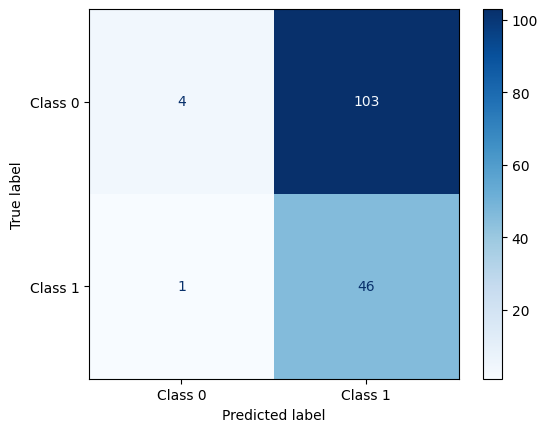

Precision: 0.31
Recall: 0.98
F1 Score: 0.47


In [21]:

import torch
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt

correct = 0
total = 0
all_preds = []
all_labels = []

with torch.no_grad():
    for inputs, labels in test_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        
        # 모델 예측
        outputs = loaded_model(inputs)
        preds = torch.sigmoid(outputs).cpu().numpy() > 0.5  # 이진 분류로 변환
        
        # 예측값과 실제값 저장
        all_preds.extend(preds.astype(int).squeeze())
        all_labels.extend(labels.cpu().numpy().astype(int).squeeze())
        
        # 정확도 계산
        correct += np.sum(preds.astype(int).squeeze() == labels.cpu().numpy())

        total += labels.size(0)

# 정확도 계산
accuracy = 100 * correct / total

print(f'Accuracy of the model on test data: {accuracy:.2f}%')

# 혼돈 행렬 계산
cm = confusion_matrix(all_labels, all_preds)

# 혼돈 행렬 출력
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Class 0', 'Class 1'])
disp.plot(cmap=plt.cm.Blues)
plt.show()

# Precision, Recall, F1-Score 계산
precision = precision_score(all_labels, all_preds)
recall = recall_score(all_labels, all_preds)
f1 = f1_score(all_labels, all_preds)

print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')


# Align

In [ ]:

# 1. 크로마키 영상
import os
import pandas as pd
croki_data = pd.DataFrame()
croki_path = '/home/alpaco/project/drunk_prj/data/abs_croki_0넣기'
for vid in os.listdir(croki_path):
    csv_path = os.path.join(croki_path,vid)
    tmp_csv = pd.read_csv(csv_path)
    tmp_csv['y'] = 1
    tmp_csv['FILENAME'] = (vid.split('/')[-1]).split('.')[0]
    num_cols = tmp_csv.select_dtypes(include=['number']).columns  # 숫자형 열만 선택
    tmp_csv[num_cols] = tmp_csv[num_cols].clip(lower=0)
    croki_data = pd.concat([croki_data,tmp_csv],ignore_index=True)
croki_data
#34580줄

# 1. 크로마키 영상
import os
import pandas as pd
normal_data = pd.DataFrame()
normal_path= '/home/alpaco/project/drunk_prj/data/normal_0넣기'
for vid in os.listdir(normal_path):
    csv_path = os.path.join(normal_path,vid)
    tmp_csv = pd.read_csv(csv_path)
    tmp_csv['y'] = 0
    tmp_csv['FILENAME'] = (vid.split('/')[-1]).split('.')[0]
    num_cols = tmp_csv.select_dtypes(include=['number']).columns  # 숫자형 열만 선택
    tmp_csv[num_cols] = tmp_csv[num_cols].clip(lower=0)
    normal_data = pd.concat([normal_data,tmp_csv],ignore_index=True)
normal_data
#102375 

Combined = pd.concat([normal_data,croki_data],ignore_index=True)
Combined

columns_to_convert = Combined.columns.difference(['FILENAME','label'])

# float으로 변환
Combined[columns_to_convert] = Combined[columns_to_convert].astype(float)

In [ ]:


#스케일링 진행 후
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler


coordinate_cols = [f'x{i}' for i in range(1, 18)] + [f'y{i}' for i in range(1, 18)]
X = Combined[coordinate_cols].values  # 34개의 좌표 피처

scaler_X = StandardScaler()
X_normalized = scaler_X.fit_transform(X)
#y_normalized = scaler_y.fit_transform(y.reshape(-1, 1)).flatten()


Combined[coordinate_cols] = X_normalized

# 6. sequence length 생성하기
import numpy as np
#Sequence Lenght 설정 후 진행 예정
def create_sequences(df, seq_length):
    xs, ys = [], []
    
    # 'FILENAME'과 'label' 기준으로 그룹화
    for _, group in df.groupby(['FILENAME', 'label']):
        # 그룹 내 'frame' 기준 정렬
        group = group.sort_values(by=['frame']).reset_index(drop=True)
        
        # frame, FILENAME, label, id, y 제외한 좌표 피처
        data_X = group.drop(columns=['frame', 'FILENAME', 'label','y'], errors='ignore').values  
        
        data_y = group['y'].values  # 이진 분류 레이블
        
        # 시퀀스 생성
        for i in range(len(data_X) - seq_length):
            x = data_X[i:i + seq_length]
            y = data_y[i + seq_length - 1]  # 시퀀스의 마지막 레이블 사용
            xs.append(x)
            ys.append(y)
    
    return np.array(xs), np.array(ys)

sequence_length = 90

# 시퀀스 생성
X_seq, Y_seq = create_sequences(Combined, sequence_length)


In [ ]:

from sklearn.model_selection import train_test_split
import torch
from torch.utils.data import TensorDataset,DataLoader

# 학습 데이터와 테스트 데이터로 나누고, 라벨의 비율을 유지합니다.
train_X, valid_X, train_y, valid_y = train_test_split(X_seq, Y_seq, test_size=0.2, stratify=Y_seq, random_state=42)

# 학습 데이터를 다시 셔플하여 모델이 순서에 너무 의존하지 않도록 합니다.
train_indices = np.arange(len(train_X))
np.random.shuffle(train_indices)
train_X, train_y = train_X[train_indices], train_y[train_indices]


# 학습 데이터와 테스트 데이터를 PyTorch 텐서로 변환하여 모델 학습에 사용합니다.
train_X_tensor = torch.FloatTensor(train_X)
train_y_tensor = torch.LongTensor(train_y)
valid_X_tensor = torch.FloatTensor(valid_X)
valid_y_tensor = torch.LongTensor(valid_y)

# PyTorch의 DataLoader를 사용해 데이터를 묶어 관리할 수 있습니다.
batch_size = 16  # 배치 사이즈는 한 번에 학습하는 데이터 개수를 뜻합니다.
train_dataset = TensorDataset(train_X_tensor, train_y_tensor)
valid_dataset = TensorDataset(valid_X_tensor, valid_y_tensor)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
valid_loader = DataLoader(valid_dataset, batch_size=batch_size, shuffle=False)


###########################################################################################################################################

import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score
from torch.utils.data import DataLoader, TensorDataset
import matplotlib.pyplot as plt
from tqdm import tqdm

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

class BinaryLSTMModel(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers):
        super(BinaryLSTMModel, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, 1)  # 이진 분류이므로 출력 노드를 1개로 설정

    def forward(self, x):
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(device)
        c0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(device)

        out, _ = self.lstm(x, (h0, c0))
        out = self.fc(out[:, -1, :])  # 마지막 시퀀스 출력 사용
        return out

# 모델 초기화
input_size = X_seq.shape[2]
hidden_size = 50
num_layers = 1
model = BinaryLSTMModel(input_size, hidden_size, num_layers).to(device)

# 손실 함수 및 옵티마이저
criterion = nn.BCEWithLogitsLoss()  # 이진 분류용
optimizer = optim.NAdam(model.parameters(), lr=0.01)

# 학습 및 검증 함수
def evaluate(model, val_loader):
    model.eval()
    all_preds = []
    all_labels = []
    with torch.no_grad():
        for inputs, labels in val_loader:
            inputs, labels = inputs.to(device), labels.to(device).float()
            outputs = model(inputs)
            preds = torch.sigmoid(outputs).cpu().numpy() > 0.5
            all_preds.extend(preds.astype(int))
            all_labels.extend(labels.cpu().numpy().astype(int))

    # F1 Score 계산
    f1 = f1_score(all_labels, all_preds)
    return f1

# 모델 학습
num_epochs = 50
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    train_loader = tqdm(train_loader, desc=f"Epoch {epoch+1}/{num_epochs}")

    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device).float()

        optimizer.zero_grad()
        outputs = model(inputs)
        outputs = outputs.squeeze()
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    # F1 Score 계산
    f1 = evaluate(model, valid_loader)
    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {running_loss/len(train_loader):.4f}, F1 Score: {f1:.4f}')
torch.save(model.state_dict(),'abs90frame000_LSTM.pt')

In [ ]:
test_900=[]

for video in os.listdir('/home/alpaco/project/drunk_prj/data/comfirm_labeling/video1_1/Abs'):
    start,end = int(video.split('_')[-3]),int((video.split('_')[-2]))
    total = end- start
    if total >=900:
        video_name = os.path.join('/home/alpaco/project/drunk_prj/data/comfirm_labeling/video1_1/Abs',video)
        test_900.append([video_name,total//2-450,total//2+450])         
for video in os.listdir('/home/alpaco/project/drunk_prj/data/comfirm_labeling/video1/Abs'):
    start,end = int(video.split('_')[-3]),int((video.split('_')[-2]))
    total = end- start
    if total >=900:
        video_name = os.path.join('/home/alpaco/project/drunk_prj/data/comfirm_labeling/video1/Abs',video)
        test_900.append([video_name,total//2-450,total//2+450])       

import pandas as pd
import os

# 잘린 CSV 파일을 저장할 폴더 경로
cutting_folder = "/home/alpaco/project/drunk_prj/data/abs_test_30초"
os.makedirs(cutting_folder, exist_ok=True)

# 작업 수행
for entry in test_900:
    csv_path, start_frame, end_frame = entry
    
    # CSV 파일 읽기
    try:
        df = pd.read_csv(csv_path)
    except Exception as e:
        print(f"CSV 파일을 열 수 없습니다: {csv_path}. 오류: {e}")
        continue

    # 'frame' 열에서 특정 범위의 데이터만 필터링
    if 'frame' not in df.columns:
        print(f"'frame' 열이 없습니다: {csv_path}")
        continue
    
    filtered_df = df[(df['frame'] >= start_frame) & (df['frame'] <= end_frame)]
    
    # 'y' 열 값 확인 및 제외 처리
    if 'y' in filtered_df.columns and filtered_df['y'].isnull().all():
        filtered_df = filtered_df.drop(columns=['y'])
    
    # 저장할 파일 이름 및 경로 생성
    file_name = os.path.basename(csv_path).replace(".csv", f"_({start_frame}_{end_frame}).csv")
    output_path = os.path.join(cutting_folder, file_name)

    # 필터링된 데이터 저장
    try:
        filtered_df.to_csv(output_path, index=False)
        print(f"저장 완료: {output_path}")
    except Exception as e:
        print(f"파일 저장 중 오류 발생: {output_path}. 오류: {e}")

In [ ]:


import os
import re
import pandas as pd

# 입력 및 출력 디렉토리 설정
input_folder = '/home/alpaco/project/drunk_prj/data/abs_test_30초'
output_folder = '/home/alpaco/project/drunk_prj/data/abs_test_0넣기3'
os.makedirs(output_folder, exist_ok=True)

# 입력 폴더의 모든 파일 반복 처리
for csv_file in os.listdir(input_folder):
    # CSV 파일만 처리
    if not csv_file.endswith('.csv'):
        continue

    # 파일 이름에서 최소, 최대 값 추출
    file_name = csv_file.split(".")[0]
    match = re.search(r'\((\d+)_(\d+)\)', file_name)
    if not match:
        print(f"파일 이름에서 최소/최대 값을 찾을 수 없습니다: {file_name}")
        continue

    min_frame, max_frame = map(int, match.groups())

    # CSV 파일 읽기
    csv_path = os.path.join(input_folder, csv_file)
    try:
        df = pd.read_csv(csv_path)
        print(f"CSV 파일 읽기 성공: {csv_path}")
    except Exception as e:
        print(f"CSV 파일을 읽을 수 없습니다: {csv_path}. 오류: {e}")
        continue

    # 'label' 및 'frame' 열 확인
    if 'label' not in df.columns or 'frame' not in df.columns:
        print(f"'label' 또는 'frame' 열이 없습니다: {csv_path}. 파일을 건너뜁니다.")
        continue

    # 데이터프레임을 'label' 열로 그룹화
    processed_dfs = []
    for label, group in df.groupby('label'):
        frames_to_add = []  # 새로운 프레임 데이터 저장 리스트

        # 10프레임 간격으로 선택
        for frame in range(min_frame, max_frame + 1, 10):
            # 선택한 프레임이 존재하는 경우 그대로 추가
            if frame in group['frame'].values:
                frames_to_add.append(group[group['frame'] == frame].iloc[0].to_dict())
            else:
                # 대체 프레임 탐색: 우선적으로 다음 프레임, 그다음 이전 프레임
                replacement_frame = None
                if (frame + 1) in group['frame'].values:
                    replacement_frame = frame + 1
                elif (frame - 1) in group['frame'].values:
                    replacement_frame = frame - 1

                if replacement_frame:
                    frames_to_add.append(group[group['frame'] == replacement_frame].iloc[0].to_dict())
                else:
                    # 대체 프레임도 없으면 0으로 채운 데이터 추가
                    empty_row = {col: 0 for col in group.columns if col != 'label'}
                    empty_row['label'] = label
                    empty_row['frame'] = frame
                    frames_to_add.append(empty_row)

        # 생성된 프레임 리스트를 데이터프레임으로 변환
        new_df = pd.DataFrame(frames_to_add)
        processed_dfs.append(new_df)

    # 그룹별 처리된 데이터 병합
    if processed_dfs:
        final_df = pd.concat(processed_dfs, ignore_index=True)
    else:
        print(f"처리된 데이터가 없습니다: {csv_path}. 파일을 건너뜁니다.")
        continue

    # 결과 저장 경로
    output_path = os.path.join(output_folder, csv_file)
    try:
        final_df.to_csv(output_path, index=False)
        print(f"처리 완료: {output_path}")
    except Exception as e:
        print(f"결과를 저장하는 동안 오류 발생: {output_path}. 오류: {e}")

# 1. 크로마키 영상
import os
import pandas as pd
test_data = pd.DataFrame()

for vid in os.listdir('/home/alpaco/project/drunk_prj/data/abs_test_0넣기3'):
    csv_path = os.path.join('/home/alpaco/project/drunk_prj/data/abs_test_0넣기3',vid)
    tmp_csv = pd.read_csv(csv_path)
    tmp_csv['FILENAME'] = (vid.split('/')[-1]).split('.')[0]
    num_cols = tmp_csv.select_dtypes(include=['number']).columns  # 숫자형 열만 선택
    tmp_csv[num_cols] = tmp_csv[num_cols].clip(lower=0)
    test_data = pd.concat([test_data,tmp_csv],ignore_index=True)
    
test_data = test_data.drop(['Unnamed: 37'],axis=1)
#136051   

#스케일링 진행 후
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler


coordinate_cols = [f'x{i}' for i in range(1, 18)] + [f'y{i}' for i in range(1, 18)]
X = test_data[coordinate_cols].values  # 34개의 좌표 피처

scaler_X = StandardScaler()
X_normalized = scaler_X.fit_transform(X)
#y_normalized = scaler_y.fit_transform(y.reshape(-1, 1)).flatten()


test_data[coordinate_cols] = X_normalized


columns_to_convert = test_data.columns.difference(['FILENAME','label'])

# float으로 변환
test_data[columns_to_convert] = test_data[columns_to_convert].astype(float)



# 6. sequence length 생성하기
import numpy as np
#Sequence Lenght 설정 후 진행 예정
def create_sequences(df, seq_length):
    xs, ys = [], []
    
    # 'FILENAME'과 'label' 기준으로 그룹화
    for _, group in df.groupby(['FILENAME', 'label']):
        # 그룹 내 'frame' 기준 정렬
        group = group.sort_values(by=['frame']).reset_index(drop=True)
        
        # frame, FILENAME, label, id, y 제외한 좌표 피처
        data_X = group.drop(columns=['frame', 'FILENAME', 'label','y'], errors='ignore').values  
        
        data_y = group['y'].values  # 이진 분류 레이블
        
        # 시퀀스 생성
        for i in range(len(data_X) - seq_length):
            x = data_X[i:i + seq_length]
            y = data_y[i + seq_length - 1]  # 시퀀스의 마지막 레이블 사용
            xs.append(x)
            ys.append(y)
    
    return np.array(xs), np.array(ys)

sequence_length = 90

test_x_seq,test_y_seq = create_sequences(test_data,sequence_length)
test_x_seq.shape

from sklearn.model_selection import train_test_split
import torch
from torch.utils.data import TensorDataset,DataLoader



# 학습 데이터와 테스트 데이터를 PyTorch 텐서로 변환하여 모델 학습에 사용합니다.
test_X_tensor = torch.FloatTensor(test_x_seq)
test_y_tensor = torch.LongTensor(test_y_seq)


# PyTorch의 DataLoader를 사용해 데이터를 묶어 관리할 수 있습니다.
batch_size = 16  # 배치 사이즈는 한 번에 학습하는 데이터 개수를 뜻합니다.
test_dataset = TensorDataset(test_X_tensor, test_y_tensor)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)


###########################################################################################################################################

import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score
from torch.utils.data import DataLoader, TensorDataset
import matplotlib.pyplot as plt
from tqdm import tqdm

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

class BinaryLSTMModel(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers):
        super(BinaryLSTMModel, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, 1)  # 이진 분류이므로 출력 노드를 1개로 설정

    def forward(self, x):
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(device)
        c0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(device)

        out, _ = self.lstm(x, (h0, c0))
        out = self.fc(out[:, -1, :])  # 마지막 시퀀스 출력 사용
        return out

# 모델 초기화
input_size = X_seq.shape[2]
hidden_size = 50
num_layers = 1
model = BinaryLSTMModel(input_size, hidden_size, num_layers).to(device)


loaded_model = BinaryLSTMModel(X_seq.shape[2],50,1)
loaded_model.load_state_dict(torch.load('/home/alpaco/project/jsw_model/90frame000_LSTM.pt'))
loaded_model.to(device)
loaded_model.eval()


import torch
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt

correct = 0
total = 0
all_preds = []
all_labels = []

with torch.no_grad():
    for inputs, labels in test_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        
        # 모델 예측
        outputs = loaded_model(inputs)
        preds = torch.sigmoid(outputs).cpu().numpy() > 0.5  # 이진 분류로 변환
        
        # 예측값과 실제값 저장
        all_preds.extend(preds.astype(int).squeeze())
        all_labels.extend(labels.cpu().numpy().astype(int).squeeze())
        
        # 정확도 계산
        correct += np.sum(preds.astype(int).squeeze() == labels.cpu().numpy())

        total += labels.size(0)

# 정확도 계산
accuracy = 100 * correct / total

print(f'Accuracy of the model on test data: {accuracy:.2f}%')

# 혼돈 행렬 계산
cm = confusion_matrix(all_labels, all_preds)

# 혼돈 행렬 출력
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Class 0', 'Class 1'])
disp.plot(cmap=plt.cm.Blues)
plt.show()

# Precision, Recall, F1-Score 계산
precision = precision_score(all_labels, all_preds)
recall = recall_score(all_labels, all_preds)
f1 = f1_score(all_labels, all_preds)

print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')


# Check

In [99]:
def convert_to_3fps(input_video_path, output_dir):
    """동영상을 3FPS로 변환하여 저장"""
    cap = cv2.VideoCapture(input_video_path)
    input_fps = cap.get(cv2.CAP_PROP_FPS)
    output_fps = 3
    frame_skip = int(input_fps / output_fps)
    base_name = os.path.splitext(os.path.basename(input_video_path))[0]
    output_path = os.path.join(output_dir, f"{base_name}_3fps.mp4")

    fourcc = cv2.VideoWriter_fourcc(*'mp4v')
    out = cv2.VideoWriter(output_path, fourcc, output_fps, (int(cap.get(3)), int(cap.get(4))))

    frame_idx = 0
    while True:
        ret, frame = cap.read()
        if not ret:
            break
        if frame_idx % frame_skip == 0:
            out.write(frame)
        frame_idx += 1

    cap.release()
    out.release()
    return output_path
import os
import cv2
input_video_path = '/home/alpaco/project/drunk_prj/data/rsj_거리보행자/PXL_20241123_063503606.mp4'
output_dir = '/home/alpaco/project/drunk_prj/data/일반인/PXL_20241123_063503606.mp4'

os.makedirs(output_dir, exist_ok=True)

# 초당 3프레임으로 변환
converted_video_path = convert_to_3fps(input_video_path, output_dir)
print(f"초당 3프레임으로 변환된 비디오 저장 경로: {converted_video_path}")


초당 3프레임으로 변환된 비디오 저장 경로: /home/alpaco/project/drunk_prj/data/일반인/PXL_20241123_063503606.mp4/PXL_20241123_063503606_3fps.mp4


In [102]:
import cv2
import os
import numpy as np

def convert_3fps_to_30fps(input_video_path, output_dir):
    """3FPS 비디오를 30FPS로 확장"""
    cap = cv2.VideoCapture(input_video_path)
    
    # 출력 비디오 파라미터 설정
    width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
    height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
    base_name = os.path.splitext(os.path.basename(input_video_path))[0]
    output_path = os.path.join(output_dir, f"{base_name}_30fps.mp4")
    
    # 비디오 라이터 생성 (30FPS)
    fourcc = cv2.VideoWriter_fourcc(*'mp4v')
    out = cv2.VideoWriter(output_path, fourcc, 30, (width, height))
    
    frames = []
    # 모든 프레임 읽기
    while True:
        ret, frame = cap.read()
        if not ret:
            break
        frames.append(frame)
    
    cap.release()
    
    # 각 원본 프레임 사이에 보간 프레임 추가
    for i in range(len(frames) - 1):
        out.write(frames[i])  # 원본 프레임
        
        # 9개의 보간 프레임 생성 (3FPS -> 30FPS)
        for j in range(1, 10):
            # 선형 보간
            alpha = j / 10
            interpolated_frame = cv2.addWeighted(frames[i], 1 - alpha, frames[i+1], alpha, 0)
            out.write(interpolated_frame)
    
    # 마지막 프레임 추가
    out.write(frames[-1])
    
    out.release()
    
    return output_path

# 사용 예시
input_video_path = '/home/alpaco/project/drunk_prj/data/videofile/32.이동 행위/32-9 세 명이 걸어가는 행위/C_32_9_smp_su_09-11_12-50-00_a_aft_DF2.mp4'
output_dir = '/home/alpaco/project/drunk_prj/data/일반인'

os.makedirs(output_dir, exist_ok=True)
converted_video_path = convert_3fps_to_30fps(input_video_path, output_dir)
print(f"3FPS에서 30FPS로 변환된 비디오 저장 경로: {converted_video_path}")

3FPS에서 30FPS로 변환된 비디오 저장 경로: /home/alpaco/project/drunk_prj/data/일반인/C_32_9_smp_su_09-11_12-50-00_a_aft_DF2_30fps.mp4


In [74]:
import pandas as pd
import os

# CSV 파일 경로
file_path = '/home/alpaco/project/drunk_prj/data/일반인/abs/PXL_20241123_063503606.csv'

# CSV 파일 읽기
df = pd.read_csv(file_path)

# 라벨 그룹별 처리를 위한 함수
def process_label_group(label_group_df):
    first_frame = label_group_df['frame'].min()
    frames_to_include = list(range(first_frame, first_frame + 901))
    
    # 새로운 데이터프레임 생성
    new_df = pd.DataFrame()
    new_df['frame'] = frames_to_include
    new_df['label'] = label_group_df['label'].iloc[0]  # 해당 그룹의 고유 label
    
    # 다른 칼럼들 0으로 초기화
    other_columns = [col for col in label_group_df.columns if col not in ['frame', 'label']]
    for col in other_columns:
        new_df[col] = 0
    
    # 원본 데이터에서 matching되는 행 복사
    for _, row in label_group_df.iterrows():
        if row['frame'] in frames_to_include:
            mask = new_df['frame'] == row['frame']
            
            for col in other_columns:
                new_df.loc[mask, col] = row[col]
    
    return new_df

# 라벨 그룹별로 분리
df_with_label = df[df['label'] != 0]
label_groups = df_with_label.groupby('label')

# 최종 결과를 저장할 리스트
final_dfs = []

# 각 라벨 그룹 처리
for label, label_group_df in label_groups:
    processed_df = process_label_group(label_group_df)
    final_dfs.append(processed_df)

# 모든 처리된 데이터프레임 병합
result_df = pd.concat(final_dfs, ignore_index=True)

# 정렬 및 저장
result_df = result_df.sort_values('frame')
result_df.to_csv(file_path, index=False)

print(f"총 {len(result_df)} 프레임, {len(label_groups)} 개의 라벨 그룹 처리 완료")

총 1802 프레임, 2 개의 라벨 그룹 처리 완료


In [101]:
import pandas as pd
import os

# CSV 파일 경로
file_path = '/home/alpaco/project/drunk_prj/data/일반인/abs_PXL_20241123_063503606.csv'

# CSV 파일 읽기
df = pd.read_csv(file_path)

# 라벨 그룹별 처리를 위한 함수
def process_label_group(label_group_df):
    first_frame = label_group_df['frame'].min()
    label = label_group_df['label'].iloc[0]
    
    # 10프레임 간격으로 총 90개의 프레임 생성
    frames_to_include = [first_frame + i for i in range(90)]
    
    # 새로운 데이터프레임 생성
    new_df = pd.DataFrame()
    new_df['frame'] = frames_to_include
    new_df['label'] = label
    
    # 다른 칼럼들 0으로 초기화
    other_columns = [col for col in label_group_df.columns if col not in ['frame', 'label']]
    for col in other_columns:
        new_df[col] = 0
    
    # 원본 데이터에서 matching되는 행 복사
    for _, row in label_group_df.iterrows():
        if row['frame'] in frames_to_include:
            mask = new_df['frame'] == row['frame']
            
            for col in other_columns:
                new_df.loc[mask, col] = row[col]
    
    return new_df

# 라벨 그룹별로 분리
df_with_label = df[df['label'] != 0]
label_groups = df_with_label.groupby('label')

# 최종 결과를 저장할 리스트
final_dfs = []

# 각 라벨 그룹 처리
for label, label_group_df in label_groups:
    processed_df = process_label_group(label_group_df)
    final_dfs.append(processed_df)

# 모든 처리된 데이터프레임 병합
result_df = pd.concat(final_dfs, ignore_index=True)

# 결과 저장을 위한 디렉토리 생성
output_dir = '/home/alpaco/project/drunk_prj/data/일반인/abs'

# 각 새로운 CSV 파일 저장
for i, group_df in enumerate(final_dfs, 1):
    output_filename = f'processed_{group_df["label"].iloc[0]}_{group_df["frame"].iloc[0]}.csv'
    output_path = os.path.join(output_dir, output_filename)
    group_df.to_csv(output_path, index=False)

print(f"총 {len(final_dfs)}개의 CSV 파일 생성 완료")

총 7개의 CSV 파일 생성 완료


In [89]:
# 1. 크로마키 영상
import os
import pandas as pd
normal_test_data = pd.DataFrame()

for vid in os.listdir('/home/alpaco/project/drunk_prj/data/일반인/abs/processed'):
    csv_path = os.path.join('/home/alpaco/project/drunk_prj/data/일반인/abs/processed',vid)
    tmp_csv = pd.read_csv(csv_path)
    tmp_csv['y']=0
    num_cols = tmp_csv.select_dtypes(include=['number']).columns  # 숫자형 열만 선택
    tmp_csv[num_cols] = tmp_csv[num_cols].clip(lower=0)
    normal_test_data = pd.concat([normal_test_data,tmp_csv],ignore_index=True)
normal_test_data
#136051   



,frame,label,x1,y1,x2,y2,x3,y3,x4,y4,...,y13,x14,y14,x15,y15,x16,y16,x17,y17,y
0,196,ID: 123.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,206,ID: 123.0,0,0,0,0,0,0,0,0,...,416,0,0,1868,482,0,0,1884,553,0
2,216,ID: 123.0,1876,262,1886,256,1875,253,1911,265,...,432,1916,509,1829,502,1920,580,1795,574,0
3,226,ID: 123.0,1837,264,1847,258,1833,255,1865,266,...,431,1838,508,1792,511,1895,559,1792,582,0
4,236,ID: 123.0,1796,258,1805,253,1790,251,1820,260,...,421,1765,491,1773,501,1779,577,1806,580,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,875,ID: 7.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
176,885,ID: 7.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
177,895,ID: 7.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
178,905,ID: 7.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [94]:
#스케일링 진행 후
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler


coordinate_cols = [f'x{i}' for i in range(1, 18)] + [f'y{i}' for i in range(1, 18)]
X = normal_test_data[coordinate_cols].values  # 34개의 좌표 피처

scaler_X = StandardScaler()
X_normalized = scaler_X.fit_transform(X)
#y_normalized = scaler_y.fit_transform(y.reshape(-1, 1)).flatten()


normal_test_data[coordinate_cols] = X_normalized


columns_to_convert = normal_test_data.columns.difference(['label'])

# float으로 변환
normal_test_data[columns_to_convert] = normal_test_data[columns_to_convert].astype(float)



# 6. sequence length 생성하기
import numpy as np
#Sequence Lenght 설정 후 진행 예정
def create_sequences(df, seq_length):
    xs, ys = [], []
    
    # 'FILENAME'과 'label' 기준으로 그룹화
    for _, group in df.groupby(['label']):
        # 그룹 내 'frame' 기준 정렬
        group = group.sort_values(by=['frame']).reset_index(drop=True)
        
        # frame, FILENAME, label, id, y 제외한 좌표 피처
        data_X = group.drop(columns=['frame','label','y'], errors='ignore').values  
        
        data_y = group['y'].values  # 이진 분류 레이블
        
        # 시퀀스 생성
        for i in range(0,len(data_X) - seq_length+1):
            x = data_X[i:i + seq_length]
            y = data_y[i + seq_length - 1]  # 시퀀스의 마지막 레이블 사용
            xs.append(x)
            ys.append(y)
    
    return np.array(xs), np.array(ys)

sequence_length = 90

test_x_seq,test_y_seq = create_sequences(normal_test_data,sequence_length)

Accuracy of the model on test data: 0.00%


/tmp/ipykernel_1172931/1480221517.py:57: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  loaded_model.load_state_dict(torch.load('/home/alpaco/project/jsw_model/90frame000_LST

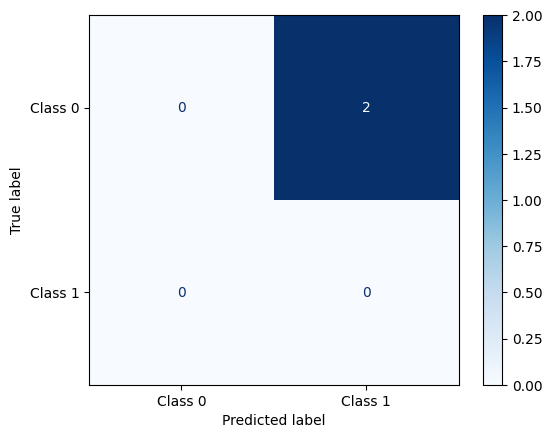

/home/alpaco/anaconda3/envs/test/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Precision: 0.00
Recall: 0.00
F1 Score: 0.00


In [97]:
from sklearn.model_selection import train_test_split
import torch
from torch.utils.data import TensorDataset,DataLoader



# 학습 데이터와 테스트 데이터를 PyTorch 텐서로 변환하여 모델 학습에 사용합니다.
test_X_tensor = torch.FloatTensor(test_x_seq)
test_y_tensor = torch.LongTensor(test_y_seq)


# PyTorch의 DataLoader를 사용해 데이터를 묶어 관리할 수 있습니다.
batch_size = 16  # 배치 사이즈는 한 번에 학습하는 데이터 개수를 뜻합니다.
test_dataset = TensorDataset(test_X_tensor, test_y_tensor)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)


###########################################################################################################################################

import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score
from torch.utils.data import DataLoader, TensorDataset
import matplotlib.pyplot as plt
from tqdm import tqdm

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

class BinaryLSTMModel(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers):
        super(BinaryLSTMModel, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, 1)  # 이진 분류이므로 출력 노드를 1개로 설정

    def forward(self, x):
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(device)
        c0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(device)

        out, _ = self.lstm(x, (h0, c0))
        out = self.fc(out[:, -1, :])  # 마지막 시퀀스 출력 사용
        return out

# 모델 초기화
input_size = X_seq.shape[2]
hidden_size = 50
num_layers = 1
model = BinaryLSTMModel(input_size, hidden_size, num_layers).to(device)


loaded_model = BinaryLSTMModel(X_seq.shape[2],50,1)
loaded_model.load_state_dict(torch.load('/home/alpaco/project/jsw_model/90frame000_LSTM.pt'))
loaded_model.to(device)
loaded_model.eval()


import torch
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt

correct = 0
total = 0
all_preds = []
all_labels = []
all_percen=[]
with torch.no_grad():
    for inputs, labels in test_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        
        # 모델 예측
        outputs = loaded_model(inputs)
        preds = torch.sigmoid(outputs).cpu().numpy() > 0.5  # 이진 분류로 변환
        percen = torch.sigmoid(outputs).cpu()
        # 예측값과 실제값 저장
        all_preds.extend(preds.astype(int).squeeze())
        all_labels.extend(labels.cpu().numpy().astype(int).squeeze())
        all_percen.extend(percen)
        # 정확도 계산
        correct += np.sum(preds.astype(int).squeeze() == labels.cpu().numpy())

        total += labels.size(0)

# 정확도 계산
accuracy = 100 * correct / total

print(f'Accuracy of the model on test data: {accuracy:.2f}%')

# 혼돈 행렬 계산
cm = confusion_matrix(all_labels, all_preds)

# 혼돈 행렬 출력
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Class 0', 'Class 1'])
disp.plot(cmap=plt.cm.Blues)
plt.show()

# Precision, Recall, F1-Score 계산
precision = precision_score(all_labels, all_preds)
recall = recall_score(all_labels, all_preds)
f1 = f1_score(all_labels, all_preds)

print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')

In [ ]:
all_percen

[tensor([0.8951]), tensor([0.9451])]

데이터 받아서 내가 해야하는 일은
1. abs 기반으로 진행했을 때, 명치 기반으로 centering진행해서 scaling 진행후 모델 만들어 볼 것 x11,x12 에서 진행
2. 지금 90프레임 기반으로 진행하고 있는데, 30 or 45프레임으로 sequence만들어서 그 중에서 몇 개 이상이 0일 경우 sequence안만들게 진행

In [14]:
import os
import pandas as pd
output_folder = '/home/alpaco/project/drunk_prj/data/normal_hip_align'
os.makedirs(output_folder,exist_ok=True)
for name in os.listdir('/home/alpaco/project/drunk_prj/data/normal_processed_csv'):
    csvpath =os.path.join('/home/alpaco/project/drunk_prj/data/normal_processed_csv',name)
    data = pd.read_csv(csvpath)
    
    keypoint_columns = [f'x{i}' for i in range(1, 18)] + [f'y{i}' for i in range(1, 18)]

    # 정렬된 데이터를 저장할 리스트
    aligned_data = []

    for index, row in data.iterrows():
        # 중심점 계산
        center_x = (row['x11'] + row['x12']) // 2
        center_y = (row['y11'] + row['y12']) // 2
        
        # 기존 데이터에서 중심점 빼기
        aligned_row = row.copy()
        for i in range(1, 18):
            aligned_row[f'x{i}'] = row[f'x{i}'] - center_x
            aligned_row[f'y{i}'] = row[f'y{i}'] - center_y

        aligned_data.append(aligned_row)

    # 정렬된 데이터 프레임 생성
    aligned_df = pd.DataFrame(aligned_data)
    
    output_csv_path = os.path.join(output_folder, name)

    # CSV 저장
    aligned_df.to_csv(output_csv_path, index=False)
    

In [7]:
import numpy as np

def create_sequences_with_filter(df, seq_length):
    xs, ys = [], []

    # 'FILENAME'과 'label' 기준으로 그룹화
    for _, group in df.groupby(['filename', 'label']):
        # 그룹 내 'frame' 기준 정렬
        group = group.sort_values(by=['frame']).reset_index(drop=True)
        
        # frame, FILENAME, label, y 제외한 좌표 피처
        data_X = group.drop(columns=['frame', 'filename', 'label', 'y'], errors='ignore').values  
        data_y = group['y'].values  # 이진 분류 레이블

        # 시퀀스 생성
        for i in range(len(data_X) - seq_length):
            x = data_X[i:i + seq_length]
            y = data_y[i + seq_length - 1]  # 시퀀스의 마지막 레이블 사용
            
            # 34개의 값이 모두 0인 프레임의 개수 계산
            zero_frame_count = np.sum(np.all(x == 0, axis=1))
            
            # 조건: 0으로만 이루어진 프레임이 30개 이상이면 해당 시퀀스를 제외
            if zero_frame_count < 30:
                xs.append(x)
                ys.append(y)

    return np.array(xs), np.array(ys)


In [3]:
# 일반인 /home/alpaco/project/drunk_prj/data/normal_processed_csv
import os 
import pandas as pd
Normal_Frame = pd.DataFrame()
for name in os.listdir('/home/alpaco/project/drunk_prj/data/normal_hip_align'):
    file_path = os.path.join('/home/alpaco/project/drunk_prj/data/normal_hip_align',name)
    data = pd.read_csv(file_path)
    data['y']=0
    num_cols = data.select_dtypes(include=['number']).columns  # 숫자형 열만 선택
    data[num_cols] = data[num_cols].clip(lower=0)
    Normal_Frame = pd.concat([Normal_Frame,data],ignore_index=True)
Normal_Frame
#40473  줄

,frame,x1,y1,x2,y2,x3,y3,x4,y4,x5,...,y14,x15,y15,x16,y16,x17,y17,label,y,filename
0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,ID: 2265.0,0,C_32_10_smp_su_09-11_14-06-00_a_aft_DF2.csv
1,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,ID: 2265.0,0,C_32_10_smp_su_09-11_14-06-00_a_aft_DF2.csv
2,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,ID: 2265.0,0,C_32_10_smp_su_09-11_14-06-00_a_aft_DF2.csv
3,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,ID: 2265.0,0,C_32_10_smp_su_09-11_14-06-00_a_aft_DF2.csv
4,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,ID: 2265.0,0,C_32_10_smp_su_09-11_14-06-00_a_aft_DF2.csv
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40468,86,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4,0,C_32_7_smp_su_09-11_10-47-00_a_for_DF2.csv
40469,87,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4,0,C_32_7_smp_su_09-11_10-47-00_a_for_DF2.csv
40470,88,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4,0,C_32_7_smp_su_09-11_10-47-00_a_for_DF2.csv
40471,89,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4,0,C_32_7_smp_su_09-11_10-47-00_a_for_DF2.csv


In [4]:
# 일반인 /home/alpaco/project/drunk_prj/data/normal_processed_csv
import os 
import pandas as pd
Normal_Frame = pd.DataFrame()
for name in os.listdir('/home/alpaco/project/drunk_prj/data/normal_hip_align'):
    file_path = os.path.join('/home/alpaco/project/drunk_prj/data/normal_hip_align',name)
    data = pd.read_csv(file_path)
    data['y']=0
    num_cols = data.select_dtypes(include=['number']).columns  # 숫자형 열만 선택
    data[num_cols] = data[num_cols].clip(lower=0)
    Normal_Frame = pd.concat([Normal_Frame,data],ignore_index=True)
    
Croki_Frame = pd.DataFrame()


croki_path = '/home/alpaco/project/drunk_prj/data/crokihip_align'
for vid in os.listdir(croki_path):
    csv_path = os.path.join(croki_path,vid)
    tmp_csv = pd.read_csv(csv_path)
    tmp_csv['y'] = 1
    tmp_csv['filename'] = (vid.split('/')[-1]).split('.')[0]
    num_cols = tmp_csv.select_dtypes(include=['number']).columns  # 숫자형 열만 선택
    tmp_csv[num_cols] = tmp_csv[num_cols].clip(lower=0)
    Croki_Frame = pd.concat([Croki_Frame,tmp_csv],ignore_index=True)
Croki_Frame
#34580줄


,frame,x1,y1,x2,y2,x3,y3,x4,y4,x5,...,y14,x15,y15,x16,y16,x17,y17,label,y,filename
0,356,0,0,0,0,0,0,482,228,0,...,606,570,571,547,722,591,680,ID: 2613.0,1,209-5_cam02_drunken01_place03_night_spring_503...
1,366,0,0,0,0,0,0,0,0,3,...,242,49,190,35,357,85,297,ID: 2613.0,1,209-5_cam02_drunken01_place03_night_spring_503...
2,376,0,0,0,0,0,0,0,0,12,...,248,63,191,59,363,97,302,ID: 2613.0,1,209-5_cam02_drunken01_place03_night_spring_503...
3,386,0,0,0,0,0,0,0,0,0,...,247,54,198,57,360,89,310,ID: 2613.0,1,209-5_cam02_drunken01_place03_night_spring_503...
4,396,0,0,0,0,0,0,0,0,0,...,241,53,210,63,354,79,331,ID: 2613.0,1,209-5_cam02_drunken01_place03_night_spring_503...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34575,887,0,0,0,0,0,0,5,0,0,...,171,0,141,101,312,0,276,ID: 1416.0,1,212-5_cam02_drunken03_place03_night_summer_167...
34576,897,0,0,0,0,0,0,4,0,0,...,168,0,146,61,309,26,257,ID: 1416.0,1,212-5_cam02_drunken03_place03_night_summer_167...
34577,907,0,0,0,0,0,0,0,0,0,...,155,1,108,0,335,41,221,ID: 1416.0,1,212-5_cam02_drunken03_place03_night_summer_167...
34578,917,0,0,0,0,0,0,3,0,0,...,163,0,120,15,311,41,244,ID: 1416.0,1,212-5_cam02_drunken03_place03_night_summer_167...


In [5]:
from sklearn.preprocessing import StandardScaler
Combined = pd.concat([Normal_Frame,Croki_Frame],ignore_index=True)


columns_to_convert = Combined.columns.difference(['filename','label'])

# float으로 변환
Combined[columns_to_convert] = Combined[columns_to_convert].astype(float)
#스케일링 진행 후



coordinate_cols = [f'x{i}' for i in range(1, 18)] + [f'y{i}' for i in range(1, 18)]
X = Combined[coordinate_cols].values  # 34개의 좌표 피처

scaler_X = StandardScaler()
X_normalized = scaler_X.fit_transform(X)
#y_normalized = scaler_y.fit_transform(y.reshape(-1, 1)).flatten()


Combined[coordinate_cols] = X_normalized

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler


# 6. sequence length 생성하기
import numpy as np
#Sequence Lenght 설정 후 진행 예정
def create_sequences(df, seq_length):
    xs, ys = [], []
    
    # 'FILENAME'과 'label' 기준으로 그룹화
    for _, group in df.groupby(['filename', 'label']):
        # 그룹 내 'frame' 기준 정렬
        group = group.sort_values(by=['frame']).reset_index(drop=True)
        
        # frame, FILENAME, label, id, y 제외한 좌표 피처
        data_X = group.drop(columns=['frame', 'filename', 'label','y'], errors='ignore').values  
        
        data_y = group['y'].values  # 이진 분류 레이블
        
        # 시퀀스 생성
        for i in range(len(data_X) - seq_length):
            x = data_X[i:i + seq_length]
            y = data_y[i + seq_length - 1]  # 시퀀스의 마지막 레이블 사용
            xs.append(x)
            ys.append(y)
    
    return np.array(xs), np.array(ys)

sequence_length = 45

# 시퀀스 생성
X_seq, Y_seq = create_sequences_with_filter(Combined, sequence_length)


In [ ]:

from sklearn.model_selection import train_test_split
import torch
from torch.utils.data import TensorDataset,DataLoader

# 학습 데이터와 테스트 데이터로 나누고, 라벨의 비율을 유지합니다.
train_X, valid_X, train_y, valid_y = train_test_split(X_seq, Y_seq, test_size=0.2, stratify=Y_seq, random_state=42)

# 학습 데이터를 다시 셔플하여 모델이 순서에 너무 의존하지 않도록 합니다.
train_indices = np.arange(len(train_X))
np.random.shuffle(train_indices)
train_X, train_y = train_X[train_indices], train_y[train_indices]


# 학습 데이터와 테스트 데이터를 PyTorch 텐서로 변환하여 모델 학습에 사용합니다.
train_X_tensor = torch.FloatTensor(train_X)
train_y_tensor = torch.LongTensor(train_y)
valid_X_tensor = torch.FloatTensor(valid_X)
valid_y_tensor = torch.LongTensor(valid_y)

# PyTorch의 DataLoader를 사용해 데이터를 묶어 관리할 수 있습니다.
batch_size = 16  # 배치 사이즈는 한 번에 학습하는 데이터 개수를 뜻합니다.
train_dataset = TensorDataset(train_X_tensor, train_y_tensor)
valid_dataset = TensorDataset(valid_X_tensor, valid_y_tensor)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
valid_loader = DataLoader(valid_dataset, batch_size=batch_size, shuffle=False)


###########################################################################################################################################

import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score
from torch.utils.data import DataLoader, TensorDataset
import matplotlib.pyplot as plt
from tqdm import tqdm

device = torch.device("cuda:2" if torch.cuda.is_available() else "cpu")

class BinaryLSTMModel(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers):
        super(BinaryLSTMModel, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, 1)  # 이진 분류이므로 출력 노드를 1개로 설정

    def forward(self, x):
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(device)
        c0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(device)

        out, _ = self.lstm(x, (h0, c0))
        out = self.fc(out[:, -1, :])  # 마지막 시퀀스 출력 사용
        return out

# 모델 초기화
input_size = X_seq.shape[2]
hidden_size = 50
num_layers = 1
model = BinaryLSTMModel(input_size, hidden_size, num_layers).to(device)

# 손실 함수 및 옵티마이저
criterion = nn.BCEWithLogitsLoss()  # 이진 분류용
optimizer = optim.NAdam(model.parameters(), lr=0.01)

# 학습 및 검증 함수
def evaluate(model, val_loader):
    model.eval()
    all_preds = []
    all_labels = []
    with torch.no_grad():
        for inputs, labels in val_loader:
            inputs, labels = inputs.to(device), labels.to(device).float()
            outputs = model(inputs)
            preds = torch.sigmoid(outputs).cpu().numpy() > 0.5
            all_preds.extend(preds.astype(int))
            all_labels.extend(labels.cpu().numpy().astype(int))

    # F1 Score 계산
    f1 = f1_score(all_labels, all_preds)
    return f1

# 모델 학습
num_epochs = 50
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    train_loader = tqdm(train_loader, desc=f"Epoch {epoch+1}/{num_epochs}")

    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device).float()

        optimizer.zero_grad()
        outputs = model(inputs)
        outputs = outputs.squeeze()
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    # F1 Score 계산
    f1 = evaluate(model, valid_loader)
    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {running_loss/len(train_loader):.4f}, F1 Score: {f1:.4f}')

Epoch 1/50: 100%|██████████| 1888/1888 [00:05<00:00, 322.67it/s]


Epoch [1/50], Loss: 0.2599, F1 Score: 0.9015


Epoch 2/50: 100%|██████████| 1888/1888 [00:05<00:00, 372.44it/s]


Epoch [2/50], Loss: 0.1695, F1 Score: 0.9100


Epoch 3/50: 100%|██████████| 1888/1888 [00:05<00:00, 363.44it/s]


Epoch [3/50], Loss: 0.1593, F1 Score: 0.9094


Epoch 4/50: 100%|██████████| 1888/1888 [00:05<00:00, 357.25it/s]


Epoch [4/50], Loss: 0.1588, F1 Score: 0.9118


Epoch 5/50: 100%|██████████| 1888/1888 [00:05<00:00, 347.54it/s]


Epoch [5/50], Loss: 0.1569, F1 Score: 0.9110


Epoch 6/50: 100%|██████████| 1888/1888 [00:05<00:00, 370.17it/s]


Epoch [6/50], Loss: 0.1568, F1 Score: 0.9066


Epoch 7/50: 100%|██████████| 1888/1888 [00:04<00:00, 381.58it/s]


Epoch [7/50], Loss: 0.1503, F1 Score: 0.8570


Epoch 8/50: 100%|██████████| 1888/1888 [00:04<00:00, 391.81it/s]


Epoch [8/50], Loss: 0.1457, F1 Score: 0.9086


Epoch 9/50: 100%|██████████| 1888/1888 [00:04<00:00, 389.78it/s]


Epoch [9/50], Loss: 0.1500, F1 Score: 0.9140


Epoch 10/50: 100%|██████████| 1888/1888 [00:04<00:00, 379.72it/s]


Epoch [10/50], Loss: 0.1527, F1 Score: 0.9110


Epoch 11/50: 100%|██████████| 1888/1888 [00:05<00:00, 346.68it/s]


Epoch [11/50], Loss: 0.1444, F1 Score: 0.9178


Epoch 12/50: 100%|██████████| 1888/1888 [00:04<00:00, 378.37it/s]


Epoch [12/50], Loss: 0.1413, F1 Score: 0.9174


Epoch 13/50: 100%|██████████| 1888/1888 [00:05<00:00, 377.50it/s]


Epoch [13/50], Loss: 0.1388, F1 Score: 0.9185


Epoch 14/50: 100%|██████████| 1888/1888 [00:04<00:00, 380.31it/s]


Epoch [14/50], Loss: 0.1422, F1 Score: 0.9096


Epoch 15/50: 100%|██████████| 1888/1888 [00:05<00:00, 375.76it/s]


Epoch [15/50], Loss: 0.1445, F1 Score: 0.9169


Epoch 16/50: 100%|██████████| 1888/1888 [00:05<00:00, 374.75it/s]


Epoch [16/50], Loss: 0.1548, F1 Score: 0.9163


Epoch 17/50: 100%|██████████| 1888/1888 [00:04<00:00, 380.28it/s]


Epoch [17/50], Loss: 0.1424, F1 Score: 0.9171


Epoch 18/50: 100%|██████████| 1888/1888 [00:05<00:00, 375.57it/s]


Epoch [18/50], Loss: 0.1395, F1 Score: 0.9186


Epoch 19/50: 100%|██████████| 1888/1888 [00:05<00:00, 362.86it/s]


Epoch [19/50], Loss: 0.1465, F1 Score: 0.9174


Epoch 20/50: 100%|██████████| 1888/1888 [00:05<00:00, 375.07it/s]


Epoch [20/50], Loss: 0.1522, F1 Score: 0.9122


Epoch 21/50: 100%|██████████| 1888/1888 [00:05<00:00, 369.36it/s]


Epoch [21/50], Loss: 0.1607, F1 Score: 0.8913


Epoch 22/50: 100%|██████████| 1888/1888 [00:05<00:00, 375.44it/s]


Epoch [22/50], Loss: 0.2018, F1 Score: 0.9038


Epoch 23/50: 100%|██████████| 1888/1888 [00:05<00:00, 364.90it/s]


Epoch [23/50], Loss: 0.1665, F1 Score: 0.9082


Epoch 24/50: 100%|██████████| 1888/1888 [00:05<00:00, 347.00it/s]


Epoch [24/50], Loss: 0.1802, F1 Score: 0.8994


Epoch 25/50: 100%|██████████| 1888/1888 [00:05<00:00, 369.01it/s]


Epoch [25/50], Loss: 0.1764, F1 Score: 0.8980


Epoch 26/50: 100%|██████████| 1888/1888 [00:05<00:00, 366.91it/s]


Epoch [26/50], Loss: 0.1754, F1 Score: 0.9002


Epoch 27/50: 100%|██████████| 1888/1888 [00:05<00:00, 372.37it/s]


Epoch [27/50], Loss: 0.1778, F1 Score: 0.9088


Epoch 28/50: 100%|██████████| 1888/1888 [00:05<00:00, 370.74it/s]


Epoch [28/50], Loss: 0.1638, F1 Score: 0.9120


Epoch 29/50: 100%|██████████| 1888/1888 [00:04<00:00, 378.70it/s]


Epoch [29/50], Loss: 0.1555, F1 Score: 0.8719


Epoch 30/50: 100%|██████████| 1888/1888 [00:05<00:00, 376.92it/s]


Epoch [30/50], Loss: 0.1434, F1 Score: 0.9141


Epoch 31/50: 100%|██████████| 1888/1888 [00:04<00:00, 380.52it/s]


Epoch [31/50], Loss: 0.1470, F1 Score: 0.9153


Epoch 32/50: 100%|██████████| 1888/1888 [00:05<00:00, 371.57it/s]


Epoch [32/50], Loss: 0.1510, F1 Score: 0.9153


Epoch 33/50: 100%|██████████| 1888/1888 [00:05<00:00, 368.61it/s]


Epoch [33/50], Loss: 0.1494, F1 Score: 0.9085


Epoch 34/50: 100%|██████████| 1888/1888 [00:05<00:00, 375.27it/s]


Epoch [34/50], Loss: 0.1965, F1 Score: 0.8653


Epoch 35/50: 100%|██████████| 1888/1888 [00:04<00:00, 381.70it/s]


Epoch [35/50], Loss: 0.2230, F1 Score: 0.8956


Epoch 36/50: 100%|██████████| 1888/1888 [00:05<00:00, 375.03it/s]


Epoch [36/50], Loss: 0.1875, F1 Score: 0.8979


Epoch 37/50: 100%|██████████| 1888/1888 [00:05<00:00, 367.86it/s]


Epoch [37/50], Loss: 0.1765, F1 Score: 0.9001


Epoch 38/50: 100%|██████████| 1888/1888 [00:05<00:00, 373.71it/s]


Epoch [38/50], Loss: 0.1702, F1 Score: 0.9011


Epoch 39/50: 100%|██████████| 1888/1888 [00:05<00:00, 374.25it/s]


Epoch [39/50], Loss: 0.1857, F1 Score: 0.9055


Epoch 40/50: 100%|██████████| 1888/1888 [00:05<00:00, 371.70it/s]


Epoch [40/50], Loss: 0.1606, F1 Score: 0.9112


Epoch 41/50: 100%|██████████| 1888/1888 [00:05<00:00, 369.64it/s]


Epoch [41/50], Loss: 0.1970, F1 Score: 0.9097


Epoch 42/50: 100%|██████████| 1888/1888 [00:05<00:00, 377.50it/s]


Epoch [42/50], Loss: 0.1661, F1 Score: 0.9101


Epoch 43/50: 100%|██████████| 1888/1888 [00:05<00:00, 369.60it/s]


Epoch [43/50], Loss: 0.1667, F1 Score: 0.9040


Epoch 44/50: 100%|██████████| 1888/1888 [00:05<00:00, 369.20it/s]


Epoch [44/50], Loss: 0.1827, F1 Score: 0.8466


Epoch 45/50: 100%|██████████| 1888/1888 [00:05<00:00, 368.70it/s]


Epoch [45/50], Loss: 0.1885, F1 Score: 0.9007


Epoch 46/50: 100%|██████████| 1888/1888 [00:05<00:00, 375.12it/s]


Epoch [46/50], Loss: 0.1760, F1 Score: 0.9045


Epoch 47/50: 100%|██████████| 1888/1888 [00:05<00:00, 373.85it/s]


Epoch [47/50], Loss: 0.1723, F1 Score: 0.9050


Epoch 48/50: 100%|██████████| 1888/1888 [00:05<00:00, 371.16it/s]


Epoch [48/50], Loss: 0.1658, F1 Score: 0.9078


Epoch 49/50: 100%|██████████| 1888/1888 [00:05<00:00, 369.38it/s]


Epoch [49/50], Loss: 0.1934, F1 Score: 0.9011


Epoch 50/50: 100%|██████████| 1888/1888 [00:05<00:00, 369.95it/s]


Epoch [50/50], Loss: 0.1830, F1 Score: 0.8530


In [10]:
torch.save(model.state_dict(),'11_27alignremodel_45LSTM.pt')

In [14]:
import cv2
import csv
import os
import json
import torch
from ultralytics import YOLO
import numpy as np
# 모델 설정
model = YOLO('yolov8l.pt')
pose = YOLO('yolov8l-pose.pt')
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model.to(device)
pose.to(device)
# 처리된 동영상 기록 파일
PROCESSED_VIDEOS_LOG = 'OSHprocessed_videos.json'
def load_processed_videos(log_path):
    """처리된 동영상 기록 로드"""
    if os.path.exists(log_path):
        with open(log_path, 'r') as f:
            return set(json.load(f))
    return set()
def save_processed_videos(log_path, processed_videos):
    """처리된 동영상 기록 저장"""
    with open(log_path, 'w') as f:
        json.dump(list(processed_videos), f)
def split_video(input_video_path, segment_dir, segment_duration=30):
    """동영상을 정확히 30초 단위로 잘라 저장"""
    cap = cv2.VideoCapture(input_video_path)
    input_fps = cap.get(cv2.CAP_PROP_FPS)
    total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
    video_duration = total_frames / input_fps if input_fps > 0 else 0
    if video_duration < segment_duration:
        print(f"Skipping {input_video_path}: Video duration is less than {segment_duration} seconds.")
        cap.release()
        return []
    segments = []
    base_name = os.path.splitext(os.path.basename(input_video_path))[0]
    fourcc = cv2.VideoWriter_fourcc(*'mp4v')
    segment_idx = 0
    for start_frame in range(0, total_frames, int(segment_duration * input_fps)):
        end_frame = start_frame + int(segment_duration * input_fps)
        if end_frame > total_frames:
            break  # 30초 미만 남은 부분 무시
        segment_path = os.path.join(segment_dir, f"{base_name}_part{segment_idx}.mp4")
        out = cv2.VideoWriter(segment_path, fourcc, input_fps, (int(cap.get(3)), int(cap.get(4))))
        cap.set(cv2.CAP_PROP_POS_FRAMES, start_frame)  # 시작 프레임 설정
        for _ in range(int(segment_duration * input_fps)):
            ret, frame = cap.read()
            if not ret:
                break
            out.write(frame)
        out.release()
        segments.append(segment_path)
        segment_idx += 1
    cap.release()
    return segments
def convert_to_3fps(input_video_path, output_dir):
    """동영상을 3FPS로 변환하여 저장"""
    cap = cv2.VideoCapture(input_video_path)
    input_fps = cap.get(cv2.CAP_PROP_FPS)
    output_fps = 3
    frame_skip = int(input_fps / output_fps)
    base_name = os.path.splitext(os.path.basename(input_video_path))[0]
    output_path = os.path.join(output_dir, f"{base_name}_3fps.mp4")
    fourcc = cv2.VideoWriter_fourcc(*'mp4v')
    out = cv2.VideoWriter(output_path, fourcc, output_fps, (int(cap.get(3)), int(cap.get(4))))
    frame_idx = 0
    while True:
        ret, frame = cap.read()
        if not ret:
            break
        if frame_idx % frame_skip == 0:
            out.write(frame)
        frame_idx += 1
    cap.release()
    out.release()
    return output_path
def process_video(input_video_path, csv_path):
    """동영상을 처리하고 키포인트 데이터를 단일 CSV에 저장, 시각화"""
    cap = cv2.VideoCapture(input_video_path)
    output_path = input_video_path.replace('.mp4', '_keypoints.mp4')
    fourcc = cv2.VideoWriter_fourcc(*'mp4v')
    out = cv2.VideoWriter(output_path, fourcc, int(cap.get(cv2.CAP_PROP_FPS)),
                          (int(cap.get(cv2.CAP_PROP_FRAME_WIDTH)), int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))))
    total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
    num_keypoints = 17
    header = ['ID', 'frame'] + [f'x{i}' for i in range(1, num_keypoints + 1)] + [f'y{i}' for i in range(1, num_keypoints + 1)]
    keypoint_data = {}
    frame_idx = 0
    while True:
        ret, frame = cap.read()
        if not ret:
            break
        results = model.track(frame, persist=True, conf=0.1)
        for result in results:
            if result.boxes.id is not None:
                for box, track_id, cls_id in zip(result.boxes.xyxy, result.boxes.id, result.boxes.cls):
                    if int(cls_id) == 0:  # 사람 클래스만 필터링
                         # 기존 프레임 복사 후 바운딩 박스 외부를 검정색으로 마스킹
                        x1, y1, x2, y2 = map(int, box)
                        masked_frame = np.zeros_like(frame)  # 전체 검정색
                        masked_frame[y1:y2, x1:x2] = frame[y1:y2, x1:x2]  # 바운딩 박스 영역만 원본 이미지 유지
                        keypoints_results = pose(frame, imgsz=800)
                        if hasattr(keypoints_results[0], 'keypoints'):
                            keypoints = keypoints_results[0].keypoints.xy.cpu().numpy()[0]
                            if keypoints.shape[0] >= num_keypoints:
                                track_id_str = str(track_id)
                                if track_id_str not in keypoint_data:
                                    keypoint_data[track_id_str] = {}
                                keypoint_data[track_id_str][frame_idx] = [int(coord) for point in keypoints for coord in point]
                                # 키포인트 시각화
                                for i, (x, y) in enumerate(keypoints):
                                    x, y = int(x), int(y)
                                    cv2.circle(frame, (x, y), 5, (0, 255, 0), -1)  # 초록색 원
                                    cv2.putText(frame, f"{i+1}", (x, y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 1)
                                # 사람 ID 및 키포인트 정보 텍스트 추가
                                cv2.putText(frame, f"ID: {track_id_str}",
                                            (int(box[0]), int(box[1])-10),
                                            cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 255), 1)
        out.write(frame)
        frame_idx += 1
    cap.release()
    out.release()
    if not keypoint_data:
        print(f"No keypoint data found for {input_video_path}. Skipping CSV generation.")
        return False
    # CSV 저장
    with open(csv_path, 'w', newline='') as csv_file:
        writer = csv.writer(csv_file)
        writer.writerow(header)
        for track_id, frame_data in sorted(keypoint_data.items()):
            for frame_idx in range(total_frames):
                row = [f'ID: {track_id}', frame_idx] + frame_data.get(frame_idx, [0] * (num_keypoints * 2))
                writer.writerow(row)
    print(f"CSV 저장 완료: {csv_path}")
    print(f"키포인트 시각화 완료: {output_path}")
    return True
# 메인 실행
video_dir = '/home/alpaco/project/drunk_prj/data/videofile/confirm_video_file/totter/totter06'
output_dir = '/home/alpaco/hsb/11_25project/OSH6'
csv_dir = '/home/alpaco/hsb/11_25project/OSHcsv_combined6'
segment_dir = '/home/alpaco/hsb/11_25project/cutted_vid6'
os.makedirs(output_dir, exist_ok=True)
os.makedirs(csv_dir, exist_ok=True)
os.makedirs(segment_dir, exist_ok=True)
processed_videos = load_processed_videos(PROCESSED_VIDEOS_LOG)
for video in os.listdir(video_dir):
    if video in processed_videos:
        print(f"Skipping {video}: already processed.")
        continue
    input_video_path = os.path.join(video_dir, video)
    segments = split_video(input_video_path, segment_dir)
    for segment in segments:
        converted_video_path = convert_to_3fps(segment, output_dir)
        csv_path = os.path.join(csv_dir, f"{os.path.basename(segment)}_combined.csv")
        processed = process_video(converted_video_path, csv_path)
        if processed:
            processed_videos.add(video)
save_processed_videos(PROCESSED_VIDEOS_LOG, processed_videos)

Skipping /home/alpaco/project/drunk_prj/data/videofile/confirm_video_file/totter/totter06/278-6_cam03_drunken03_place03_night_winter_688_873.mp4: Video duration is less than 30 seconds.

0: 384x640 1 person, 13.6ms
Speed: 3.4ms preprocess, 13.6ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

0: 480x800 1 person, 17.3ms
Speed: 4.0ms preprocess, 17.3ms inference, 2.1ms postprocess per image at shape (1, 3, 480, 800)

0: 384x640 1 person, 14.5ms
Speed: 3.6ms preprocess, 14.5ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

0: 480x800 1 person, 14.6ms
Speed: 4.2ms preprocess, 14.6ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 800)

0: 384x640 1 person, 1 backpack, 13.3ms
Speed: 3.1ms preprocess, 13.3ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

0: 480x800 1 person, 14.8ms
Speed: 3.9ms preprocess, 14.8ms inference, 1.9ms postprocess per image at shape (1, 3, 480, 800)

0: 384x640 1 person, 1 backpack, 13.1ms
Speed

In [16]:
import os
import pandas as pd

# 디렉토리 설정
input_dirs = ['/home/alpaco/hsb/11_25project/csv_combined','/home/alpaco/hsb/11_25project/OSHcsv_combined2','/home/alpaco/hsb/11_25project/OSHcsv_combined3','/home/alpaco/hsb/11_25project/OSHcsv_combined4','/home/alpaco/hsb/11_25project/OSHcsv_combined5','/home/alpaco/hsb/11_25project/OSHcsv_combined6']
output_dir = '/home/alpaco/project/drunk_prj/data/chroma3frame'
os.makedirs(output_dir, exist_ok=True)
duplicates = []
# CSV 파일 처리
for input_dir in input_dirs:
    for csv_file in os.listdir(input_dir):
        input_path = os.path.join(input_dir, csv_file)
        df = pd.read_csv(input_path)

        if 'frame' not in df.columns:
            print(f"Skipping {csv_file}: 'frame' column not found.")
            continue

        # 현재 CSV 내부에서 중복된 frame 확인
        if df['frame'].duplicated().any():  # 중복된 값이 하나라도 있으면
            print(f"Skipping {csv_file}: Duplicate frames found within the file.")
            duplicates.append(input_path)
            continue

        # # 중복이 없는 경우 저장
        # output_path = os.path.join(output_dir, csv_file)
        # df.to_csv(output_path, index=False)
        # print(f"Saved {csv_file} to {output_dir}.")
 

Skipping 209-5_cam03_drunken01_place03_night_winter_381_2313_part0.mp4_combined.csv: Duplicate frames found within the file.
Skipping 209-1_cam01_drunken01_place03_night_winter_6218_7538_part0.mp4_combined.csv: Duplicate frames found within the file.
Skipping 209-3_cam03_drunken01_place03_night_winter_5752_6663_part0.mp4_combined.csv: Duplicate frames found within the file.
Skipping 209-3_cam03_drunken01_place03_night_winter_443_4252_part0.mp4_combined.csv: Duplicate frames found within the file.
Skipping 209-5_cam01_drunken01_place03_night_winter_2378_3736_part0.mp4_combined.csv: Duplicate frames found within the file.
Skipping 209-3_cam03_drunken01_place03_night_winter_443_4252_part3.mp4_combined.csv: Duplicate frames found within the file.
Skipping 209-3_cam01_drunken01_place03_night_winter_382_4237_part3.mp4_combined.csv: Duplicate frames found within the file.
Skipping 209-5_cam02_drunken01_place03_night_summer_5991_7044_part0.mp4_combined.csv: Duplicate frames found within the fi

In [ ]:
import os
import re
import pandas as pd

# 입력 및 출력 디렉토리 설정
input_folder = '/home/alpaco/project/drunk_prj/data/chroma3frame'
output_folder = '/home/alpaco/project/drunk_prj/data/chroma3frame0넣기'
os.makedirs(output_folder, exist_ok=True)

# 입력 폴더의 모든 파일 반복 처리
for csv_file in os.listdir(input_folder):
    # CSV 파일만 처리
    if not csv_file.endswith('.csv'):
        continue

    min_frame, max_frame = 0,99

    # CSV 파일 읽기
    csv_path = os.path.join(input_folder, csv_file)
    try:
        df = pd.read_csv(csv_path)
        print(f"CSV 파일 읽기 성공: {csv_path}")
    except Exception as e:
        print(f"CSV 파일을 읽을 수 없습니다: {csv_path}. 오류: {e}")
        continue

    # 'label' 열 확인
    if 'ID' not in df.columns:
        print(f"'ID' 열이 없습니다: {csv_path}. 파일을 건너뜁니다.")
        continue

    # 'frame' 열 확인
    if 'frame' not in df.columns:
        print(f"'frame' 열이 없습니다: {csv_path}. 파일을 건너뜁니다.")
        continue

    # 'label' 열을 기준으로 그룹화 및 프레임 보정
    processed_dfs = []
    for label, group in df.groupby('ID'):
        # 전체 프레임 범위 생성
        full_frames = pd.DataFrame({'frame': range(min_frame, max_frame + 1)})

        # 기존 데이터와 병합하여 누락된 프레임 추가
        merged = pd.merge(full_frames, group, on='frame', how='left')

        # 누락된 값 채우기
        for col in merged.columns:
            if col != 'frame' and col != 'label':  # frame과 label 열은 유지
                merged[col] = merged[col].fillna(0)
        merged['ID'] = merged['ID'].fillna(label)

        # 처리된 데이터 저장
        processed_dfs.append(merged)

    # 그룹 데이터 병합
    if processed_dfs:
        final_df = pd.concat(processed_dfs, ignore_index=True)
    else:
        print(f"처리된 데이터가 없습니다: {csv_path}. 파일을 건너뜁니다.")
        continue

    # 결과 저장 경로
    output_path = os.path.join(output_folder, csv_file)
    try:
        final_df.to_csv(output_path, index=False)
        print(f"처리 완료: {output_path}")
    except Exception as e:
        print(f"결과를 저장하는 동안 오류 발생: {output_path}. 오류: {e}")


84

In [13]:
normal = pd.DataFrame()
for csv_name in os.listdir('/home/alpaco/project/drunk_prj/data/normal_editted_Final'):
    csv_path = os.path.join('/home/alpaco/project/drunk_prj/data/normal_editted_Final',csv_name)
    data = pd.read_csv(csv_path)
    data['y']=0
    data['FILENAME'] =csv_name.split(".")[0]
    num_cols = data.select_dtypes(include=['number']).columns  # 숫자형 열만 선택
    data[num_cols] = data[num_cols].clip(lower=0)
    normal = pd.concat([normal,data],ignore_index=True)
normal

,frame,x1,y1,x2,y2,x3,y3,x4,y4,x5,...,y14,x15,y15,x16,y16,x17,y17,label,y,FILENAME
0,6,1710.0,711.0,1715.0,701.0,0.0,0.0,1737.0,706.0,0.0,...,1031.0,1675.0,1000.0,1720.0,1076.0,1660.0,1052.0,1.0,0,C_32_8_smp_su_09-11_11-43-00_b_for_DF2_label1
1,7,0.0,0.0,0.0,0.0,0.0,0.0,1621.0,659.0,0.0,...,893.0,1648.0,919.0,1480.0,939.0,1654.0,1026.0,1.0,0,C_32_8_smp_su_09-11_11-43-00_b_for_DF2_label1
2,8,0.0,0.0,1499.0,601.0,0.0,0.0,1516.0,602.0,0.0,...,821.0,1538.0,836.0,1461.0,891.0,1580.0,926.0,1.0,0,C_32_8_smp_su_09-11_11-43-00_b_for_DF2_label1
3,9,0.0,0.0,0.0,0.0,0.0,0.0,1430.0,553.0,0.0,...,802.0,1390.0,728.0,1461.0,884.0,1360.0,785.0,1.0,0,C_32_8_smp_su_09-11_11-43-00_b_for_DF2_label1
4,10,0.0,0.0,0.0,0.0,0.0,0.0,1352.0,500.0,0.0,...,735.0,1341.0,713.0,1376.0,797.0,1329.0,777.0,1.0,0,C_32_8_smp_su_09-11_11-43-00_b_for_DF2_label1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54219,250,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,0,C_32_11_smp_su_09-11_15-01-00_a_aft_DF2_label6
54220,251,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,0,C_32_11_smp_su_09-11_15-01-00_a_aft_DF2_label6
54221,252,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,0,C_32_11_smp_su_09-11_15-01-00_a_aft_DF2_label6
54222,253,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,0,C_32_11_smp_su_09-11_15-01-00_a_aft_DF2_label6


In [14]:

import pandas as pd
import os
Combined = pd.DataFrame()
chroma =pd.DataFrame()
for csv_name in os.listdir('/home/alpaco/project/drunk_prj/data/chroma3frame0넣기'):
    csv_path = os.path.join('/home/alpaco/project/drunk_prj/data/chroma3frame0넣기',csv_name)
    data = pd.read_csv(csv_path)
    data['y']=1
    data['label']=data['ID']
    data = data.drop(columns=['ID'])
    data['FILENAME'] = csv_name.split(".")[0]
    num_cols = data.select_dtypes(include=['number']).columns  # 숫자형 열만 선택
    data[num_cols] = data[num_cols].clip(lower=0)
    chroma = pd.concat([chroma,data],ignore_index=True)

chroma

,frame,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,y11,y12,y13,y14,y15,y16,y17,y,label,FILENAME
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,ID: tensor(274.),217-2_cam02_drunken04_place03_night_summer_153...
1,1,0,0,0,0,0,0,0,0,209,...,1912,469,1948,426,2061,488,2132,1,ID: tensor(274.),217-2_cam02_drunken04_place03_night_summer_153...
2,2,0,0,0,0,0,0,0,0,306,...,1838,483,1898,615,1988,492,2093,1,ID: tensor(274.),217-2_cam02_drunken04_place03_night_summer_153...
3,3,0,0,0,0,0,0,0,0,343,...,1794,614,1818,591,1965,578,2018,1,ID: tensor(274.),217-2_cam02_drunken04_place03_night_summer_153...
4,4,0,0,0,0,0,0,0,0,387,...,1785,644,1752,603,1928,792,1902,1,ID: tensor(274.),217-2_cam02_drunken04_place03_night_summer_153...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24195,95,2533,955,0,0,2528,946,0,0,2509,...,1190,2517,1193,2516,1287,2509,1294,1,ID: tensor(602.),278-3_cam01_drunken03_place03_night_summer_411...
24196,96,2532,953,0,0,2527,944,0,0,2508,...,1191,2516,1194,2516,1287,2508,1294,1,ID: tensor(602.),278-3_cam01_drunken03_place03_night_summer_411...
24197,97,2528,950,0,0,2523,941,0,0,2505,...,1192,2517,1194,2516,1286,2507,1292,1,ID: tensor(602.),278-3_cam01_drunken03_place03_night_summer_411...
24198,98,2529,948,0,0,2524,940,0,0,2503,...,1192,2518,1194,2515,1286,2509,1293,1,ID: tensor(602.),278-3_cam01_drunken03_place03_night_summer_411...


In [ ]:
Combined = pd.concat([normal,chroma])

In [6]:
input_path =  '/home/alpaco/project/jsw_model/1126'
output_path = '/home/alpaco/project/jsw_model/30s_1126'
os.makedirs(output_path,exist_ok=True)
for i in os.listdir(input_path):
    csv_file = os.path.join(input_path,i)
    data = pd.read_csv(csv_file)
    first_frame = data['frame'].min()
    last_frame = data['frame'].max()
    
    if int(last_frame)-int(first_frame) >90:
        full_frames = pd.DataFrame({'frame': range(first_frame, last_frame + 1)})

    else:
        full_frames = pd.DataFrame({'frame': range(first_frame, first_frame + 91)})
    # 기존 데이터와 병합하여 누락된 프레임 추가
    merged = pd.merge(full_frames, data, on='frame', how='left')

    # 누락된 값 채우기
    for col in merged.columns:
        if col != 'frame' and col != 'label':  # frame과 label 열은 유지
            merged[col] = merged[col].fillna(0)
    merged['label'] = merged['label'].fillna(label)

    # 처리된 데이터 저장
    togo = os.path.join(output_path,i)
    merged.to_csv(togo,index=False)


# 일반인 조정한 것으로 다시

In [3]:
import os
import pandas as pd

norm_data = pd.read_csv('/home/alpaco/project/drunk_prj/data/3_frame_data/final_normal.csv')
drunk_data = pd.read_csv('/home/alpaco/project/drunk_prj/data/3_frame_data/final_drunken.csv')


Combined = pd.concat([norm_data,drunk_data],ignore_index=False)
Combined.drop(['Unnamed: 0.1','Unnamed: 0'],axis=1,inplace=True)
Combined


,frame,x1,y1,x2,y2,x3,y3,x4,y4,x5,...,y14,x15,y15,x16,y16,x17,y17,label,y,FILENAME
0,6,1710.0,711.0,1715.0,701.0,0.0,0.0,1737.0,706.0,0.0,...,1031.0,1675.0,1000.0,1720.0,1076.0,1660.0,1052.0,1.0,0,C_32_8_smp_su_09-11_11-43-00_b_for_DF2_label1
1,7,0.0,0.0,0.0,0.0,0.0,0.0,1621.0,659.0,0.0,...,893.0,1648.0,919.0,1480.0,939.0,1654.0,1026.0,1.0,0,C_32_8_smp_su_09-11_11-43-00_b_for_DF2_label1
2,8,0.0,0.0,1499.0,601.0,0.0,0.0,1516.0,602.0,0.0,...,821.0,1538.0,836.0,1461.0,891.0,1580.0,926.0,1.0,0,C_32_8_smp_su_09-11_11-43-00_b_for_DF2_label1
3,9,0.0,0.0,0.0,0.0,0.0,0.0,1430.0,553.0,0.0,...,802.0,1390.0,728.0,1461.0,884.0,1360.0,785.0,1.0,0,C_32_8_smp_su_09-11_11-43-00_b_for_DF2_label1
4,10,0.0,0.0,0.0,0.0,0.0,0.0,1352.0,500.0,0.0,...,735.0,1341.0,713.0,1376.0,797.0,1329.0,777.0,1.0,0,C_32_8_smp_su_09-11_11-43-00_b_for_DF2_label1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24195,95,2533.0,1069.0,955.0,0.0,0.0,0.0,0.0,2522.0,2528.0,...,2516.0,0.0,1287.0,0.0,2509.0,2497.0,1294.0,ID: tensor(602.),1,278-3_cam01_drunken03_place03_night_summer_411...
24196,96,2532.0,1067.0,953.0,0.0,0.0,0.0,0.0,2527.0,2527.0,...,2516.0,0.0,1287.0,0.0,2508.0,2498.0,1294.0,ID: tensor(602.),1,278-3_cam01_drunken03_place03_night_summer_411...
24197,97,2528.0,1063.0,950.0,0.0,0.0,0.0,0.0,2523.0,2523.0,...,2516.0,0.0,1286.0,0.0,2507.0,2498.0,1292.0,ID: tensor(602.),1,278-3_cam01_drunken03_place03_night_summer_411...
24198,98,2529.0,1065.0,948.0,0.0,0.0,0.0,0.0,2526.0,2524.0,...,2515.0,0.0,1286.0,0.0,2509.0,2501.0,1293.0,ID: tensor(602.),1,278-3_cam01_drunken03_place03_night_summer_411...


In [4]:
Combined.to_csv('/home/alpaco/project/drunk_prj/data/3_frame_data/final_combined.csv')

In [8]:
import pandas as pd
import numpy as np

def calculate_head_coordinates_for_csv(csv_path, output_path):
    # CSV 파일 읽기
    df = pd.read_csv(csv_path)

    # 얼굴에 해당하는 키포인트 인덱스 (1, 2, 3, 4, 5)
    face_indices = [1, 2, 3, 4, 5]

    # x_head와 y_head를 계산하여 새로운 열로 추가
    x_columns = [f"x{i}" for i in range(1, 18)]  # x1 ~ x17
    y_columns = [f"y{i}" for i in range(1, 18)]  # y1 ~ y17

    def calculate_head(row):
        x_values = [row[f"x{i}"] for i in face_indices if row[f"x{i}"] != 0]
        y_values = [row[f"y{i}"] for i in face_indices if row[f"y{i}"] != 0]
        x_head = np.mean(x_values) if x_values else 0
        y_head = np.mean(y_values) if y_values else 0
        return pd.Series({"x_head": x_head, "y_head": y_head})

    # 데이터프레임에 새로운 열 추가
    df[["x18", "y18"]] = df.apply(calculate_head, axis=1)
    df.drop(['x1','x2','x3','x4','x5','y1','y2','y3','y4','y5'],axis=1,inplace= True)

    # 결과 CSV 파일로 저장
    df.to_csv(output_path, index=False)
    print(f"결과가 {output_path}에 저장되었습니다.")


In [9]:
# 입력 CSV 경로와 출력 경로 설정
input_csv = "/home/alpaco/project/drunk_prj/data/3_frame_data/final_combined.csv"
output_csv = "/home/alpaco/project/drunk_prj/data/3_frame_data/aaafinal_combined.csv"

# 얼굴 중심 좌표 계산
calculate_head_coordinates_for_csv(input_csv, output_csv)


결과가 /home/alpaco/project/drunk_prj/data/3_frame_data/aaafinal_combined.csv에 저장되었습니다.


In [3]:
import pandas as pd
import os
from sklearn.preprocessing import StandardScaler
Combined = pd.read_csv("/home/alpaco/project/drunk_prj/data/3_frame_data/final_combined.csv")
Combined.drop('Unnamed: 0',axis=1,inplace=True)
columns_to_convert = Combined.columns.difference(['FILENAME','label'])

# float으로 변환
Combined[columns_to_convert] = Combined[columns_to_convert].astype(float)
#스케일링 진행 후



coordinate_cols = [f'x{i}' for i in range(1, 18)] + [f'y{i}' for i in range(1, 18)]
X = Combined[coordinate_cols].values  # 26개의 좌표 피처

scaler_X = StandardScaler()
X_normalized = scaler_X.fit_transform(X)
#y_normalized = scaler_y.fit_transform(y.reshape(-1, 1)).flatten()


Combined[coordinate_cols] = X_normalized

In [ ]:
# 6. sequence length 생성하기
import numpy as np
#Sequence Lenght 설정 후 진행 예정
def create_sequences(df, seq_length):
    xs, ys = [], []
    
    # 'FILENAME'과 'label' 기준으로 그룹화
    for _, group in df.groupby(['FILENAME', 'label']):
        # 그룹 내 'frame' 기준 정렬
        group = group.sort_values(by=['frame']).reset_index(drop=True)
        
        # frame, FILENAME, label, id, y 제외한 좌표 피처
        data_X = group.drop(columns=['frame', 'FILENAME', 'label','y'], errors='ignore').values  
        
        data_y = group['y'].values  # 이진 분류 레이블
        
        # 시퀀스 생성
        for i in range(len(data_X) - seq_length):
            x = data_X[i:i + seq_length]
            y = data_y[i + seq_length - 1]  # 시퀀스의 마지막 레이블 사용
            xs.append(x)
            ys.append(y)
    
    return np.array(xs), np.array(ys)

sequence_length = 90

# 시퀀스 생성
X_seq, Y_seq = create_sequences(Combined, sequence_length)


In [ ]:


from sklearn.model_selection import train_test_split
import torch
from torch.utils.data import TensorDataset,DataLoader

# 학습 데이터와 테스트 데이터로 나누고, 라벨의 비율을 유지합니다.
train_X, valid_X, train_y, valid_y = train_test_split(X_seq, Y_seq, test_size=0.2, stratify=Y_seq, random_state=42)

# 학습 데이터를 다시 셔플하여 모델이 순서에 너무 의존하지 않도록 합니다.
train_indices = np.arange(len(train_X))
np.random.shuffle(train_indices)
train_X, train_y = train_X[train_indices], train_y[train_indices]


# 학습 데이터와 테스트 데이터를 PyTorch 텐서로 변환하여 모델 학습에 사용합니다.
train_X_tensor = torch.FloatTensor(train_X)
train_y_tensor = torch.LongTensor(train_y)
valid_X_tensor = torch.FloatTensor(valid_X)
valid_y_tensor = torch.LongTensor(valid_y)

# PyTorch의 DataLoader를 사용해 데이터를 묶어 관리할 수 있습니다.
batch_size = 16  # 배치 사이즈는 한 번에 학습하는 데이터 개수를 뜻합니다.
train_dataset = TensorDataset(train_X_tensor, train_y_tensor)
valid_dataset = TensorDataset(valid_X_tensor, valid_y_tensor)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
valid_loader = DataLoader(valid_dataset, batch_size=batch_size, shuffle=False)

In [ ]:



###########################################################################################################################################

import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score
from torch.utils.data import DataLoader, TensorDataset
import matplotlib.pyplot as plt
from tqdm import tqdm

device = torch.device("cuda:1" if torch.cuda.is_available() else "cpu")

class BinaryLSTMModel(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers):
        super(BinaryLSTMModel, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, 1)  # 이진 분류이므로 출력 노드를 1개로 설정

    def forward(self, x):
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(device)
        c0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(device)

        out, _ = self.lstm(x, (h0, c0))
        out = self.fc(out[:, -1, :])  # 마지막 시퀀스 출력 사용
        return out

# 모델 초기화
input_size = X_seq.shape[2]
hidden_size = 50
num_layers = 1
model = BinaryLSTMModel(input_size, hidden_size, num_layers).to(device)

# 손실 함수 및 옵티마이저
criterion = nn.BCEWithLogitsLoss()  # 이진 분류용
optimizer = optim.NAdam(model.parameters(), lr=0.01)

# 학습 및 검증 함수
def evaluate(model, val_loader):
    model.eval()
    all_preds = []
    all_labels = []
    with torch.no_grad():
        for inputs, labels in val_loader:
            inputs, labels = inputs.to(device), labels.to(device).float()
            outputs = model(inputs)
            preds = torch.sigmoid(outputs).cpu().numpy() > 0.5
            all_preds.extend(preds.astype(int))
            all_labels.extend(labels.cpu().numpy().astype(int))

    # F1 Score 계산
    f1 = f1_score(all_labels, all_preds)
    return f1

# 모델 학습
num_epochs = 50
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    train_loader = tqdm(train_loader, desc=f"Epoch {epoch+1}/{num_epochs}")

    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device).float()

        optimizer.zero_grad()
        outputs = model(inputs)
        outputs = outputs.squeeze()
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    # F1 Score 계산
    f1 = evaluate(model, valid_loader)
    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {running_loss/len(train_loader):.4f}, F1 Score: {f1:.4f}')

Epoch 1/50: 100%|██████████| 150/150 [00:00<00:00, 181.76it/s]


Epoch [1/50], Loss: 0.0383, F1 Score: 1.0000


Epoch 2/50: 100%|██████████| 150/150 [00:00<00:00, 331.62it/s]


Epoch [2/50], Loss: 0.0006, F1 Score: 1.0000


Epoch 3/50: 100%|██████████| 150/150 [00:00<00:00, 329.89it/s]


Epoch [3/50], Loss: 0.0002, F1 Score: 1.0000


Epoch 4/50: 100%|██████████| 150/150 [00:00<00:00, 320.92it/s]


Epoch [4/50], Loss: 0.0001, F1 Score: 1.0000


Epoch 5/50: 100%|██████████| 150/150 [00:00<00:00, 321.60it/s]


Epoch [5/50], Loss: 0.0001, F1 Score: 1.0000


Epoch 6/50: 100%|██████████| 150/150 [00:00<00:00, 292.34it/s]


Epoch [6/50], Loss: 0.0000, F1 Score: 1.0000


Epoch 7/50: 100%|██████████| 150/150 [00:00<00:00, 298.39it/s]


Epoch [7/50], Loss: 0.0000, F1 Score: 1.0000


Epoch 8/50: 100%|██████████| 150/150 [00:00<00:00, 330.70it/s]


Epoch [8/50], Loss: 0.0000, F1 Score: 1.0000


Epoch 9/50: 100%|██████████| 150/150 [00:00<00:00, 305.14it/s]


Epoch [9/50], Loss: 0.0000, F1 Score: 1.0000


Epoch 10/50: 100%|██████████| 150/150 [00:00<00:00, 257.69it/s]


Epoch [10/50], Loss: 0.0000, F1 Score: 1.0000


Epoch 11/50: 100%|██████████| 150/150 [00:00<00:00, 317.41it/s]


Epoch [11/50], Loss: 0.0000, F1 Score: 1.0000


Epoch 12/50: 100%|██████████| 150/150 [00:00<00:00, 327.59it/s]


Epoch [12/50], Loss: 0.0000, F1 Score: 1.0000


Epoch 13/50: 100%|██████████| 150/150 [00:00<00:00, 319.37it/s]


Epoch [13/50], Loss: 0.0000, F1 Score: 1.0000


Epoch 14/50: 100%|██████████| 150/150 [00:00<00:00, 338.45it/s]


Epoch [14/50], Loss: 0.0000, F1 Score: 1.0000


Epoch 15/50: 100%|██████████| 150/150 [00:00<00:00, 314.51it/s]


Epoch [15/50], Loss: 0.0000, F1 Score: 1.0000


Epoch 16/50: 100%|██████████| 150/150 [00:00<00:00, 305.00it/s]


Epoch [16/50], Loss: 0.0000, F1 Score: 1.0000


Epoch 17/50: 100%|██████████| 150/150 [00:00<00:00, 322.46it/s]


Epoch [17/50], Loss: 0.0000, F1 Score: 1.0000


Epoch 18/50: 100%|██████████| 150/150 [00:00<00:00, 316.97it/s]


Epoch [18/50], Loss: 0.0000, F1 Score: 1.0000


Epoch 19/50: 100%|██████████| 150/150 [00:00<00:00, 310.62it/s]


Epoch [19/50], Loss: 0.0000, F1 Score: 1.0000


Epoch 20/50: 100%|██████████| 150/150 [00:00<00:00, 297.69it/s]


Epoch [20/50], Loss: 0.0000, F1 Score: 1.0000


Epoch 21/50: 100%|██████████| 150/150 [00:00<00:00, 331.76it/s]


Epoch [21/50], Loss: 0.0000, F1 Score: 1.0000


Epoch 22/50: 100%|██████████| 150/150 [00:00<00:00, 269.47it/s]


Epoch [22/50], Loss: 0.0000, F1 Score: 1.0000


Epoch 23/50: 100%|██████████| 150/150 [00:00<00:00, 333.96it/s]


Epoch [23/50], Loss: 0.0000, F1 Score: 1.0000


Epoch 24/50: 100%|██████████| 150/150 [00:00<00:00, 252.33it/s]


Epoch [24/50], Loss: 0.0000, F1 Score: 1.0000


Epoch 25/50: 100%|██████████| 150/150 [00:00<00:00, 235.82it/s]


Epoch [25/50], Loss: 0.0000, F1 Score: 1.0000


Epoch 26/50: 100%|██████████| 150/150 [00:00<00:00, 257.75it/s]


Epoch [26/50], Loss: 0.0000, F1 Score: 1.0000


Epoch 27/50: 100%|██████████| 150/150 [00:00<00:00, 307.16it/s]


Epoch [27/50], Loss: 0.0000, F1 Score: 1.0000


Epoch 28/50: 100%|██████████| 150/150 [00:00<00:00, 302.92it/s]


Epoch [28/50], Loss: 0.0000, F1 Score: 1.0000


Epoch 29/50: 100%|██████████| 150/150 [00:00<00:00, 313.74it/s]


Epoch [29/50], Loss: 0.0000, F1 Score: 1.0000


Epoch 30/50: 100%|██████████| 150/150 [00:00<00:00, 291.64it/s]


Epoch [30/50], Loss: 0.0000, F1 Score: 1.0000


Epoch 31/50: 100%|██████████| 150/150 [00:00<00:00, 269.60it/s]


Epoch [31/50], Loss: 0.0000, F1 Score: 1.0000


Epoch 32/50: 100%|██████████| 150/150 [00:00<00:00, 258.93it/s]


Epoch [32/50], Loss: 0.0000, F1 Score: 1.0000


Epoch 33/50: 100%|██████████| 150/150 [00:00<00:00, 308.87it/s]


Epoch [33/50], Loss: 0.0000, F1 Score: 1.0000


Epoch 34/50: 100%|██████████| 150/150 [00:00<00:00, 323.48it/s]


Epoch [34/50], Loss: 0.0000, F1 Score: 1.0000


Epoch 35/50: 100%|██████████| 150/150 [00:00<00:00, 299.02it/s]


Epoch [35/50], Loss: 0.0000, F1 Score: 1.0000


Epoch 36/50: 100%|██████████| 150/150 [00:00<00:00, 285.73it/s]


Epoch [36/50], Loss: 0.0000, F1 Score: 1.0000


Epoch 37/50: 100%|██████████| 150/150 [00:00<00:00, 285.83it/s]


Epoch [37/50], Loss: 0.0000, F1 Score: 1.0000


Epoch 38/50: 100%|██████████| 150/150 [00:00<00:00, 270.76it/s]


Epoch [38/50], Loss: 0.0000, F1 Score: 1.0000


Epoch 39/50: 100%|██████████| 150/150 [00:00<00:00, 249.30it/s]


Epoch [39/50], Loss: 0.0000, F1 Score: 1.0000


Epoch 40/50: 100%|██████████| 150/150 [00:00<00:00, 283.18it/s]


Epoch [40/50], Loss: 0.0000, F1 Score: 1.0000


Epoch 41/50: 100%|██████████| 150/150 [00:00<00:00, 276.78it/s]


Epoch [41/50], Loss: 0.0000, F1 Score: 1.0000


Epoch 42/50: 100%|██████████| 150/150 [00:00<00:00, 251.11it/s]


Epoch [42/50], Loss: 0.0000, F1 Score: 1.0000


Epoch 43/50: 100%|██████████| 150/150 [00:00<00:00, 274.62it/s]


Epoch [43/50], Loss: 0.0000, F1 Score: 1.0000


Epoch 44/50: 100%|██████████| 150/150 [00:00<00:00, 295.21it/s]


Epoch [44/50], Loss: 0.0000, F1 Score: 1.0000


Epoch 45/50: 100%|██████████| 150/150 [00:00<00:00, 231.91it/s]


Epoch [45/50], Loss: 0.0000, F1 Score: 1.0000


Epoch 46/50: 100%|██████████| 150/150 [00:00<00:00, 266.39it/s]


Epoch [46/50], Loss: 0.0000, F1 Score: 1.0000


Epoch 47/50: 100%|██████████| 150/150 [00:00<00:00, 300.77it/s]


Epoch [47/50], Loss: 0.0000, F1 Score: 1.0000


Epoch 48/50: 100%|██████████| 150/150 [00:00<00:00, 268.24it/s]


Epoch [48/50], Loss: 0.0000, F1 Score: 1.0000


Epoch 49/50: 100%|██████████| 150/150 [00:00<00:00, 259.83it/s]


Epoch [49/50], Loss: 0.0000, F1 Score: 1.0000


Epoch 50/50: 100%|██████████| 150/150 [00:00<00:00, 283.31it/s]


Epoch [50/50], Loss: 0.0000, F1 Score: 1.0000


In [19]:
torch.save(model.state_dict(),'/home/alpaco/project/drunk_prj/models/only_model/1128LSTM05onehead.pt')

In [5]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score
from torch.utils.data import DataLoader, TensorDataset
import matplotlib.pyplot as plt
from tqdm import tqdm

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

class BinaryLSTMModel(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers):
        super(BinaryLSTMModel, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, 1)  # 이진 분류이므로 출력 노드를 1개로 설정

    def forward(self, x):
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(device)
        c0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(device)

        out, _ = self.lstm(x, (h0, c0))
        out = self.fc(out[:, -1, :])  # 마지막 시퀀스 출력 사용
        return out

# 모델 초기화
input_size = X_seq.shape[2]
hidden_size = 50
num_layers = 1
model = BinaryLSTMModel(input_size, hidden_size, num_layers).to(device)


loaded_model = BinaryLSTMModel(X_seq.shape[2],50,1)
loaded_model.load_state_dict(torch.load('/home/alpaco/project/drunk_prj/models/only_model/1128_LSTM04_align.pt'))
loaded_model.to(device)
loaded_model.eval()

/tmp/ipykernel_591898/1690274835.py:38: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  loaded_model.load_state_dict(torch.load('/home/alpaco/project/drunk_prj/models/only_mod

BinaryLSTMModel(
  (lstm): LSTM(34, 50, batch_first=True)
  (fc): Linear(in_features=50, out_features=1, bias=True)
)

In [12]:
import pandas as pd
test_data = pd.read_csv('/home/alpaco/project/drunk_prj/data/3_frame_data/final_test.csv')
test_data = test_data.drop(['Unnamed: 0'],axis=1)
#14014    

input_csv = "/home/alpaco/project/drunk_prj/data/3_frame_data/final_test.csv"
output_csv = "/home/alpaco/project/drunk_prj/data/3_frame_data/nohead_final_test.csv"

# 얼굴 중심 좌표 계산
calculate_head_coordinates_for_csv(input_csv, output_csv)

결과가 /home/alpaco/project/drunk_prj/data/3_frame_data/nohead_final_test.csv에 저장되었습니다.


In [23]:
test_data = pd.read_csv('/home/alpaco/project/drunk_prj/data/3_frame_data/final_test.csv')
test_data.drop('Unnamed: 0',axis=1,inplace=True)
test_data

,frame,x1,y1,x2,y2,x3,y3,x4,y4,x5,...,y14,x15,y15,x16,y16,x17,y17,y,label,FILENAME
0,640,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0.0,ID: 110.0,617-2_cam02_drunken04_place03_night_spring_717...
1,650,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0.0,ID: 110.0,617-2_cam02_drunken04_place03_night_spring_717...
2,660,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0.0,ID: 110.0,617-2_cam02_drunken04_place03_night_spring_717...
3,670,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0.0,ID: 110.0,617-2_cam02_drunken04_place03_night_spring_717...
4,680,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0.0,ID: 110.0,617-2_cam02_drunken04_place03_night_spring_717...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14009,1131,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0.0,ID: 530.0,618-2_cam02_drunken04_place03_night_spring_180...
14010,1141,1760,557,1764,554,1757,554,1769,557,1751,...,676,1747,676,1765,705,1749,705,0.0,ID: 530.0,618-2_cam02_drunken04_place03_night_spring_180...
14011,1151,1761,564,1765,561,1758,561,1771,564,1754,...,679,1754,678,1760,711,1757,710,0.0,ID: 530.0,618-2_cam02_drunken04_place03_night_spring_180...
14012,1161,1765,564,1768,561,1761,561,1774,563,1756,...,683,1757,682,1777,716,1761,716,0.0,ID: 530.0,618-2_cam02_drunken04_place03_night_spring_180...


In [ ]:
# 1. 크로마키 영상
import os

#스케일링 진행 후
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler



coordinate_cols = [f'x{i}' for i in range(1, 18)] + [f'y{i}' for i in range(1, 18)]
X = test_data[coordinate_cols].values  # 34개의 좌표 피처

scaler_X = StandardScaler()
X_normalized = scaler_X.fit_transform(X)
#y_normalized = scaler_y.fit_transform(y.reshape(-1, 1)).flatten()


test_data[coordinate_cols] = X_normalized


columns_to_convert = test_data.columns.difference(['FILENAME','label'])

# float으로 변환
test_data[columns_to_convert] = test_data[columns_to_convert].astype(float)



# 6. sequence length 생성하기
import numpy as np
#Sequence Lenght 설정 후 진행 예정
def create_sequences(df, seq_length):
    xs, ys = [], []
    
    # 'FILENAME'과 'label' 기준으로 그룹화
    for _, group in df.groupby(['FILENAME', 'label']):
        # 그룹 내 'frame' 기준 정렬
        group = group.sort_values(by=['frame']).reset_index(drop=True)
        
        # frame, FILENAME, label, id, y 제외한 좌표 피처
        data_X = group.drop(columns=['frame', 'FILENAME', 'label','y'], errors='ignore').values  
        
        data_y = group['y'].values  # 이진 분류 레이블
        
        # 시퀀스 생성
        for i in range(len(data_X) - seq_length):
            x = data_X[i:i + seq_length]
            y = data_y[i + seq_length - 1]  # 시퀀스의 마지막 레이블 사용
            xs.append(x)
            ys.append(y)
    
    return np.array(xs), np.array(ys)

sequence_length = 90

test_x_seq,test_y_seq = create_sequences(test_data,sequence_length)

In [25]:
test_x_seq.shape

(154, 90, 34)

/tmp/ipykernel_591898/1849309413.py:56: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  loaded_model.load_state_dict(torch.load('/home/alpaco/project/jsw_model/90frame000_LSTM

Accuracy of the model on test data: 62.34%


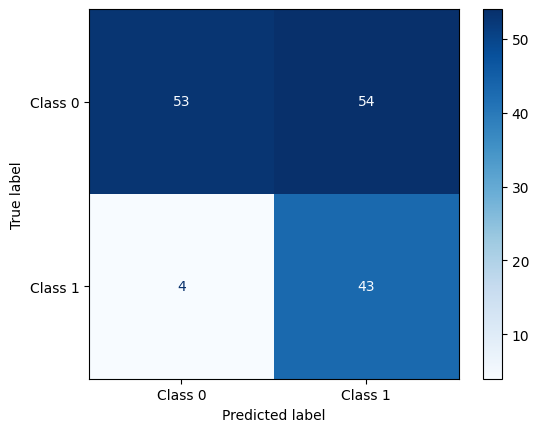

Precision: 0.44
Recall: 0.91
F1 Score: 0.60


In [ ]:
torch.save(model.state_dict(),'/home/alpaco/project/drunk_prj/models/only_model/1128LSTM05onehead.pt')

import torch
from torch.utils.data import TensorDataset,DataLoader



# 학습 데이터와 테스트 데이터를 PyTorch 텐서로 변환하여 모델 학습에 사용합니다.
test_X_tensor = torch.FloatTensor(test_x_seq)
test_y_tensor = torch.LongTensor(test_y_seq)


# PyTorch의 DataLoader를 사용해 데이터를 묶어 관리할 수 있습니다.
batch_size = 16  # 배치 사이즈는 한 번에 학습하는 데이터 개수를 뜻합니다.
test_dataset = TensorDataset(test_X_tensor, test_y_tensor)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)


###########################################################################################################################################

import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score
from torch.utils.data import DataLoader, TensorDataset
import matplotlib.pyplot as plt
from tqdm import tqdm

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

class BinaryLSTMModel(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers):
        super(BinaryLSTMModel, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, 1)  # 이진 분류이므로 출력 노드를 1개로 설정

    def forward(self, x):
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(device)
        c0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(device)

        out, _ = self.lstm(x, (h0, c0))
        out = self.fc(out[:, -1, :])  # 마지막 시퀀스 출력 사용
        return out

# 모델 초기화
input_size = X_seq.shape[2]
hidden_size = 50
num_layers = 1
model = BinaryLSTMModel(input_size, hidden_size, num_layers).to(device)


loaded_model = BinaryLSTMModel(X_seq.shape[2],50,1)
loaded_model.load_state_dict(torch.load('/home/alpaco/project/jsw_model/90frame000_LSTM.pt'))
loaded_model.to(device)
loaded_model.eval()


import torch
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt

correct = 0
total = 0
all_preds = []
all_labels = []

with torch.no_grad():
    for inputs, labels in test_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        
        # 모델 예측
        outputs = loaded_model(inputs)
        preds = torch.sigmoid(outputs).cpu().numpy() > 0.5  # 이진 분류로 변환
        
        # 예측값과 실제값 저장
        all_preds.extend(preds.astype(int).squeeze())
        all_labels.extend(labels.cpu().numpy().astype(int).squeeze())
        
        # 정확도 계산
        correct += np.sum(preds.astype(int).squeeze() == labels.cpu().numpy())

        total += labels.size(0)

# 정확도 계산
accuracy = 100 * correct / total

print(f'Accuracy of the model on test data: {accuracy:.2f}%')

# 혼돈 행렬 계산
cm = confusion_matrix(all_labels, all_preds)

# 혼돈 행렬 출력
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Class 0', 'Class 1'])
disp.plot(cmap=plt.cm.Blues)
plt.show()

# Precision, Recall, F1-Score 계산
precision = precision_score(all_labels, all_preds)
recall = recall_score(all_labels, all_preds)
f1 = f1_score(all_labels, all_preds)

print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')


# Bert

In [34]:
import pandas as pd
import os
from sklearn.preprocessing import StandardScaler
Combined = pd.read_csv("/home/alpaco/project/drunk_prj/data/3_frame_data/final_combined.csv")
Combined.drop('Unnamed: 0',axis=1,inplace=True)
columns_to_convert = Combined.columns.difference(['FILENAME','label'])

# float으로 변환
Combined[columns_to_convert] = Combined[columns_to_convert].astype(float)
#스케일링 진행 후



coordinate_cols = [f'x{i}' for i in range(1, 18)] + [f'y{i}' for i in range(1, 18)]
X = Combined[coordinate_cols].values  # 26개의 좌표 피처

scaler_X = StandardScaler()
X_normalized = scaler_X.fit_transform(X)
#y_normalized = scaler_y.fit_transform(y.reshape(-1, 1)).flatten()


Combined[coordinate_cols] = X_normalized

Combined

,frame,x1,y1,x2,y2,x3,y3,x4,y4,x5,...,y14,x15,y15,x16,y16,x17,y17,label,y,FILENAME
0,6.0,1.279592,0.729758,2.823165,0.196155,-0.533452,-0.639122,3.007860,0.165098,-0.568466,...,0.332505,0.968596,0.720503,2.111399,0.385364,0.954696,0.795424,1.0,0.0,C_32_8_smp_su_09-11_11-43-00_b_for_DF2_label1
1,7.0,-0.639187,-0.709313,-0.673755,-0.568739,-0.533452,-0.639122,2.764943,0.114162,-0.568466,...,0.184493,0.939757,0.589061,1.686628,0.236471,0.948244,0.753156,1.0,0.0,C_32_8_smp_su_09-11_11-43-00_b_for_DF2_label1
2,8.0,-0.639187,-0.709313,2.382737,0.087040,-0.533452,-0.639122,2.545061,0.052388,-0.568466,...,0.107269,0.822261,0.454374,1.653000,0.184304,0.868669,0.590584,1.0,0.0,C_32_8_smp_su_09-11_11-43-00_b_for_DF2_label1
3,9.0,-0.639187,-0.709313,-0.673755,-0.568739,-0.533452,-0.639122,2.364967,-0.000716,-0.568466,...,0.086891,0.664175,0.279118,1.653000,0.176696,0.632096,0.361357,1.0,0.0,C_32_8_smp_su_09-11_11-43-00_b_for_DF2_label1
4,10.0,-0.639187,-0.709313,-0.673755,-0.568739,-0.533452,-0.639122,2.201626,-0.058155,-0.568466,...,0.015030,0.611836,0.254777,1.502560,0.082144,0.598760,0.348352,1.0,0.0,C_32_8_smp_su_09-11_11-43-00_b_for_DF2_label1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78419,95.0,2.203074,1.454354,1.273510,-0.568739,-0.533452,-0.639122,-0.629613,2.133193,2.538005,...,1.925241,-0.820546,1.186230,-0.932796,1.942762,1.854750,1.188848,ID: tensor(602.),1.0,278-3_cam01_drunken03_place03_night_summer_411...
78420,96.0,2.201952,1.450306,1.269432,-0.568739,-0.533452,-0.639122,-0.629613,2.138612,2.536776,...,1.925241,-0.820546,1.186230,-0.932796,1.941675,1.855825,1.188848,ID: tensor(602.),1.0,278-3_cam01_drunken03_place03_night_summer_411...
78421,97.0,2.197464,1.442210,1.263315,-0.568739,-0.533452,-0.639122,-0.629613,2.134277,2.531860,...,1.925241,-0.820546,1.184607,-0.932796,1.940589,1.855825,1.185597,ID: tensor(602.),1.0,278-3_cam01_drunken03_place03_night_summer_411...
78422,98.0,2.198586,1.446258,1.259237,-0.568739,-0.533452,-0.639122,-0.629613,2.137528,2.533089,...,1.924168,-0.820546,1.184607,-0.932796,1.942762,1.859051,1.187223,ID: tensor(602.),1.0,278-3_cam01_drunken03_place03_night_summer_411...


In [35]:
# 6. sequence length 생성하기
import numpy as np
#Sequence Lenght 설정 후 진행 예정
def create_sequences(df, seq_length):
    xs, ys = [], []
    
    # 'FILENAME'과 'label' 기준으로 그룹화
    for _, group in df.groupby(['FILENAME', 'label']):
        # 그룹 내 'frame' 기준 정렬
        group = group.sort_values(by=['frame']).reset_index(drop=True)
        
        # frame, FILENAME, label, id, y 제외한 좌표 피처
        data_X = group.drop(columns=['frame', 'FILENAME', 'label','y'], errors='ignore').values  
        
        data_y = group['y'].values  # 이진 분류 레이블
        
        # 시퀀스 생성
        for i in range(len(data_X) - seq_length+1):
            x = data_X[i:i + seq_length]
            y = data_y[i + seq_length - 1]  # 시퀀스의 마지막 레이블 사용
            xs.append(x)
            ys.append(y)
    
    return np.array(xs), np.array(ys)

sequence_length = 90

# 시퀀스 생성
X_seq, Y_seq = create_sequences(Combined, sequence_length)

from sklearn.model_selection import train_test_split
import torch
from torch.utils.data import TensorDataset,DataLoader

# 학습 데이터와 테스트 데이터로 나누고, 라벨의 비율을 유지합니다.
train_X, valid_X, train_y, valid_y = train_test_split(X_seq, Y_seq, test_size=0.2, stratify=Y_seq, random_state=42)

# 학습 데이터를 다시 셔플하여 모델이 순서에 너무 의존하지 않도록 합니다.
train_indices = np.arange(len(train_X))
np.random.shuffle(train_indices)
train_X, train_y = train_X[train_indices], train_y[train_indices]


# 학습 데이터와 테스트 데이터를 PyTorch 텐서로 변환하여 모델 학습에 사용합니다.
train_X_tensor = torch.FloatTensor(train_X)
train_y_tensor = torch.LongTensor(train_y)
valid_X_tensor = torch.FloatTensor(valid_X)
valid_y_tensor = torch.LongTensor(valid_y)


# 텐서 타입 확인
train_X_tensor = train_X_tensor.float()
valid_X_tensor = valid_X_tensor.float()

train_y_tensor = train_y_tensor.float()
valid_y_tensor = valid_y_tensor.float()

# PyTorch의 DataLoader를 사용해 데이터를 묶어 관리할 수 있습니다.
batch_size = 16  # 배치 사이즈는 한 번에 학습하는 데이터 개수를 뜻합니다.
train_dataset = TensorDataset(train_X_tensor, train_y_tensor)
valid_dataset = TensorDataset(valid_X_tensor, valid_y_tensor)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
valid_loader = DataLoader(valid_dataset, batch_size=batch_size, shuffle=False)

In [18]:
print(X_seq.shape)

(308, 90, 34)


In [24]:
import torch
import torch.nn as nn
from transformers import BertModel, BertConfig
device = torch.device("cuda:1" if torch.cuda.is_available() else "cpu")

class BertForKeypointClassification(nn.Module):
    def __init__(self, input_size, sequence_length, hidden_size=256, num_classes=1):
        super(BertForKeypointClassification, self).__init__()
        # BERT 설정
        config = BertConfig(
            hidden_size=hidden_size,
            num_attention_heads=8,
            num_hidden_layers=4,
            intermediate_size=hidden_size * 4,
            max_position_embeddings=sequence_length,
            vocab_size=1  # 가상의 토큰 ID
        )
        self.bert = BertModel(config)
        
        # 입력 차원 조정
        self.input_proj = nn.Linear(input_size, hidden_size)
        
        # 분류기
        self.classifier = nn.Sequential(
            nn.Linear(hidden_size, 128),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(128, num_classes),
            nn.Sigmoid()  # 이진 분류용
        )

    def forward(self, x):
        # x: (batch_size, seq_len, input_size)
        x = self.input_proj(x)  # (batch_size, seq_len, hidden_size)
        bert_output = self.bert(inputs_embeds=x)  # BERT의 출력
        pooled_output = bert_output.pooler_output  # [CLS] 토큰의 출력
        return self.classifier(pooled_output)  # 분류 결과


In [25]:
import torch
from tqdm import tqdm

def train_model(model, train_loader, criterion, optimizer, device, epochs):
    model.to(device)
    model.train()

    for epoch in range(epochs):
        epoch_loss = 0.0
        correct = 0
        total = 0

        for sequences, labels in tqdm(train_loader, desc=f"Epoch {epoch + 1}/{epochs}"):
            sequences, labels = sequences.to(device), labels.to(device)

            # 초기화
            optimizer.zero_grad()
            
            # 모델 예측 및 손실 계산
            outputs = model(sequences).squeeze()  # (batch_size,)
            loss = criterion(outputs, labels)
            
            # 역전파 및 최적화
            loss.backward()
            optimizer.step()

            # 손실 및 정확도 업데이트
            epoch_loss += loss.item()
            predictions = (outputs > 0.5).float()
            correct += (predictions == labels).sum().item()
            total += labels.size(0)

        accuracy = correct / total
        print(f"Epoch {epoch + 1}/{epochs}, Loss: {epoch_loss:.4f}, Accuracy: {accuracy:.4f}")
    print("Training Complete.")


In [ ]:
# 모델 초기화
input_size = 34  # x1~x17, y1~y17
sequence_length = 90
hidden_size = 256
num_classes = 1  # 이진 분류
model = BertForKeypointClassification(input_size, sequence_length, hidden_size, num_classes)

# 손실 함수와 옵티마이저 설정
criterion = nn.BCELoss()
optimizer = torch.optim.NAdam(model.parameters(), lr=0.001)

# 학습 실행
device = torch.device("cuda:2" if torch.cuda.is_available() else "cpu")
epochs = 50
train_model(model, train_loader, criterion, optimizer, device, epochs)


Epoch 1/50: 100%|██████████| 165/165 [00:02<00:00, 58.93it/s]


Epoch 1/50, Loss: 2.5155, Accuracy: 0.9939


Epoch 2/50: 100%|██████████| 165/165 [00:02<00:00, 62.53it/s]


Epoch 2/50, Loss: 0.0081, Accuracy: 1.0000


Epoch 3/50: 100%|██████████| 165/165 [00:02<00:00, 78.21it/s]


Epoch 3/50, Loss: 0.0031, Accuracy: 1.0000


Epoch 4/50: 100%|██████████| 165/165 [00:02<00:00, 70.92it/s]


Epoch 4/50, Loss: 0.0017, Accuracy: 1.0000


Epoch 5/50: 100%|██████████| 165/165 [00:02<00:00, 70.11it/s]


Epoch 5/50, Loss: 0.0012, Accuracy: 1.0000


Epoch 6/50: 100%|██████████| 165/165 [00:02<00:00, 71.54it/s]


Epoch 6/50, Loss: 0.0008, Accuracy: 1.0000


Epoch 7/50: 100%|██████████| 165/165 [00:02<00:00, 73.69it/s]


Epoch 7/50, Loss: 0.0006, Accuracy: 1.0000


Epoch 8/50: 100%|██████████| 165/165 [00:02<00:00, 74.99it/s]


Epoch 8/50, Loss: 0.0004, Accuracy: 1.0000


Epoch 9/50: 100%|██████████| 165/165 [00:02<00:00, 71.25it/s]


Epoch 9/50, Loss: 0.0003, Accuracy: 1.0000


Epoch 10/50: 100%|██████████| 165/165 [00:02<00:00, 66.98it/s]


Epoch 10/50, Loss: 0.0003, Accuracy: 1.0000


Epoch 11/50: 100%|██████████| 165/165 [00:02<00:00, 64.80it/s]


Epoch 11/50, Loss: 0.0002, Accuracy: 1.0000


Epoch 12/50: 100%|██████████| 165/165 [00:02<00:00, 74.51it/s]


Epoch 12/50, Loss: 0.0002, Accuracy: 1.0000


Epoch 13/50: 100%|██████████| 165/165 [00:02<00:00, 72.25it/s]


Epoch 13/50, Loss: 0.0001, Accuracy: 1.0000


Epoch 14/50: 100%|██████████| 165/165 [00:02<00:00, 74.44it/s]


Epoch 14/50, Loss: 0.0001, Accuracy: 1.0000


Epoch 15/50: 100%|██████████| 165/165 [00:02<00:00, 74.13it/s]


Epoch 15/50, Loss: 0.0001, Accuracy: 1.0000


Epoch 16/50: 100%|██████████| 165/165 [00:02<00:00, 74.03it/s]


Epoch 16/50, Loss: 0.0001, Accuracy: 1.0000


Epoch 17/50: 100%|██████████| 165/165 [00:02<00:00, 69.92it/s]


Epoch 17/50, Loss: 0.0001, Accuracy: 1.0000


Epoch 18/50: 100%|██████████| 165/165 [00:02<00:00, 70.51it/s]


Epoch 18/50, Loss: 0.0001, Accuracy: 1.0000


Epoch 19/50: 100%|██████████| 165/165 [00:02<00:00, 68.94it/s]


Epoch 19/50, Loss: 0.0001, Accuracy: 1.0000


Epoch 20/50: 100%|██████████| 165/165 [00:02<00:00, 58.60it/s]


Epoch 20/50, Loss: 0.0001, Accuracy: 1.0000


Epoch 21/50: 100%|██████████| 165/165 [00:02<00:00, 60.73it/s]


Epoch 21/50, Loss: 0.0001, Accuracy: 1.0000


Epoch 22/50: 100%|██████████| 165/165 [00:02<00:00, 70.80it/s]


Epoch 22/50, Loss: 0.0001, Accuracy: 1.0000


Epoch 23/50: 100%|██████████| 165/165 [00:02<00:00, 69.34it/s]


Epoch 23/50, Loss: 0.0000, Accuracy: 1.0000


Epoch 24/50: 100%|██████████| 165/165 [00:02<00:00, 63.19it/s]


Epoch 24/50, Loss: 0.0000, Accuracy: 1.0000


Epoch 25/50: 100%|██████████| 165/165 [00:02<00:00, 76.91it/s]


Epoch 25/50, Loss: 0.0000, Accuracy: 1.0000


Epoch 26/50: 100%|██████████| 165/165 [00:02<00:00, 73.22it/s]


Epoch 26/50, Loss: 0.0000, Accuracy: 1.0000


Epoch 27/50: 100%|██████████| 165/165 [00:02<00:00, 78.77it/s]


Epoch 27/50, Loss: 0.0000, Accuracy: 1.0000


Epoch 28/50: 100%|██████████| 165/165 [00:02<00:00, 74.73it/s]


Epoch 28/50, Loss: 0.0000, Accuracy: 1.0000


Epoch 29/50: 100%|██████████| 165/165 [00:02<00:00, 73.59it/s]


Epoch 29/50, Loss: 0.0000, Accuracy: 1.0000


Epoch 30/50: 100%|██████████| 165/165 [00:02<00:00, 75.76it/s]


Epoch 30/50, Loss: 0.0000, Accuracy: 1.0000


Epoch 31/50: 100%|██████████| 165/165 [00:02<00:00, 73.61it/s]


Epoch 31/50, Loss: 0.0000, Accuracy: 1.0000


Epoch 32/50: 100%|██████████| 165/165 [00:02<00:00, 78.10it/s]


Epoch 32/50, Loss: 0.0000, Accuracy: 1.0000


Epoch 33/50: 100%|██████████| 165/165 [00:02<00:00, 60.82it/s]


Epoch 33/50, Loss: 0.0000, Accuracy: 1.0000


Epoch 34/50: 100%|██████████| 165/165 [00:02<00:00, 62.20it/s]


Epoch 34/50, Loss: 0.0000, Accuracy: 1.0000


Epoch 35/50: 100%|██████████| 165/165 [00:02<00:00, 72.94it/s]


Epoch 35/50, Loss: 0.0000, Accuracy: 1.0000


Epoch 36/50: 100%|██████████| 165/165 [00:02<00:00, 78.10it/s]


Epoch 36/50, Loss: 0.0000, Accuracy: 1.0000


Epoch 37/50: 100%|██████████| 165/165 [00:02<00:00, 76.45it/s]


Epoch 37/50, Loss: 0.0000, Accuracy: 1.0000


Epoch 38/50: 100%|██████████| 165/165 [00:02<00:00, 72.76it/s]


Epoch 38/50, Loss: 0.0000, Accuracy: 1.0000


Epoch 39/50: 100%|██████████| 165/165 [00:02<00:00, 73.91it/s]


Epoch 39/50, Loss: 0.0000, Accuracy: 1.0000


Epoch 40/50: 100%|██████████| 165/165 [00:02<00:00, 77.64it/s]


Epoch 40/50, Loss: 0.0000, Accuracy: 1.0000


Epoch 41/50: 100%|██████████| 165/165 [00:02<00:00, 79.17it/s]


Epoch 41/50, Loss: 0.0000, Accuracy: 1.0000


Epoch 42/50: 100%|██████████| 165/165 [00:02<00:00, 75.52it/s]


Epoch 42/50, Loss: 0.0000, Accuracy: 1.0000


Epoch 43/50: 100%|██████████| 165/165 [00:02<00:00, 71.77it/s]


Epoch 43/50, Loss: 0.0000, Accuracy: 1.0000


Epoch 44/50: 100%|██████████| 165/165 [00:02<00:00, 76.05it/s]


Epoch 44/50, Loss: 0.0000, Accuracy: 1.0000


Epoch 45/50: 100%|██████████| 165/165 [00:02<00:00, 74.63it/s]


Epoch 45/50, Loss: 0.0000, Accuracy: 1.0000


Epoch 46/50: 100%|██████████| 165/165 [00:02<00:00, 74.26it/s]


Epoch 46/50, Loss: 0.0000, Accuracy: 1.0000


Epoch 47/50: 100%|██████████| 165/165 [00:02<00:00, 72.43it/s]


Epoch 47/50, Loss: 0.0000, Accuracy: 1.0000


Epoch 48/50: 100%|██████████| 165/165 [00:02<00:00, 70.30it/s]


Epoch 48/50, Loss: 0.0000, Accuracy: 1.0000


Epoch 49/50: 100%|██████████| 165/165 [00:02<00:00, 75.98it/s]


Epoch 49/50, Loss: 0.0000, Accuracy: 1.0000


Epoch 50/50: 100%|██████████| 165/165 [00:02<00:00, 75.84it/s]

Epoch 50/50, Loss: 0.0000, Accuracy: 1.0000
Training Complete.


In [28]:
torch.save(model.state_dict(),'/home/alpaco/project/drunk_prj/models/only_model/1203_BertModel.pt')


Accuracy of the model on test data: 75.32%


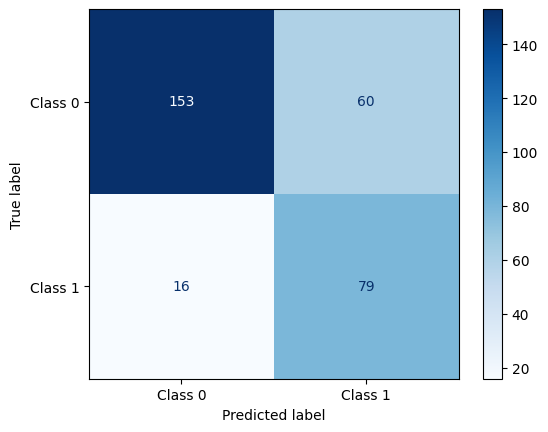

Precision: 0.57
Recall: 0.83
F1 Score: 0.68


In [ ]:
test_data = pd.read_csv('/home/alpaco/project/drunk_prj/data/3_frame_data/final_test.csv')
test_data.drop('Unnamed: 0',axis=1,inplace=True)
test_data

# 1. 크로마키 영상
import os

#스케일링 진행 후
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler



coordinate_cols = [f'x{i}' for i in range(1, 18)] + [f'y{i}' for i in range(1, 18)]
X = test_data[coordinate_cols].values  # 34개의 좌표 피처

scaler_X = StandardScaler()
X_normalized = scaler_X.fit_transform(X)
#y_normalized = scaler_y.fit_transform(y.reshape(-1, 1)).flatten()


test_data[coordinate_cols] = X_normalized


columns_to_convert = test_data.columns.difference(['FILENAME','label'])

# float으로 변환
test_data[columns_to_convert] = test_data[columns_to_convert].astype(float)



# 6. sequence length 생성하기
import numpy as np
#Sequence Lenght 설정 후 진행 예정
def create_sequences(df, seq_length):
    xs, ys = [], []
    
    # 'FILENAME'과 'label' 기준으로 그룹화
    for _, group in df.groupby(['FILENAME', 'label']):
        # 그룹 내 'frame' 기준 정렬
        group = group.sort_values(by=['frame']).reset_index(drop=True)
        
        # frame, FILENAME, label, id, y 제외한 좌표 피처
        data_X = group.drop(columns=['frame', 'FILENAME', 'label','y'], errors='ignore').values  
        
        data_y = group['y'].values  # 이진 분류 레이블
        
        # 시퀀스 생성
        for i in range(len(data_X) - seq_length+1):
            x = data_X[i:i + seq_length]
            y = data_y[i + seq_length - 1]  # 시퀀스의 마지막 레이블 사용
            xs.append(x)
            ys.append(y)
    
    return np.array(xs), np.array(ys)

sequence_length = 90

test_x_seq,test_y_seq = create_sequences(test_data,sequence_length)

import torch
from torch.utils.data import TensorDataset,DataLoader



# 학습 데이터와 테스트 데이터를 PyTorch 텐서로 변환하여 모델 학습에 사용합니다.
test_X_tensor = torch.FloatTensor(test_x_seq)
test_y_tensor = torch.LongTensor(test_y_seq)

# 텐서 타입 확인
train_X_tensor = train_X_tensor.float()
valid_X_tensor = valid_X_tensor.float()

train_y_tensor = train_y_tensor.float()
valid_y_tensor = valid_y_tensor.float()


# PyTorch의 DataLoader를 사용해 데이터를 묶어 관리할 수 있습니다.
batch_size = 16  # 배치 사이즈는 한 번에 학습하는 데이터 개수를 뜻합니다.
test_dataset = TensorDataset(test_X_tensor, test_y_tensor)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)


###########################################################################################################################################

import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score
from torch.utils.data import DataLoader, TensorDataset
import matplotlib.pyplot as plt
from tqdm import tqdm

device = torch.device("cuda:2" if torch.cuda.is_available() else "cpu")


# 모델 초기화
# 모델 초기화
input_size = 34  # x1~x17, y1~y17
sequence_length = 90
hidden_size = 256
num_classes = 1  # 이진 분류
loaded_model = BertForKeypointClassification(input_size, sequence_length, hidden_size, num_classes)
loaded_model.load_state_dict(torch.load('/home/alpaco/project/drunk_prj/models/only_model/1203_BertModel.pt'))

loaded_model.eval()


import torch
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt

correct = 0
total = 0
all_preds = []
all_labels = []

with torch.no_grad():
    for inputs, labels in test_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        
        # 모델 예측
        outputs = model(inputs)
        preds = torch.sigmoid(outputs).cpu().numpy() > 0.5  # 이진 분류로 변환
        
        # 예측값과 실제값 저장
        all_preds.extend(preds.astype(int).squeeze())
        all_labels.extend(labels.cpu().numpy().astype(int).squeeze())
        
        # 정확도 계산
        correct += np.sum(preds.astype(int).squeeze() == labels.cpu().numpy())

        total += labels.size(0)

# 정확도 계산
accuracy = 100 * correct / total

print(f'Accuracy of the model on test data: {accuracy:.2f}%')

# 혼돈 행렬 계산
cm = confusion_matrix(all_labels, all_preds)

# 혼돈 행렬 출력
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Class 0', 'Class 1'])
disp.plot(cmap=plt.cm.Blues)
plt.show()

# Precision, Recall, F1-Score 계산
precision = precision_score(all_labels, all_preds)
recall = recall_score(all_labels, all_preds)
f1 = f1_score(all_labels, all_preds)

print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')


#  Transformer

In [ ]:
import torch
from torch.utils.data import DataLoader
from transformers import AdamW, RobertaConfig, RobertaModel


# Transformer 모델을 위한 설정
class TransformerModel(torch.nn.Module):
    def __init__(self, input_size, hidden_size, num_classes, num_heads=2, num_layers=4, dropout=0.1):
        super(TransformerModel, self).__init__()
        
        # Multi-Head Attention 레이어
        self.attention = torch.nn.MultiheadAttention(embed_dim=input_size, num_heads=num_heads, dropout=dropout)
        
        # Transformer Encoder
        self.transformer = torch.nn.TransformerEncoder(
            torch.nn.TransformerEncoderLayer(d_model=input_size, nhead=num_heads, dim_feedforward=hidden_size, dropout=dropout), 
            num_layers=num_layers
        )
        
        # Fully connected layers
        self.fc = torch.nn.Sequential(
            torch.nn.Linear(input_size, hidden_size),
            torch.nn.ReLU(),
            torch.nn.Dropout(dropout),
            torch.nn.Linear(hidden_size, num_classes)
        )

    def forward(self, x):
        # 시퀀스 길이, 배치 크기, 특성 차원에 맞게 변환
        x = x.transpose(0, 1)  # Transformer는 (seq_len, batch_size, features)의 형태를 기대함
        
        # Attention 통과
        attn_output, _ = self.attention(x, x, x)
        
        # Transformer Encoder 통과
        transformer_output = self.transformer(attn_output)
        
        # 마지막 시퀀스 출력을 사용 (기본적으로 클래스 레이블 예측)
        output = transformer_output[-1, :, :]
        
        # Fully connected layers 통과
        output = self.fc(output)
        
        return output

# 모델 인스턴스 생성
input_size = 34 # 입력 특징의 크기
hidden_size = 50
num_classes = 1  # 이진 분류
model = TransformerModel(input_size, hidden_size, num_classes)

# 손실 함수 및 옵티마이저
criterion = torch.nn.BCEWithLogitsLoss()
optimizer = torch.optim.NAdam(model.parameters(), lr=0.001)

# 훈련 루프
epochs = 50
for epoch in range(epochs):
    model.train()
    for batch_X, batch_y in train_loader:
        optimizer.zero_grad()
        
        # 모델 예측
        output = model(batch_X)
        
        # 손실 계산
        loss = criterion(output.squeeze(), batch_y.float())
        
        # 역전파
        loss.backward()
        optimizer.step()

    print(f"Epoch {epoch+1}, Loss: {loss.item()}")




/home/alpaco/anaconda3/envs/test/lib/python3.8/site-packages/torch/nn/modules/transformer.py:307: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(f"enable_nested_tensor is True, but self.use_nested_tensor is False because {why_not_sparsity_fast_path}")


Epoch 1, Loss: 0.0028693191707134247
Epoch 2, Loss: 0.0006203787634149194
Epoch 3, Loss: 0.00019176640489604324


KeyboardInterrupt: 

In [ ]:
torch.save(model.state_dict(),'/home/alpaco/project/drunk_prj/models/only_model/1128LSTM05onehead.pt')

Accuracy of the model on test data: 80.52%


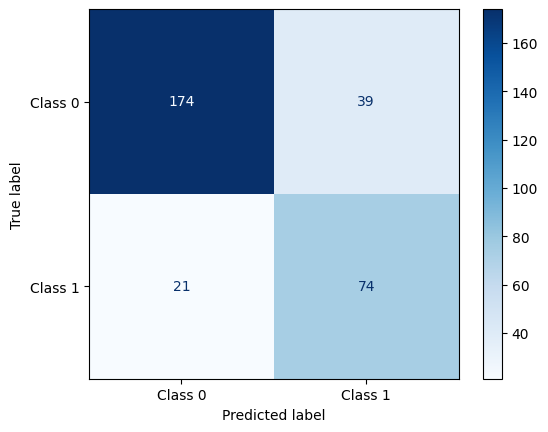

Precision: 0.65
Recall: 0.78
F1 Score: 0.71


In [33]:

import torch
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt

correct = 0
total = 0
all_preds = []
all_labels = []

with torch.no_grad():
    for inputs, labels in test_loader:
        # inputs, labels = inputs.to(device), labels.to(device)
        
        # 모델 예측
        outputs = model(inputs)
        preds = torch.sigmoid(outputs).cpu().numpy() > 0.5  # 이진 분류로 변환
        
        # 예측값과 실제값 저장
        all_preds.extend(preds.astype(int).squeeze())
        all_labels.extend(labels.cpu().numpy().astype(int).squeeze())
        
        # 정확도 계산
        correct += np.sum(preds.astype(int).squeeze() == labels.cpu().numpy())

        total += labels.size(0)

# 정확도 계산
accuracy = 100 * correct / total

print(f'Accuracy of the model on test data: {accuracy:.2f}%')

# 혼돈 행렬 계산
cm = confusion_matrix(all_labels, all_preds)

# 혼돈 행렬 출력
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Class 0', 'Class 1'])
disp.plot(cmap=plt.cm.Blues)
plt.show()

# Precision, Recall, F1-Score 계산
precision = precision_score(all_labels, all_preds)
recall = recall_score(all_labels, all_preds)
f1 = f1_score(all_labels, all_preds)

print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')

In [2]:
import pandas as pd
test= pd.read_csv('/home/alpaco/project/drunk_prj/data/3_frame_data/final_3frame_test.csv')

test.drop('Unnamed: 0',axis=1,inplace=True)

# y 열의 값이 0과 1로만 이루어졌다고 가정
if 'y' in test.columns:
    value_counts = test['y'].value_counts()
    print("y 열 값의 개수:")
    print(value_counts)

    # 개별 값 출력
    count_0 = value_counts.get(0, 0)  # 0의 개수
    count_1 = value_counts.get(1, 0)  # 1의 개수
    print(f"0의 개수: {count_0}")
    print(f"1의 개수: {count_1}")
else:
    print("DataFrame에 'y' 열이 없습니다.")


y 열 값의 개수:
0    15907
1     8593
Name: y, dtype: int64
0의 개수: 15907
1의 개수: 8593


In [51]:
test= pd.read_csv('/home/alpaco/project/drunk_prj/data/3_frame_data/final_3frame_test.csv')

test.drop('Unnamed: 0',axis=1,inplace=True)

test



import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler



coordinate_cols = [f'x{i}' for i in range(1, 18)] + [f'y{i}' for i in range(1, 18)]
X = test[coordinate_cols].values  # 34개의 좌표 피처

scaler_X = StandardScaler()
X_normalized = scaler_X.fit_transform(X)
#y_normalized = scaler_y.fit_transform(y.reshape(-1, 1)).flatten()


test[coordinate_cols] = X_normalized


columns_to_convert = test.columns.difference(['FILENAME','label'])

# float으로 변환
test[columns_to_convert] = test[columns_to_convert].astype(float)

In [53]:
# 6. sequence length 생성하기
import numpy as np
#Sequence Lenght 설정 후 진행 예정
def create_sequences(df, seq_length):
    xs, ys = [], []
    
    # 'FILENAME'과 'label' 기준으로 그룹화
    for _, group in df.groupby(['FILENAME', 'label']):
        # 그룹 내 'frame' 기준 정렬
        group = group.sort_values(by=['frame']).reset_index(drop=True)
        
        # frame, FILENAME, label, id, y 제외한 좌표 피처
        data_X = group.drop(columns=['frame', 'FILENAME', 'label','y'], errors='ignore').values  
        
        data_y = group['y'].values  # 이진 분류 레이블
        
        # 시퀀스 생성
        for i in range(len(data_X) - seq_length+1):
            x = data_X[i:i + seq_length]
            y = data_y[i + seq_length - 1]  # 시퀀스의 마지막 레이블 사용
            xs.append(x)
            ys.append(y)
    
    return np.array(xs), np.array(ys)

sequence_length = 90

# 시퀀스 생성
X_seq, Y_seq = create_sequences(test, sequence_length)

from sklearn.model_selection import train_test_split
import torch
from torch.utils.data import TensorDataset,DataLoader




# 학습 데이터와 테스트 데이터를 PyTorch 텐서로 변환하여 모델 학습에 사용합니다.
test_X_tensor = torch.FloatTensor(X_seq)
test_y_tensor = torch.LongTensor(Y_seq)


# 텐서 타입 확인
test_X_tensor = test_X_tensor.float()
test_y_tensor = test_y_tensor.float()


# PyTorch의 DataLoader를 사용해 데이터를 묶어 관리할 수 있습니다.
batch_size = 16  # 배치 사이즈는 한 번에 학습하는 데이터 개수를 뜻합니다.
test_dataset = TensorDataset(test_X_tensor, test_y_tensor)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=True)

/tmp/ipykernel_639417/874574802.py:60: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  loaded_model.load_state_dict(torch.load('/home/alpaco/project/drunk_prj/models/only_mode

Accuracy of the model on test data: 54.62%


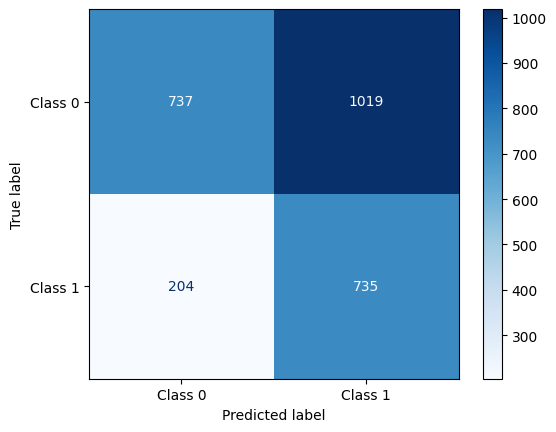

Precision: 0.42
Recall: 0.78
F1 Score: 0.55


In [54]:

import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score
from torch.utils.data import DataLoader, TensorDataset
import matplotlib.pyplot as plt
from tqdm import tqdm

device = torch.device("cuda:2" if torch.cuda.is_available() else "cpu")

import torch
import torch.nn as nn
from transformers import BertModel, BertConfig

class BertForKeypointClassification(nn.Module):
    def __init__(self, input_size, sequence_length, hidden_size=256, num_classes=1):
        super(BertForKeypointClassification, self).__init__()
        # BERT 설정
        config = BertConfig(
            hidden_size=hidden_size,
            num_attention_heads=8,
            num_hidden_layers=4,
            intermediate_size=hidden_size * 4,
            max_position_embeddings=sequence_length,
            vocab_size=1  # 가상의 토큰 ID
        )
        self.bert = BertModel(config)
        
        # 입력 차원 조정
        self.input_proj = nn.Linear(input_size, hidden_size)
        
        # 분류기
        self.classifier = nn.Sequential(
            nn.Linear(hidden_size, 128),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(128, num_classes),
            nn.Sigmoid()  # 이진 분류용
        )

    def forward(self, x):
        # x: (batch_size, seq_len, input_size)
        x = self.input_proj(x)  # (batch_size, seq_len, hidden_size)
        bert_output = self.bert(inputs_embeds=x)  # BERT의 출력
        pooled_output = bert_output.pooler_output  # [CLS] 토큰의 출력
        return self.classifier(pooled_output)  # 분류 결과



# 모델 초기화
# 모델 초기화
input_size = 34  # x1~x17, y1~y17
sequence_length = 90
hidden_size = 256
num_classes = 1  # 이진 분류
loaded_model = BertForKeypointClassification(input_size, sequence_length, hidden_size, num_classes)
loaded_model.load_state_dict(torch.load('/home/alpaco/project/drunk_prj/models/only_model/1203_BertModel.pt'))
loaded_model.to(device)
loaded_model.eval()


import torch
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt

correct = 0
total = 0
all_preds = []
all_labels = []

with torch.no_grad():
    for inputs, labels in test_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        
        # 모델 예측
        outputs = loaded_model(inputs)
        preds = torch.sigmoid(outputs).cpu().numpy() > 0.5  # 이진 분류로 변환
        
        # 예측값과 실제값 저장
        all_preds.extend(preds.astype(int).squeeze())
        all_labels.extend(labels.cpu().numpy().astype(int).squeeze())
        
        # 정확도 계산
        correct += np.sum(preds.astype(int).squeeze() == labels.cpu().numpy())

        total += labels.size(0)

# 정확도 계산
accuracy = 100 * correct / total

print(f'Accuracy of the model on test data: {accuracy:.2f}%')

# 혼돈 행렬 계산
cm = confusion_matrix(all_labels, all_preds)

# 혼돈 행렬 출력
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Class 0', 'Class 1'])
disp.plot(cmap=plt.cm.Blues)
plt.show()

# Precision, Recall, F1-Score 계산
precision = precision_score(all_labels, all_preds)
recall = recall_score(all_labels, all_preds)
f1 = f1_score(all_labels, all_preds)

print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')


In [55]:
import torch
from torch.utils.data import DataLoader
from transformers import AdamW, RobertaConfig, RobertaModel


# Transformer 모델을 위한 설정
class TransformerModel(torch.nn.Module):
    def __init__(self, input_size, hidden_size, num_classes, num_heads=2, num_layers=4, dropout=0.1):
        super(TransformerModel, self).__init__()
        
        # Multi-Head Attention 레이어
        self.attention = torch.nn.MultiheadAttention(embed_dim=input_size, num_heads=num_heads, dropout=dropout)
        
        # Transformer Encoder
        self.transformer = torch.nn.TransformerEncoder(
            torch.nn.TransformerEncoderLayer(d_model=input_size, nhead=num_heads, dim_feedforward=hidden_size, dropout=dropout), 
            num_layers=num_layers
        )
        
        # Fully connected layers
        self.fc = torch.nn.Sequential(
            torch.nn.Linear(input_size, hidden_size),
            torch.nn.ReLU(),
            torch.nn.Dropout(dropout),
            torch.nn.Linear(hidden_size, num_classes)
        )

    def forward(self, x):
        # 시퀀스 길이, 배치 크기, 특성 차원에 맞게 변환
        x = x.transpose(0, 1)  # Transformer는 (seq_len, batch_size, features)의 형태를 기대함
        
        # Attention 통과
        attn_output, _ = self.attention(x, x, x)
        
        # Transformer Encoder 통과
        transformer_output = self.transformer(attn_output)
        
        # 마지막 시퀀스 출력을 사용 (기본적으로 클래스 레이블 예측)
        output = transformer_output[-1, :, :]
        
        # Fully connected layers 통과
        output = self.fc(output)
        
        return output

# 모델 인스턴스 생성
input_size = 34  # 입력 특징의 크기
hidden_size = 50
num_classes = 1  # 이진 분류
loaded_model = TransformerModel(input_size, hidden_size, num_classes)
loaded_model.load_state_dict(torch.load('/home/alpaco/project/drunk_prj/models/only_model/1203_Transformer.pt'))
loaded_model.to(device)
loaded_model.eval()


/home/alpaco/anaconda3/envs/test/lib/python3.8/site-packages/torch/nn/modules/transformer.py:307: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(f"enable_nested_tensor is True, but self.use_nested_tensor is False because {why_not_sparsity_fast_path}")
/tmp/ipykernel_639417/39978865.py:51: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded

TransformerModel(
  (attention): MultiheadAttention(
    (out_proj): NonDynamicallyQuantizableLinear(in_features=34, out_features=34, bias=True)
  )
  (transformer): TransformerEncoder(
    (layers): ModuleList(
      (0-3): 4 x TransformerEncoderLayer(
        (self_attn): MultiheadAttention(
          (out_proj): NonDynamicallyQuantizableLinear(in_features=34, out_features=34, bias=True)
        )
        (linear1): Linear(in_features=34, out_features=50, bias=True)
        (dropout): Dropout(p=0.1, inplace=False)
        (linear2): Linear(in_features=50, out_features=34, bias=True)
        (norm1): LayerNorm((34,), eps=1e-05, elementwise_affine=True)
        (norm2): LayerNorm((34,), eps=1e-05, elementwise_affine=True)
        (dropout1): Dropout(p=0.1, inplace=False)
        (dropout2): Dropout(p=0.1, inplace=False)
      )
    )
  )
  (fc): Sequential(
    (0): Linear(in_features=34, out_features=50, bias=True)
    (1): ReLU()
    (2): Dropout(p=0.1, inplace=False)
    (3): Linear

Accuracy of the model on test data: 78.59%


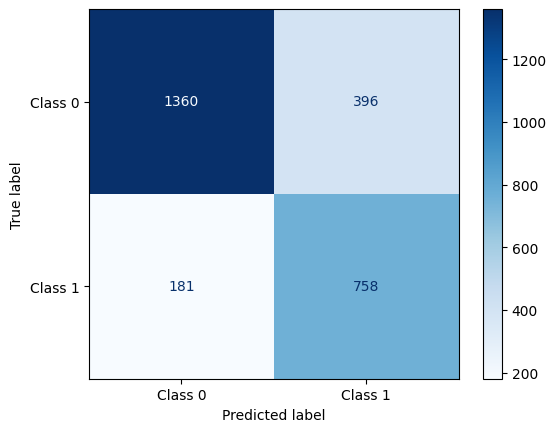

Precision: 0.66
Recall: 0.81
F1 Score: 0.72


In [56]:

import torch
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt

correct = 0
total = 0
all_preds = []
all_labels = []

with torch.no_grad():
    for inputs, labels in test_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        
        # 모델 예측
        outputs = loaded_model(inputs)
        preds = torch.sigmoid(outputs).cpu().numpy() > 0.5  # 이진 분류로 변환
        
        # 예측값과 실제값 저장
        all_preds.extend(preds.astype(int).squeeze())
        all_labels.extend(labels.cpu().numpy().astype(int).squeeze())
        
        # 정확도 계산
        correct += np.sum(preds.astype(int).squeeze() == labels.cpu().numpy())

        total += labels.size(0)

# 정확도 계산
accuracy = 100 * correct / total

print(f'Accuracy of the model on test data: {accuracy:.2f}%')

# 혼돈 행렬 계산
cm = confusion_matrix(all_labels, all_preds)

# 혼돈 행렬 출력
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Class 0', 'Class 1'])
disp.plot(cmap=plt.cm.Blues)
plt.show()

# Precision, Recall, F1-Score 계산
precision = precision_score(all_labels, all_preds)
recall = recall_score(all_labels, all_preds)
f1 = f1_score(all_labels, all_preds)

print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')

In [57]:
class BinaryLSTMModel(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers):
        super(BinaryLSTMModel, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, 1)  # 이진 분류이므로 출력 노드를 1개로 설정

    def forward(self, x):
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(device)
        c0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(device)

        out, _ = self.lstm(x, (h0, c0))
        out = self.fc(out[:, -1, :])  # 마지막 시퀀스 출력 사용
        return out

# 모델 초기화
input_size = X_seq.shape[2]
hidden_size = 50
num_layers = 1
loaded_model = BinaryLSTMModel(input_size, hidden_size, num_layers).to(device)

loaded_model.load_state_dict(torch.load('/home/alpaco/project/drunk_prj/models/only_model/1128_LSTM02.pt'))
loaded_model.to(device)
loaded_model.eval()


/tmp/ipykernel_639417/2219515276.py:23: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  loaded_model.load_state_dict(torch.load('/home/alpaco/project/drunk_prj/models/only_mod

BinaryLSTMModel(
  (lstm): LSTM(34, 50, batch_first=True)
  (fc): Linear(in_features=50, out_features=1, bias=True)
)

Accuracy of the model on test data: 72.36%


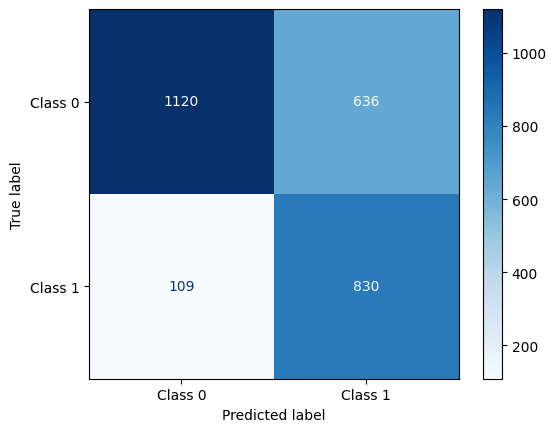

Precision: 0.57
Recall: 0.88
F1 Score: 0.69


In [58]:

import torch
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt

correct = 0
total = 0
all_preds = []
all_labels = []

with torch.no_grad():
    for inputs, labels in test_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        
        # 모델 예측
        outputs = loaded_model(inputs)
        preds = torch.sigmoid(outputs).cpu().numpy() > 0.5  # 이진 분류로 변환
        
        # 예측값과 실제값 저장
        all_preds.extend(preds.astype(int).squeeze())
        all_labels.extend(labels.cpu().numpy().astype(int).squeeze())
        
        # 정확도 계산
        correct += np.sum(preds.astype(int).squeeze() == labels.cpu().numpy())

        total += labels.size(0)

# 정확도 계산
accuracy = 100 * correct / total

print(f'Accuracy of the model on test data: {accuracy:.2f}%')

# 혼돈 행렬 계산
cm = confusion_matrix(all_labels, all_preds)

# 혼돈 행렬 출력
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Class 0', 'Class 1'])
disp.plot(cmap=plt.cm.Blues)
plt.show()

# Precision, Recall, F1-Score 계산
precision = precision_score(all_labels, all_preds)
recall = recall_score(all_labels, all_preds)
f1 = f1_score(all_labels, all_preds)

print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')

In [ ]:
# 오른쪽팔 6 8 10
# 왼쪽팔 5 7 9 
# 오른족 다리 12 14 16
# 왼쪽 다리 11 13 15
# 이걸로 각도 & 
# 독립변수 : 12345, 각도 4개 
# 독립변수 : 얼굴 하나로 & 전체
# 독립변수: 얼굴 하나로 & 각도 4개
# 서로 대칭되는 곳끼리 거리 (56)(78)(910)(1112)(1314)(1516) & 머리



# Transformer 히트맵그리기


In [3]:

import pandas as pd
import os
from sklearn.preprocessing import StandardScaler
Combined = pd.read_csv("/home/alpaco/project/drunk_prj/data/3_frame_data/final_combined.csv")
Combined.drop('Unnamed: 0',axis=1,inplace=True)
columns_to_convert = Combined.columns.difference(['FILENAME','label'])

# float으로 변환
Combined[columns_to_convert] = Combined[columns_to_convert].astype(float)
#스케일링 진행 후



coordinate_cols = [f'x{i}' for i in range(1, 18)] + [f'y{i}' for i in range(1, 18)]
X = Combined[coordinate_cols].values  # 26개의 좌표 피처

scaler_X = StandardScaler()
X_normalized = scaler_X.fit_transform(X)
#y_normalized = scaler_y.fit_transform(y.reshape(-1, 1)).flatten()


Combined[coordinate_cols] = X_normalized

# 6. sequence length 생성하기
import numpy as np
#Sequence Lenght 설정 후 진행 예정
def create_sequences(df, seq_length):
    xs, ys = [], []
    
    # 'FILENAME'과 'label' 기준으로 그룹화
    for _, group in df.groupby(['FILENAME', 'label']):
        # 그룹 내 'frame' 기준 정렬
        group = group.sort_values(by=['frame']).reset_index(drop=True)
        
        # frame, FILENAME, label, id, y 제외한 좌표 피처
        data_X = group.drop(columns=['frame', 'FILENAME', 'label','y'], errors='ignore').values  
        
        data_y = group['y'].values  # 이진 분류 레이블
        
        # 시퀀스 생성
        
        for i in range(len(data_X) - seq_length+1):
            x = data_X[i:i + seq_length]
            y = data_y[i + seq_length - 1]  # 시퀀스의 마지막 레이블 사용
            xs.append(x)
            ys.append(y)
    
    return np.array(xs), np.array(ys)

sequence_length = 90

# 시퀀스 생성
X_seq, Y_seq = create_sequences(Combined, sequence_length)


from sklearn.model_selection import train_test_split
import torch
from torch.utils.data import TensorDataset,DataLoader

# 학습 데이터와 테스트 데이터로 나누고, 라벨의 비율을 유지합니다.
train_X, valid_X, train_y, valid_y = train_test_split(X_seq, Y_seq, test_size=0.2, stratify=Y_seq, random_state=42)

# 학습 데이터를 다시 셔플하여 모델이 순서에 너무 의존하지 않도록 합니다.
train_indices = np.arange(len(train_X))
np.random.shuffle(train_indices)
train_X, train_y = train_X[train_indices], train_y[train_indices]


# 학습 데이터와 테스트 데이터를 PyTorch 텐서로 변환하여 모델 학습에 사용합니다.
train_X_tensor = torch.FloatTensor(train_X)
train_y_tensor = torch.LongTensor(train_y)
valid_X_tensor = torch.FloatTensor(valid_X)
valid_y_tensor = torch.LongTensor(valid_y)

# PyTorch의 DataLoader를 사용해 데이터를 묶어 관리할 수 있습니다.
batch_size = 16  # 배치 사이즈는 한 번에 학습하는 데이터 개수를 뜻합니다.
train_dataset = TensorDataset(train_X_tensor, train_y_tensor)
valid_dataset = TensorDataset(valid_X_tensor, valid_y_tensor)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
valid_loader = DataLoader(valid_dataset, batch_size=batch_size, shuffle=False)

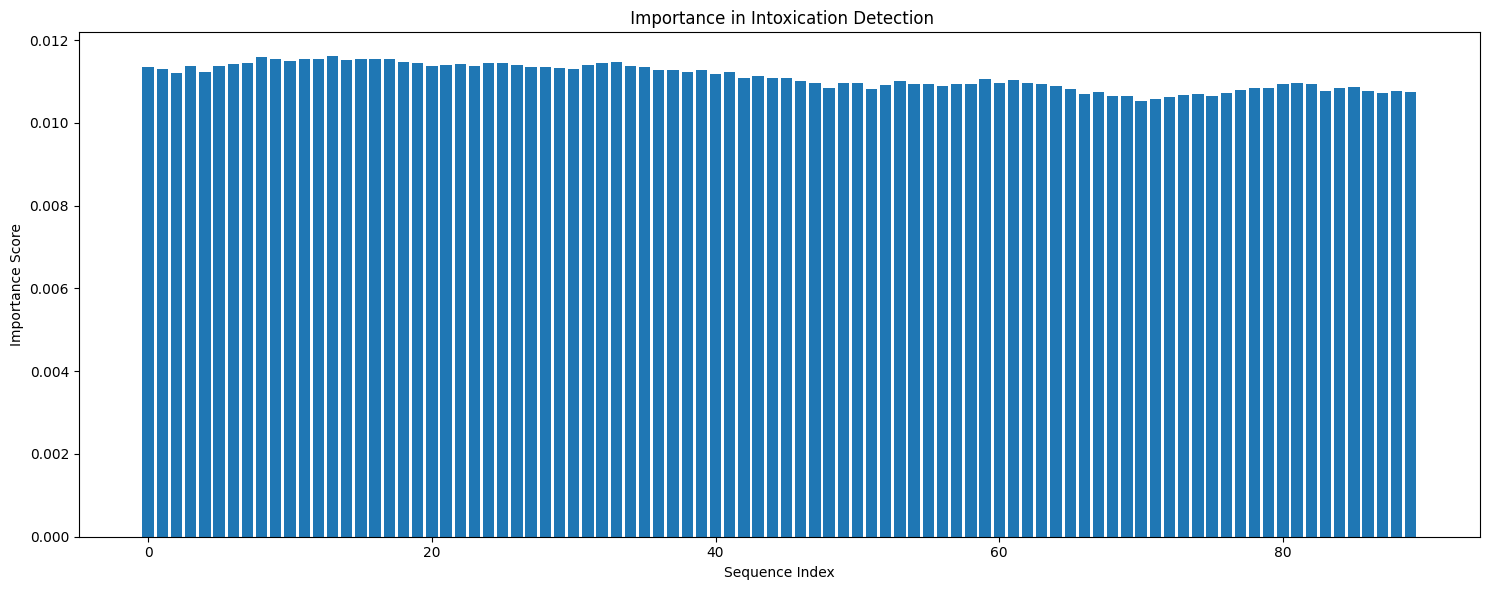

Top 5 Important Time: [13  8 11 17  9]


In [108]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

class TransformerModel(torch.nn.Module):
    def __init__(self, input_size, hidden_size, num_classes, num_heads=2, num_layers=4, dropout=0.1):
        super(TransformerModel, self).__init__()
        
        # Transformer 설정
        self.transformer = nn.TransformerEncoder(
            nn.TransformerEncoderLayer(
                d_model=input_size, 
                nhead=num_heads, 
                dim_feedforward=hidden_size, 
                dropout=dropout
            ),
            num_layers=num_layers
        )
        
        # 키포인트별 중요도를 추정할 가중치 레이어
        self.keypoint_importance_layer = nn.Linear(input_size, 1)
        
        # 분류를 위한 fully connected layers
        self.fc = nn.Sequential(
            nn.Linear(input_size, hidden_size),
            nn.ReLU(),
            nn.Dropout(dropout),
            nn.Linear(hidden_size, num_classes)
        )
        
        # 키포인트 중요도 저장 변수
        self.keypoint_importances = None

    def forward(self, x):
        # Transformer Encoder 통과
        transformer_output = self.transformer(x)
        
        # 각 키포인트의 중요도 계산
        keypoint_importances = self.keypoint_importance_layer(transformer_output)  # (batch_size, seq_len, 1)
        
        # 중요도는 키포인트 차원 기준 Softmax 정규화
        keypoint_importances = torch.softmax(keypoint_importances.squeeze(-1), dim=-1)  # (batch_size, seq_len)
        
        # 인스턴스 변수에 저장
        self.keypoint_importances = keypoint_importances
        
        # 마지막 시퀀스의 출력 사용
        output = transformer_output[:, -1, :]
        
        # 분류 수행
        classification_output = self.fc(output)
        
        return classification_output

def visualize_keypoint_importance(keypoint_importances):
    """
    키포인트 중요도 시각화
    
    Parameters:
    - keypoint_importances: numpy array of keypoint importances
    """
    plt.figure(figsize=(15, 6))
    plt.bar(range(len(keypoint_importances)), keypoint_importances)
    plt.title(' Importance in Intoxication Detection')
    plt.xlabel('Sequence Index')
    plt.ylabel('Importance Score')
    plt.tight_layout()
    plt.show()
    
    # 상위 5개 중요 키포인트 반환
    top_keypoints = keypoint_importances.argsort()[-5:][::-1]
    return top_keypoints

model = TransformerModel(34,50,1,2,4,0.1)
# 훈련 루프
epoch_keypoint_importances = []

for batch_X, batch_y in train_loader:
    optimizer.zero_grad()
    
    # 모델 예측
    output = model(batch_X)
    
    # 손실 계산
    loss = criterion(output.squeeze(), batch_y.float())
    
    # 역전파
    loss.backward()
    optimizer.step()
    
    # 배치별 중요도 저장
    if model.keypoint_importances is not None:
        # 배치별 평균 중요도 계산 후 저장
        batch_importance = model.keypoint_importances.mean(dim=0).detach().cpu().numpy()
        epoch_keypoint_importances.append(batch_importance)

# 에포크 평균 중요도 계산
if epoch_keypoint_importances:
    avg_keypoint_importances = np.mean(np.array(epoch_keypoint_importances), axis=0)
    top_keypoints = visualize_keypoint_importance(avg_keypoint_importances)
    print(f"Top 5 Important Time: {top_keypoints}")


In [ ]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
class TransformerModel(torch.nn.Module):
    def __init__(self, input_size, hidden_size, num_classes, num_heads=2, num_layers=4, dropout=0.1):
        super(TransformerModel, self).__init__()
        
        # Transformer Encoder 설정
        self.transformer = nn.TransformerEncoder(
            nn.TransformerEncoderLayer(
                d_model=input_size, 
                nhead=num_heads, 
                dim_feedforward=hidden_size, 
                dropout=dropout
            ),
            num_layers=num_layers
        )
        
        # 키포인트 중요도를 계산할 레이어
        self.keypoint_importance_layer = nn.Linear(input_size, 1)
        
        # 분류를 위한 Fully Connected Layers
        self.fc = nn.Sequential(
            nn.Linear(input_size, hidden_size),
            nn.ReLU(),
            nn.Dropout(dropout),
            nn.Linear(hidden_size, num_classes)
        )
        
        # 중요도 저장
        self.keypoint_importances = None

    def forward(self, x):
        # Transformer Encoder 통과
        transformer_output = self.transformer(x)  # (batch_size, seq_len, input_size)
        
        # 각 키포인트의 중요도 계산
        keypoint_importances = self.keypoint_importance_layer(transformer_output).squeeze(-1)  # (batch_size, seq_len, 1)
        
        # 중요도는 키포인트 차원 기준 Softmax 정규화
        keypoint_importances = torch.softmax(keypoint_importances.mean(dim=1), dim=-1)  # (batch_size, seq_len)
        
        # 인스턴스 변수에 저장
        self.keypoint_importances = keypoint_importances  # (batch_size, seq_len)
        
        # Transformer의 마지막 시퀀스의 출력 사용
        output = transformer_output[:, -1, :]  # (batch_size, input_size)
        
        # 분류 수행
        classification_output = self.fc(output)  # (batch_size, num_classes)
        
        return classification_output

# 키포인트 중요도 시각화
def visualize_keypoint_importance(keypoint_importances):
    """
    키포인트 중요도 시각화
    
    Parameters:
    - keypoint_importances: Tensor (batch_size, seq_len)
    """
    # 배치 평균으로 키포인트 중요도 계산
    avg_keypoint_importances = model.keypoint_importances.mean(dim=0).detach().cpu().numpy()  # (input_size,)

    # 시각화
    plt.figure(figsize=(10, 6))
    plt.bar(range(len(avg_keypoint_importances)), avg_keypoint_importances)
    plt.xlabel("Keypoint Index")
    plt.ylabel("Importance Score")
    plt.title("Keypoint Importance")
    plt.show()

model = TransformerModel(34,50,1)


# 손실 함수 및 옵티마이저
criterion = torch.nn.BCEWithLogitsLoss()
optimizer = torch.optim.NAdam(model.parameters(), lr=0.001)


# 훈련 루프
epoch_keypoint_importances = []

for batch_X, batch_y in train_loader:
    optimizer.zero_grad()
    
    # 모델 예측
    output = model(batch_X)
    
    # 손실 계산
    loss = criterion(output.squeeze(), batch_y.float())
    
    # 역전파
    loss.backward()
    optimizer.step()
    
    # 배치별 중요도 저장
    if model.keypoint_importances is not None:
        # 배치별 평균 중요도 계산 후 저장
        batch_importance = model.keypoint_importances.mean(dim=0).detach().cpu().numpy()
        epoch_keypoint_importances.append(batch_importance)

# 에포크 평균 중요도 계산
if epoch_keypoint_importances:
    avg_keypoint_importances = np.mean(np.array(epoch_keypoint_importances), axis=0)
    top_keypoints = visualize_keypoint_importance(avg_keypoint_importances)
    print(f"Top 5 Important Time: {top_keypoints}")


TypeError: len() of unsized object

<Figure size 1000x600 with 0 Axes>

/home/alpaco/anaconda3/envs/test/lib/python3.8/site-packages/torch/nn/modules/transformer.py:307: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(f"enable_nested_tensor is True, but self.use_nested_tensor is False because {why_not_sparsity_fast_path}")


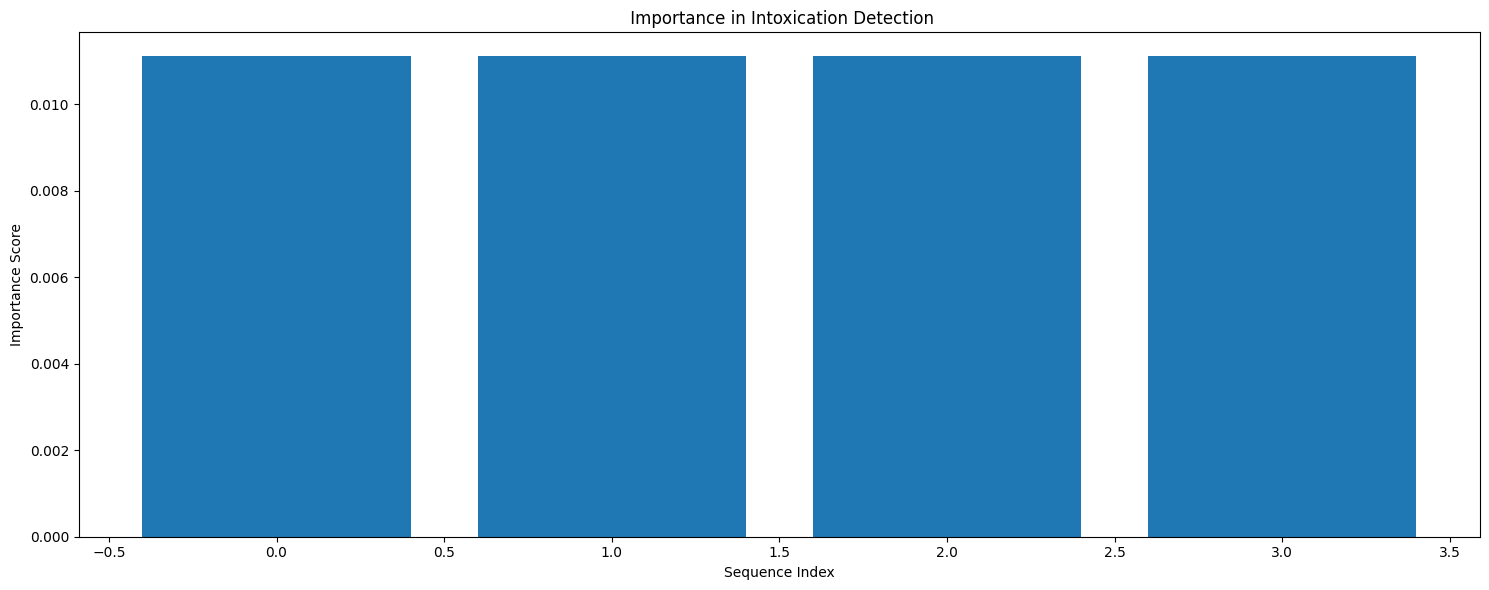

Epoch 1, Loss: 0.6303960680961609
Top 5 Important Keypoints: [3 1 0 2]


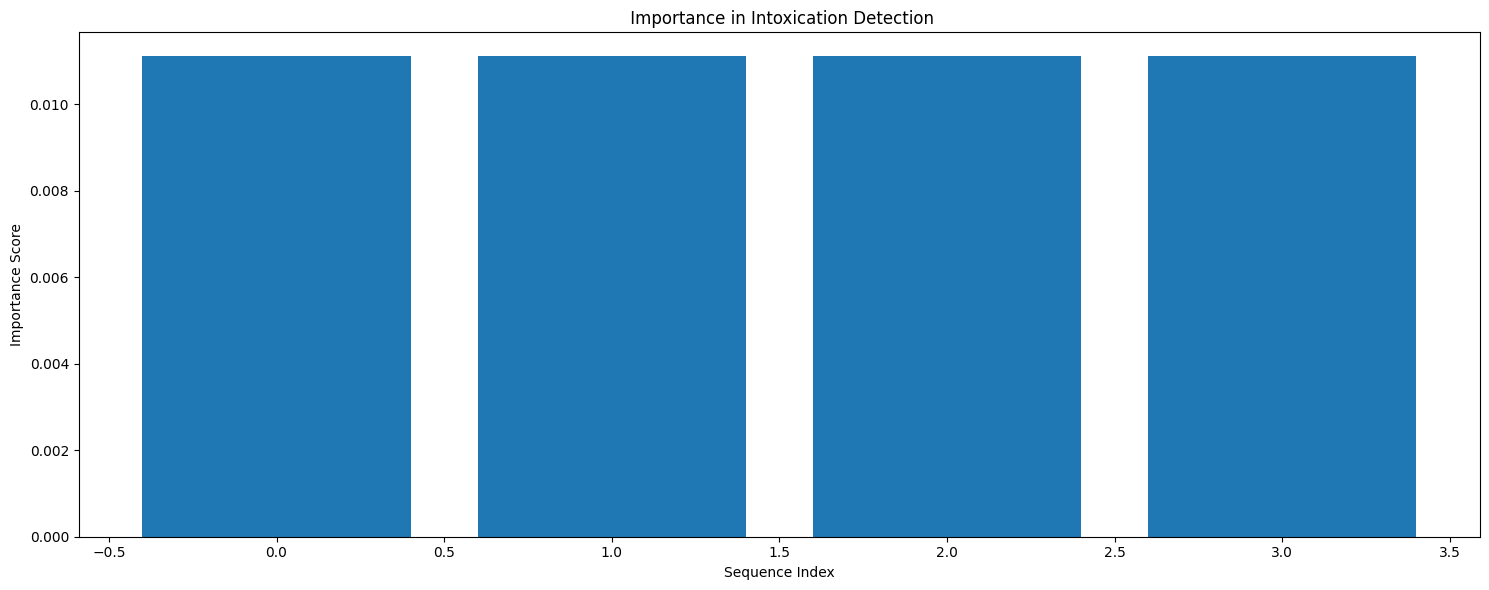

Epoch 2, Loss: 0.6237255930900574
Top 5 Important Keypoints: [3 2 1 0]


KeyboardInterrupt: 

In [ ]:
class TransformerModel(torch.nn.Module):
    def __init__(self, input_size, hidden_size, num_classes, num_heads=2, num_layers=4, dropout=0.1):
        super(TransformerModel, self).__init__()
        
        # Transformer Encoder 설정
        self.transformer = nn.TransformerEncoder(
            nn.TransformerEncoderLayer(
                d_model=input_size, 
                nhead=num_heads, 
                dim_feedforward=hidden_size, 
                dropout=dropout
            ),
            num_layers=num_layers
        )
        
        # 키포인트 중요도를 계산할 레이어
        self.keypoint_importance_layer = nn.Linear(input_size, 1)
        
        # 분류를 위한 Fully Connected Layers
        self.fc = nn.Sequential(
            nn.Linear(input_size, hidden_size),
            nn.ReLU(),
            nn.Dropout(dropout),
            nn.Linear(hidden_size, num_classes)
        )
        
        # 중요도 저장
        self.keypoint_importances = None

    def forward(self, x):
        # Transformer Encoder 통과
        transformer_output = self.transformer(x)  # (batch_size, seq_len, input_size)
        
        # 각 키포인트의 중요도 계산
        keypoint_importances = self.keypoint_importance_layer(transformer_output)  # (batch_size, seq_len, 1)
        
        # 중요도는 키포인트 차원 기준 Softmax 정규화
        keypoint_importances = torch.softmax(keypoint_importances.squeeze(-1), dim=-1)  # (batch_size, seq_len)
        
        # 인스턴스 변수에 저장
        self.keypoint_importances = keypoint_importances.mean(dim=1)  # (batch_size, seq_len 평균)
        
        # Transformer의 마지막 시퀀스의 출력 사용
        output = transformer_output[:, -1, :]  # (batch_size, input_size)
        
        # 분류 수행
        classification_output = self.fc(output)  # (batch_size, num_classes)
        
        return classification_output

model = TransformerModel(34,50,1,2,4,0.1)
#(self, input_size, hidden_size, num_classes, num_heads=2, num_layers=4, dropout=0.1)

# 훈련 루프
for epoch in range(epochs):
    model.train()
    epoch_keypoint_importances = []
    
    for batch_X, batch_y in train_loader:
        optimizer.zero_grad()
        
        # 모델 예측
        output = model(batch_X)
        
        # 손실 계산
        loss = criterion(output.squeeze(), batch_y.float())
        
        # 역전파
        loss.backward()
        optimizer.step()
        
        # 키포인트 중요도 저장
        if model.keypoint_importances is not None:
            epoch_keypoint_importances.append(
                model.keypoint_importances.detach().cpu().numpy()
            )
    
    # 에포크 평균 중요도 계산
    if epoch_keypoint_importances:
        avg_keypoint_importances = np.mean(np.vstack(epoch_keypoint_importances), axis=0)
        
        # 시각화
        top_keypoints = visualize_keypoint_importance(avg_keypoint_importances)
        print(f"Epoch {epoch+1}, Loss: {loss.item()}")
        print(f"Top 5 Important Keypoints: {top_keypoints}")



In [110]:
for batch_X, batch_y in train_loader:
    print(batch_X.shape)

torch.Size([8, 90, 34])
torch.Size([8, 90, 34])
torch.Size([8, 90, 34])
torch.Size([8, 90, 34])
torch.Size([8, 90, 34])
torch.Size([8, 90, 34])
torch.Size([8, 90, 34])
torch.Size([8, 90, 34])
torch.Size([8, 90, 34])
torch.Size([8, 90, 34])
torch.Size([8, 90, 34])
torch.Size([8, 90, 34])
torch.Size([8, 90, 34])
torch.Size([8, 90, 34])
torch.Size([8, 90, 34])
torch.Size([8, 90, 34])
torch.Size([8, 90, 34])
torch.Size([8, 90, 34])
torch.Size([8, 90, 34])
torch.Size([8, 90, 34])
torch.Size([8, 90, 34])
torch.Size([8, 90, 34])
torch.Size([8, 90, 34])
torch.Size([8, 90, 34])
torch.Size([8, 90, 34])
torch.Size([8, 90, 34])
torch.Size([8, 90, 34])
torch.Size([8, 90, 34])
torch.Size([8, 90, 34])
torch.Size([8, 90, 34])
torch.Size([8, 90, 34])
torch.Size([8, 90, 34])
torch.Size([8, 90, 34])
torch.Size([8, 90, 34])
torch.Size([8, 90, 34])
torch.Size([8, 90, 34])
torch.Size([8, 90, 34])
torch.Size([8, 90, 34])
torch.Size([8, 90, 34])
torch.Size([8, 90, 34])
torch.Size([8, 90, 34])
torch.Size([8, 9

In [41]:
import matplotlib.pyplot as plt
import numpy as np

# 시퀀스 길이와 각 키포인트에 대한 Attention Score 시각화
def visualize_attention(attn_weights, seq_idx=0, head_idx=0):
    # seq_idx: 특정 시퀀스 인덱스
    # head_idx: 특정 Attention Head

    scores = attn_weights[seq_idx, head_idx, :, :]  # (query_len, key_len)
    plt.figure(figsize=(10, 8))
    plt.imshow(scores, cmap='viridis', aspect='auto')
    plt.colorbar(label="Attention Score")
    plt.xlabel("Key Points")
    plt.ylabel("Sequence Positions")
    plt.title("Attention Scores")
    plt.show()
    
last_attention_scores = epoch_attention_scores[-2]  # 마지막 배치
visualize_attention(last_attention_scores, seq_idx=0, head_idx=0)

IndexError: too many indices for array: array is 3-dimensional, but 4 were indexed

In [99]:
for x,y in train_loader:
    print(x.shape)
    print(y.shape)

torch.Size([16, 90, 34])
torch.Size([16])
torch.Size([16, 90, 34])
torch.Size([16])
torch.Size([16, 90, 34])
torch.Size([16])
torch.Size([16, 90, 34])
torch.Size([16])
torch.Size([16, 90, 34])
torch.Size([16])
torch.Size([16, 90, 34])
torch.Size([16])
torch.Size([16, 90, 34])
torch.Size([16])
torch.Size([16, 90, 34])
torch.Size([16])
torch.Size([16, 90, 34])
torch.Size([16])
torch.Size([16, 90, 34])
torch.Size([16])
torch.Size([16, 90, 34])
torch.Size([16])
torch.Size([16, 90, 34])
torch.Size([16])
torch.Size([16, 90, 34])
torch.Size([16])
torch.Size([16, 90, 34])
torch.Size([16])
torch.Size([16, 90, 34])
torch.Size([16])
torch.Size([16, 90, 34])
torch.Size([16])
torch.Size([16, 90, 34])
torch.Size([16])
torch.Size([16, 90, 34])
torch.Size([16])
torch.Size([16, 90, 34])
torch.Size([16])
torch.Size([16, 90, 34])
torch.Size([16])
torch.Size([16, 90, 34])
torch.Size([16])
torch.Size([16, 90, 34])
torch.Size([16])
torch.Size([16, 90, 34])
torch.Size([16])
torch.Size([16, 90, 34])
torch.Siz

In [34]:
import pandas as pd
import os

tmp = pd.read_csv('/home/alpaco/project/drunk_prj/data/아카이브/616-6_cam02_drunken03_place01_day_summer_396_2687_part1.mp4_combined.csv')
tmp['FILENAME'] = '/home/alpaco/project/drunk_prj/data/아카이브/616-6_cam02_drunken03_place01_day_summer_396_2687_part1.mp4_combined.csv'
tmp.rename(columns=lambda col: 'label' if col == 'ID' else col, inplace=True)
columns_to_convert = tmp.columns.difference(['FILENAME','label'])
# float으로 변환
tmp[columns_to_convert] = tmp[columns_to_convert].astype(float)
#스케일링 진행 후



coordinate_cols = [f'x{i}' for i in range(1, 18)] + [f'y{i}' for i in range(1, 18)]
X = tmp[coordinate_cols].values  # 26개의 좌표 피처

scaler_X = StandardScaler()
X_normalized = scaler_X.fit_transform(X)
#y_normalized = scaler_y.fit_transform(y.reshape(-1, 1)).flatten()


tmp[coordinate_cols] = X_normalized

tmpx, tmpy = create_sequences(tmp, sequence_length)


from sklearn.model_selection import train_test_split
import torch
from torch.utils.data import TensorDataset,DataLoader



# 학습 데이터와 테스트 데이터를 PyTorch 텐서로 변환하여 모델 학습에 사용합니다.
tmp_X_tensor = torch.FloatTensor(tmpx)
tmp_y_tensor = torch.LongTensor(tmpy)


# PyTorch의 DataLoader를 사용해 데이터를 묶어 관리할 수 있습니다.

tmp_dataset = TensorDataset(tmp_X_tensor, tmp_y_tensor)
tmp_loader = DataLoader(tmp_dataset, shuffle=False)

attn_weights shape: torch.Size([1, 90, 90])


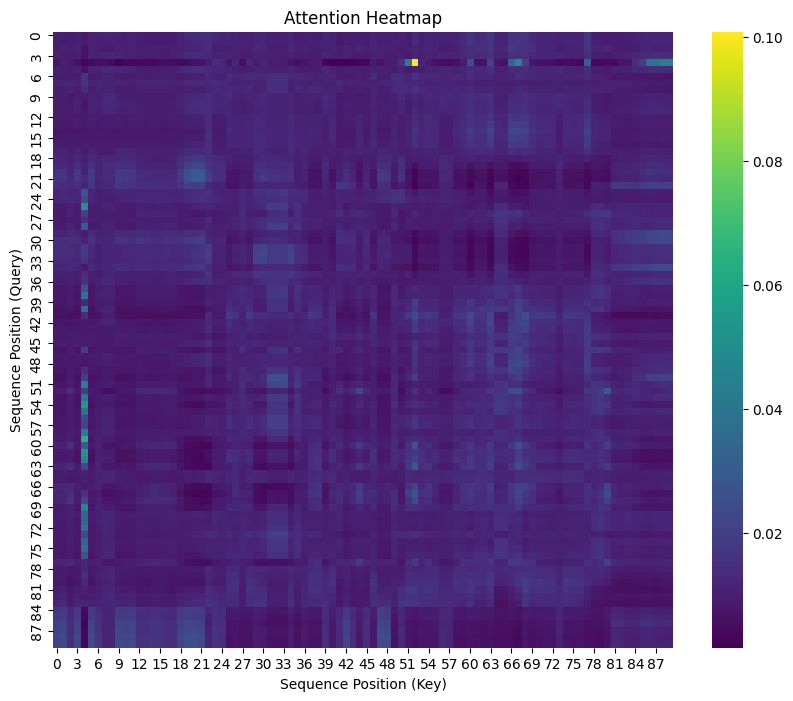

In [35]:
# 모델 평가 모드 설정
model.eval()

# 특정 배치의 Attention Score 시각화
with torch.no_grad():
    for batch_X, batch_y in tmp_loader:
        # 모델 예측 및 Attention Score 추출
        output, attn_weights = model(batch_X)  # attn_weights: Check the actual shape
        
        # attn_weights 차원 확인
        print("attn_weights shape:", attn_weights.shape)
        
        # 특정 샘플의 Attention Score 선택 (차원에 따라 조정)
        if attn_weights.dim() == 3:  # (seq_len, seq_len) 형태
            attention_score = attn_weights
        elif attn_weights.dim() == 4:  # (batch_size, num_heads, seq_len, seq_len) 형태
            head_idx = 0  # 시각화할 Head
            sample_idx = 0  # 시각화할 Sample
            attention_score = attn_weights[sample_idx, head_idx, :, :]
        elif attn_weights.dim() == 2:  # (seq_len, seq_len) 형태
            attention_score = attn_weights
        else:
            raise ValueError(f"Unsupported attn_weights dimension: {attn_weights.dim()}")
        attention_score = attention_score.squeeze(0)  # (1, 90, 90) -> (90, 90)

        # 히트맵 시각화
        plt.figure(figsize=(10, 8))
        sns.heatmap(attention_score.cpu().numpy(), annot=False, cmap='viridis', cbar=True)
        plt.title(f"Attention Heatmap")
        plt.xlabel("Sequence Position (Key)")
        plt.ylabel("Sequence Position (Query)")
        plt.show()
        
        break  # 하나의 배치만 시각화


In [33]:
test = pd.read_csv('/home/alpaco/project/drunk_prj/data/3_frame_data/final_3frame_test.csv')
test.drop('Unnamed: 0',axis=1,inplace=True)
test

,label,frame,x1,x2,x3,x4,x5,x6,x7,x8,...,y10,y11,y12,y13,y14,y15,y16,y17,y,FILENAME
0,ID: tensor(1660.),0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,617-5_cam01_drunken04_place03_night_summer_173...
1,ID: tensor(1660.),1,0,0,0,0,0,0,1386,776,...,1449,1113,1430,1095,1496,1213,1465,1180,1,617-5_cam01_drunken04_place03_night_summer_173...
2,ID: tensor(1660.),2,0,0,0,0,0,0,1380,775,...,1396,1113,1411,1089,1452,1200,1466,1183,1,617-5_cam01_drunken04_place03_night_summer_173...
3,ID: tensor(1660.),3,0,0,0,0,0,0,1392,768,...,1397,1092,1435,1075,1440,1188,1464,1182,1,617-5_cam01_drunken04_place03_night_summer_173...
4,ID: tensor(1660.),4,0,0,0,0,0,0,1407,794,...,1432,1109,1422,1096,1437,1189,1434,1178,1,617-5_cam01_drunken04_place03_night_summer_173...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24495,ID: tensor(460.),95,1910,886,1914,879,0,0,1930,877,...,1949,1066,1946,1070,1954,1122,1954,1126,1,224-3_cam02_drunken03_place03_night_summer_114...
24496,ID: tensor(460.),96,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,224-3_cam02_drunken03_place03_night_summer_114...
24497,ID: tensor(460.),97,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,224-3_cam02_drunken03_place03_night_summer_114...
24498,ID: tensor(460.),98,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,224-3_cam02_drunken03_place03_night_summer_114...


In [23]:
batch_x,batch_y = next(iter(train_loader))

In [ ]:
import torch
from torch.utils.data import DataLoader
from transformers import AdamW, RobertaConfig, RobertaModel
# Transformer 모델을 위한 설정
class TransformerModel(torch.nn.Module):
    def __init__(self, input_size, hidden_size, num_classes, num_heads=2, num_layers=4, dropout=0.1):
        super(TransformerModel, self).__init__()
        # Multi-Head Attention 레이어
        self.attention = torch.nn.MultiheadAttention(embed_dim=input_size, num_heads=num_heads, dropout=dropout)
        # Transformer Encoder
        self.transformer = torch.nn.TransformerEncoder(
            torch.nn.TransformerEncoderLayer(d_model=input_size, nhead=num_heads, dim_feedforward=hidden_size, dropout=dropout),
            num_layers=num_layers
        )
        # Fully connected layers
        self.fc = torch.nn.Sequential(
            torch.nn.Linear(input_size, hidden_size),
            torch.nn.ReLU(),
            torch.nn.Dropout(dropout),
            torch.nn.Linear(hidden_size, num_classes)
        )
    def forward(self, x):
        # 시퀀스 길이, 배치 크기, 특성 차원에 맞게 변환
        x = x.transpose(0, 1)  # Transformer는 (seq_len, batch_size, features)의 형태를 기대함
        # Attention 통과
        attn_output, _ = self.attention(x, x, x)
        # Transformer Encoder 통과
        transformer_output = self.transformer(attn_output)
        # 마지막 시퀀스 출력을 사용 (기본적으로 클래스 레이블 예측)
        output = transformer_output[-1, :, :]
        # Fully connected layers 통과
        output = self.fc(output)
        return output
# 모델 인스턴스 생성
input_size = 34 # 입력 특징의 크기
hidden_size = 50
num_classes = 1  # 이진 분류
model = TransformerModel(input_size, hidden_size, num_classes)
# 손실 함수 및 옵티마이저
criterion = torch.nn.BCEWithLogitsLoss()
optimizer = torch.optim.NAdam(model.parameters(), lr=0.001)
    
# Forward 패스 및 Attention Weights 추출
model.eval()
with torch.no_grad():
    output = model(batch_X)  # 배치 중 일부를 추론
    attention_weights = model.attention_weights  # (batch_size, seq_len, seq_len)
# 특정 샘플의 Attention Weights 확인 (예: 첫 번째 샘플)
sample_idx = 0
attention_map = attention_weights[sample_idx].cpu().numpy()  # (seq_len, seq_len)
# 좌표별 Attention 가중치 집계
# 입력 좌표는 90프레임(시퀀스 길이) × 34 (17개 x, y 좌표)로 구성
coordinate_weights = []
for t in range(90):  # 시퀀스 길이
    attention_per_frame = attention_map[t, :]  # 특정 프레임의 Attention (90,)
    attention_avg_per_feature = attention_per_frame.reshape(-1, 2).mean(axis=1)  # x, y 평균 계산
    coordinate_weights.append(attention_avg_per_feature)
# 키포인트별로 평균 가중치 계산 (17개의 키포인트)
average_weights = np.mean(coordinate_weights, axis=0)
# 히트맵 시각화
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
sns.heatmap(
    average_weights.reshape(1, -1),
    cmap="viridis",
    annot=True,
    cbar=True,
    xticklabels=[f"Keypoint {i}" for i in range(1, 18)],
    yticklabels=['Attention']
)
plt.title("Keypoint Influence on Model Output")
plt.xlabel("Keypoints")
plt.ylabel("Attention Weight")
plt.show()

IndentationError: unindent does not match any outer indentation level (<tokenize>, line 22)

# New Keypoint with Transformers

In [ ]:
# 오른쪽팔 6 8 10
# 왼쪽팔 5 7 9 
# 오른족 다리 12 14 16
# 왼쪽 다리 11 13 15
# 이걸로 각도 & 
# 독립변수 : 12345, 각도 4개 
# 독립변수 : 얼굴 하나로 & 전체
# 독립변수: 얼굴 하나로 & 각도 4개
# 서로 대칭되는 곳끼리 거리 (67)(89)(1011)(1213)(1415)(1617) & 머리



In [37]:
import pandas as pd
import numpy as np

def calculate_angle(pointA, pointB, pointC):
    # 벡터 계산
    BA = np.array(pointA) - np.array(pointB)
    BC = np.array(pointC) - np.array(pointB)
    
    # 내적과 벡터 크기 계산
    dot_product = np.dot(BA, BC)
    magnitude_BA = np.linalg.norm(BA)
    magnitude_BC = np.linalg.norm(BC)
    
    # 각도 계산 (라디안 -> 도)
    cos_theta = dot_product / (magnitude_BA * magnitude_BC + 1e-6)  # 1e-6은 0으로 나누는 오류 방지
    angle = np.arccos(np.clip(cos_theta, -1.0, 1.0))
    return np.degrees(angle)

# CSV 파일 로드
file_path = "/home/alpaco/project/drunk_prj/data/3_frame_data/final_combined.csv"  # 파일 경로
data = pd.read_csv(file_path)

# 각도 계산을 위한 키포인트 인덱스
# 예: 오른팔 (6, 8, 10), 왼팔 (5, 7, 9)
keypoint_indices = {
    "right_arm": ("x7","y7", "x9","y9", "x11","y11"),
    "left_arm": ("x6","y6", "x8","y8", "x10","y10"),
    "right_leg": ("x13","y13", "x15","y15","x17","y17"),
    "left_leg":("x12","y12","x14","y14","x16","y16")
}

angles = []  # 각도를 저장할 리스트

# 데이터프레임 순회
for _, row in data.iterrows():
    frame_angles = {}
    for part, (xA, yA, xB, yB, xC, yC) in keypoint_indices.items():
        pointA = (row[xA], row[yA])
        pointB = (row[xB], row[yB])
        pointC = (row[xC], row[yC])
        frame_angles[part] = calculate_angle(pointA, pointB, pointC)
    
    angles.append(frame_angles)

angle_df = pd.DataFrame(angles)
angle_df['FILENAME'] = data['FILENAME']
angle_df['y'] = data['y']
angle_df["frame"] = data['frame']
angle_df['label']=data['label']

angle_df.to_csv('/home/alpaco/project/drunk_prj/data/3_frame_data/degree_combined.csv')

In [ ]:
angle_df = pd.read_csv('/home/alpaco/project/drunk_prj/data/3_frame_data/degree_combined.csv')
angle_df.drop('Unnamed: 0',axis=1,inplace=True)
#스케일링 진행 후
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler


coordinate_cols = ['right_arm','left_arm','right_leg','left_leg']
X = angle_df[coordinate_cols].values  # 34개의 좌표 피처

scaler_X = StandardScaler()
X_normalized = scaler_X.fit_transform(X)
#y_normalized = scaler_y.fit_transform(y.reshape(-1, 1)).flatten()


angle_df[coordinate_cols] = X_normalized


In [45]:
# 6. sequence length 생성하기
import numpy as np
#Sequence Lenght 설정 후 진행 예정
def create_sequences(df, seq_length):
    xs, ys = [], []
    
    # 'FILENAME'과 'label' 기준으로 그룹화
    for _, group in df.groupby(['FILENAME', 'label']):
        # 그룹 내 'frame' 기준 정렬
        group = group.sort_values(by=['frame']).reset_index(drop=True)
        
        # frame, FILENAME, label, id, y 제외한 좌표 피처
        data_X = group.drop(columns=['frame', 'FILENAME', 'label','y'], errors='ignore').values  
        
        data_y = group['y'].values  # 이진 분류 레이블
        
        # 시퀀스 생성
        for i in range(len(data_X) - seq_length+1):
            x = data_X[i:i + seq_length]
            y = data_y[i + seq_length - 1]  # 시퀀스의 마지막 레이블 사용
            xs.append(x)
            ys.append(y)
    
    return np.array(xs), np.array(ys)

sequence_length = 90

# 시퀀스 생성
X_seq, Y_seq = create_sequences(angle_df, sequence_length)

from sklearn.model_selection import train_test_split
import torch
from torch.utils.data import TensorDataset,DataLoader


# 학습 데이터와 테스트 데이터로 나누고, 라벨의 비율을 유지합니다.
train_X, valid_X, train_y, valid_y = train_test_split(X_seq, Y_seq, test_size=0.2, stratify=Y_seq, random_state=42)

# 학습 데이터를 다시 셔플하여 모델이 순서에 너무 의존하지 않도록 합니다.
train_indices = np.arange(len(train_X))
np.random.shuffle(train_indices)
train_X, train_y = train_X[train_indices], train_y[train_indices]


# 학습 데이터와 테스트 데이터를 PyTorch 텐서로 변환하여 모델 학습에 사용합니다.
train_X_tensor = torch.FloatTensor(train_X)
train_y_tensor = torch.LongTensor(train_y)
valid_X_tensor = torch.FloatTensor(valid_X)
valid_y_tensor = torch.LongTensor(valid_y)

# PyTorch의 DataLoader를 사용해 데이터를 묶어 관리할 수 있습니다.
batch_size = 16  # 배치 사이즈는 한 번에 학습하는 데이터 개수를 뜻합니다.
train_dataset = TensorDataset(train_X_tensor, train_y_tensor)
valid_dataset = TensorDataset(valid_X_tensor, valid_y_tensor)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
valid_loader = DataLoader(valid_dataset, batch_size=batch_size, shuffle=False)

In [46]:
import torch
from torch.utils.data import DataLoader
from transformers import AdamW, RobertaConfig, RobertaModel


# Transformer 모델을 위한 설정
class TransformerModel(torch.nn.Module):
    def __init__(self, input_size, hidden_size, num_classes, num_heads=2, num_layers=4, dropout=0.1):
        super(TransformerModel, self).__init__()
        
        # Multi-Head Attention 레이어
        self.attention = torch.nn.MultiheadAttention(embed_dim=input_size, num_heads=num_heads, dropout=dropout)
        
        # Transformer Encoder
        self.transformer = torch.nn.TransformerEncoder(
            torch.nn.TransformerEncoderLayer(d_model=input_size, nhead=num_heads, dim_feedforward=hidden_size, dropout=dropout), 
            num_layers=num_layers
        )
        
        # Fully connected layers
        self.fc = torch.nn.Sequential(
            torch.nn.Linear(input_size, hidden_size),
            torch.nn.ReLU(),
            torch.nn.Dropout(dropout),
            torch.nn.Linear(hidden_size, num_classes)
        )

    def forward(self, x):
        # 시퀀스 길이, 배치 크기, 특성 차원에 맞게 변환
        x = x.transpose(0, 1)  # Transformer는 (seq_len, batch_size, features)의 형태를 기대함
        
        # Attention 통과
        attn_output, _ = self.attention(x, x, x)
        
        # Transformer Encoder 통과
        transformer_output = self.transformer(attn_output)
        
        # 마지막 시퀀스 출력을 사용 (기본적으로 클래스 레이블 예측)
        output = transformer_output[-1, :, :]
        
        # Fully connected layers 통과
        output = self.fc(output)
        
        return output

# 모델 인스턴스 생성
input_size = 4 # 입력 특징의 크기
hidden_size = 50
num_classes = 1  # 이진 분류
model = TransformerModel(input_size, hidden_size, num_classes)

# 손실 함수 및 옵티마이저
criterion = torch.nn.BCEWithLogitsLoss()
optimizer = torch.optim.NAdam(model.parameters(), lr=0.001)

# 훈련 루프
epochs = 50
for epoch in range(epochs):
    model.train()
    for batch_X, batch_y in train_loader:
        optimizer.zero_grad()
        
        # 모델 예측
        output = model(batch_X)
        
        # 손실 계산
        loss = criterion(output.squeeze(), batch_y.float())
        
        # 역전파
        loss.backward()
        optimizer.step()

    print(f"Epoch {epoch+1}, Loss: {loss.item()}")




/home/alpaco/anaconda3/envs/test/lib/python3.8/site-packages/torch/nn/modules/transformer.py:307: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(f"enable_nested_tensor is True, but self.use_nested_tensor is False because {why_not_sparsity_fast_path}")


Epoch 1, Loss: 0.02023623138666153
Epoch 2, Loss: 0.0033999704755842686
Epoch 3, Loss: 0.0013166291173547506
Epoch 4, Loss: 0.0007548101712018251
Epoch 5, Loss: 0.00017962028505280614
Epoch 6, Loss: 0.0004608716117218137
Epoch 7, Loss: 0.00010064301022794098
Epoch 8, Loss: 9.689340367913246e-05
Epoch 9, Loss: 0.00033079355489462614
Epoch 10, Loss: 4.9731122999219224e-05
Epoch 11, Loss: 3.3255593734793365e-05
Epoch 12, Loss: 3.359944821568206e-05
Epoch 13, Loss: 1.890248131530825e-05
Epoch 14, Loss: 1.0078333616547752e-05
Epoch 15, Loss: 2.340317951166071e-05
Epoch 16, Loss: 4.2501626012381166e-05
Epoch 17, Loss: 2.4469745767419226e-05
Epoch 18, Loss: 9.645705722505227e-05
Epoch 19, Loss: 1.7396492694388144e-05
Epoch 20, Loss: 2.6865696781896986e-05
Epoch 21, Loss: 1.2095048077753745e-05
Epoch 22, Loss: 6.790176939830417e-06
Epoch 23, Loss: 6.526624201796949e-05
Epoch 24, Loss: 3.276687493780628e-06
Epoch 25, Loss: 9.749062428454636e-07
Epoch 26, Loss: 4.277771950000897e-06
Epoch 27, Lo

In [47]:
torch.save(model.state_dict(),'/home/alpaco/project/drunk_prj/models/only_model/1205_onlydegree2.pt')


In [48]:
test_df = pd.read_csv('/home/alpaco/project/drunk_prj/data/3_frame_data/degree_test.csv')
test_df.drop('Unnamed: 0',axis=1,inplace=True)


import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler


coordinate_cols = ['right_arm','left_arm','right_leg','left_leg']
X = test_df[coordinate_cols].values  # 34개의 좌표 피처

scaler_X = StandardScaler()
X_normalized = scaler_X.fit_transform(X)
# y_normalized = scaler_y.fit_transform(y.reshape(-1, 1)).flatten()
# 

test_df[coordinate_cols] = X_normalized

test_X_seq, test_y_seq = create_sequences(test_df, sequence_length)


/home/alpaco/anaconda3/envs/test/lib/python3.8/site-packages/torch/nn/modules/transformer.py:307: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(f"enable_nested_tensor is True, but self.use_nested_tensor is False because {why_not_sparsity_fast_path}")
/tmp/ipykernel_672750/950511128.py:40: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loade

Accuracy of the model on test data: 84.12%


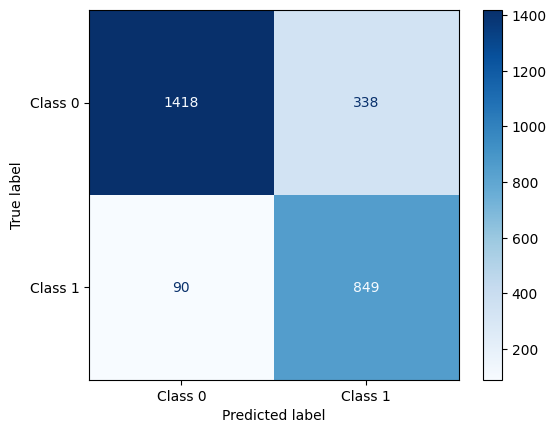

Precision: 0.72
Recall: 0.90
F1 Score: 0.80


In [49]:

import torch
from torch.utils.data import TensorDataset,DataLoader



# 학습 데이터와 테스트 데이터를 PyTorch 텐서로 변환하여 모델 학습에 사용합니다.
test_X_tensor = torch.FloatTensor(test_X_seq)
test_y_tensor = torch.LongTensor(test_y_seq)


# PyTorch의 DataLoader를 사용해 데이터를 묶어 관리할 수 있습니다.
batch_size = 16  # 배치 사이즈는 한 번에 학습하는 데이터 개수를 뜻합니다.
test_dataset = TensorDataset(test_X_tensor, test_y_tensor)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)


###########################################################################################################################################

import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score
from torch.utils.data import DataLoader, TensorDataset
import matplotlib.pyplot as plt
from tqdm import tqdm

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")



# 모델 초기화
input_size = 4
hidden_size = 50
num_layers = 1

loaded_model = TransformerModel(4,50,1)
loaded_model.load_state_dict(torch.load('/home/alpaco/project/drunk_prj/models/only_model/1205_onlydegree2.pt'))
loaded_model.to(device)
loaded_model.eval()


import torch
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt

correct = 0
total = 0
all_preds = []
all_labels = []

with torch.no_grad():
    for inputs, labels in test_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        
        # 모델 예측
        outputs = loaded_model(inputs)
        preds = torch.sigmoid(outputs).cpu().numpy() > 0.5  # 이진 분류로 변환
        
        # 예측값과 실제값 저장
        all_preds.extend(preds.astype(int).squeeze())
        all_labels.extend(labels.cpu().numpy().astype(int).squeeze())
        
        # 정확도 계산
        correct += np.sum(preds.astype(int).squeeze() == labels.cpu().numpy())

        total += labels.size(0)

# 정확도 계산
accuracy = 100 * correct / total

print(f'Accuracy of the model on test data: {accuracy:.2f}%')

# 혼돈 행렬 계산
cm = confusion_matrix(all_labels, all_preds)

# 혼돈 행렬 출력
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Class 0', 'Class 1'])
disp.plot(cmap=plt.cm.Blues)
plt.show()

# Precision, Recall, F1-Score 계산
precision = precision_score(all_labels, all_preds)
recall = recall_score(all_labels, all_preds)
f1 = f1_score(all_labels, all_preds)

print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')


In [51]:
import pandas as pd
import numpy as np

def calculate_angle(pointA, pointB, pointC):
    # 벡터 계산
    BA = np.array(pointA) - np.array(pointB)
    BC = np.array(pointC) - np.array(pointB)
    
    # 내적과 벡터 크기 계산
    dot_product = np.dot(BA, BC)
    magnitude_BA = np.linalg.norm(BA)
    magnitude_BC = np.linalg.norm(BC)
    
    # 각도 계산 (라디안 -> 도)
    cos_theta = dot_product / (magnitude_BA * magnitude_BC + 1e-6)  # 1e-6은 0으로 나누는 오류 방지
    angle = np.arccos(np.clip(cos_theta, -1.0, 1.0))
    return np.degrees(angle)

# CSV 파일 로드
file_path = "/home/alpaco/project/drunk_prj/data/3_frame_data/final_combined.csv"  # 파일 경로
data = pd.read_csv(file_path)

# 각도 계산을 위한 키포인트 인덱스
# 예: 오른팔 (6, 8, 10), 왼팔 (5, 7, 9)
keypoint_indices = {
    "right_arm": ("x7","y7", "x9","y9", "x11","y11"),
    "left_arm": ("x6","y6", "x8","y8", "x10","y10"),
    "right_leg": ("x13","y13", "x15","y15","x17","y17"),
    "left_leg":("x12","y12","x14","y14","x16","y16")
}

angles = []  # 각도를 저장할 리스트

# 데이터프레임 순회
for _, row in data.iterrows():
    frame_angles = {}
    for part, (xA, yA, xB, yB, xC, yC) in keypoint_indices.items():
        pointA = (row[xA], row[yA])
        pointB = (row[xB], row[yB])
        pointC = (row[xC], row[yC])
        frame_angles[part] = calculate_angle(pointA, pointB, pointC)
    
    angles.append(frame_angles)

angle_df = pd.DataFrame(angles)
angle_df['FILENAME'] = data['FILENAME']
angle_df['y'] = data['y']
angle_df["frame"] = data['frame']
angle_df['label']=data['label']
angle_df['x1']=data['x1']
angle_df['y1']=data['y1']
angle_df['x2']=data['x2']
angle_df['y2']=data['y2']
angle_df['x3']=data['x3']
angle_df['y3']=data['y3']
angle_df['x4']=data['x4']
angle_df['y4']=data['y4']
angle_df['x5']=data['x5']
angle_df['y5']=data['y5']

angle_df.to_csv('/home/alpaco/project/drunk_prj/data/3_frame_data/degree_combined_withhead.csv')

In [57]:
angle_df = pd.read_csv('/home/alpaco/project/drunk_prj/data/3_frame_data/degree_combined_withhead.csv')
angle_df.drop('Unnamed: 0',axis=1,inplace=True)
#스케일링 진행 후
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler


coordinate_cols = ['right_arm','left_arm','right_leg','left_leg','x1','x2','x3','x4','x5','y1','y2','y3','y4','y5']
X = angle_df[coordinate_cols].values  # 34개의 좌표 피처

scaler_X = StandardScaler()
X_normalized = scaler_X.fit_transform(X)
#y_normalized = scaler_y.fit_transform(y.reshape(-1, 1)).flatten()


angle_df[coordinate_cols] = X_normalized



# 6. sequence length 생성하기
import numpy as np
#Sequence Lenght 설정 후 진행 예정
def create_sequences(df, seq_length):
    xs, ys = [], []
    
    # 'FILENAME'과 'label' 기준으로 그룹화
    for _, group in df.groupby(['FILENAME', 'label']):
        # 그룹 내 'frame' 기준 정렬
        group = group.sort_values(by=['frame']).reset_index(drop=True)
        
        # frame, FILENAME, label, id, y 제외한 좌표 피처
        data_X = group.drop(columns=['frame', 'FILENAME', 'label','y'], errors='ignore').values  
        
        data_y = group['y'].values  # 이진 분류 레이블
        
        # 시퀀스 생성
        for i in range(len(data_X) - seq_length+1):
            x = data_X[i:i + seq_length]
            y = data_y[i + seq_length - 1]  # 시퀀스의 마지막 레이블 사용
            xs.append(x)
            ys.append(y)
    
    return np.array(xs), np.array(ys)

sequence_length = 90

# 시퀀스 생성
X_seq, Y_seq = create_sequences(angle_df, sequence_length)

from sklearn.model_selection import train_test_split
import torch
from torch.utils.data import TensorDataset,DataLoader


# 학습 데이터와 테스트 데이터로 나누고, 라벨의 비율을 유지합니다.
train_X, valid_X, train_y, valid_y = train_test_split(X_seq, Y_seq, test_size=0.2, stratify=Y_seq, random_state=42)

# 학습 데이터를 다시 셔플하여 모델이 순서에 너무 의존하지 않도록 합니다.
train_indices = np.arange(len(train_X))
np.random.shuffle(train_indices)
train_X, train_y = train_X[train_indices], train_y[train_indices]


# 학습 데이터와 테스트 데이터를 PyTorch 텐서로 변환하여 모델 학습에 사용합니다.
train_X_tensor = torch.FloatTensor(train_X)
train_y_tensor = torch.LongTensor(train_y)
valid_X_tensor = torch.FloatTensor(valid_X)
valid_y_tensor = torch.LongTensor(valid_y)

# PyTorch의 DataLoader를 사용해 데이터를 묶어 관리할 수 있습니다.
batch_size = 16  # 배치 사이즈는 한 번에 학습하는 데이터 개수를 뜻합니다.
train_dataset = TensorDataset(train_X_tensor, train_y_tensor)
valid_dataset = TensorDataset(valid_X_tensor, valid_y_tensor)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
valid_loader = DataLoader(valid_dataset, batch_size=batch_size, shuffle=False)




import torch
from torch.utils.data import DataLoader
from transformers import AdamW, RobertaConfig, RobertaModel


# Transformer 모델을 위한 설정
class TransformerModel(torch.nn.Module):
    def __init__(self, input_size, hidden_size, num_classes, num_heads=2, num_layers=4, dropout=0.1):
        super(TransformerModel, self).__init__()
        
        # Multi-Head Attention 레이어
        self.attention = torch.nn.MultiheadAttention(embed_dim=input_size, num_heads=num_heads, dropout=dropout)
        
        # Transformer Encoder
        self.transformer = torch.nn.TransformerEncoder(
            torch.nn.TransformerEncoderLayer(d_model=input_size, nhead=num_heads, dim_feedforward=hidden_size, dropout=dropout), 
            num_layers=num_layers
        )
        
        # Fully connected layers
        self.fc = torch.nn.Sequential(
            torch.nn.Linear(input_size, hidden_size),
            torch.nn.ReLU(),
            torch.nn.Dropout(dropout),
            torch.nn.Linear(hidden_size, num_classes)
        )

    def forward(self, x):
        # 시퀀스 길이, 배치 크기, 특성 차원에 맞게 변환
        x = x.transpose(0, 1)  # Transformer는 (seq_len, batch_size, features)의 형태를 기대함
        
        # Attention 통과
        attn_output, _ = self.attention(x, x, x)
        
        # Transformer Encoder 통과
        transformer_output = self.transformer(attn_output)
        
        # 마지막 시퀀스 출력을 사용 (기본적으로 클래스 레이블 예측)
        output = transformer_output[-1, :, :]
        
        # Fully connected layers 통과
        output = self.fc(output)
        
        return output

# 모델 인스턴스 생성
input_size = 14 # 입력 특징의 크기
hidden_size = 50
num_classes = 1  # 이진 분류
model = TransformerModel(input_size, hidden_size, num_classes)

# 손실 함수 및 옵티마이저
criterion = torch.nn.BCEWithLogitsLoss()
optimizer = torch.optim.NAdam(model.parameters(), lr=0.001)

# 훈련 루프
epochs = 50
for epoch in range(epochs):
    model.train()
    for batch_X, batch_y in train_loader:
        optimizer.zero_grad()
        
        # 모델 예측
        output = model(batch_X)
        
        # 손실 계산
        loss = criterion(output.squeeze(), batch_y.float())
        
        # 역전파
        loss.backward()
        optimizer.step()

    print(f"Epoch {epoch+1}, Loss: {loss.item()}")




/home/alpaco/anaconda3/envs/test/lib/python3.8/site-packages/torch/nn/modules/transformer.py:307: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(f"enable_nested_tensor is True, but self.use_nested_tensor is False because {why_not_sparsity_fast_path}")


Epoch 1, Loss: 0.007156191859394312
Epoch 2, Loss: 0.0006888690404593945
Epoch 3, Loss: 0.0007638198439963162
Epoch 4, Loss: 0.00017193883832078427
Epoch 5, Loss: 0.00013313803356140852
Epoch 6, Loss: 0.00010332732927054167
Epoch 7, Loss: 3.75340532627888e-05
Epoch 8, Loss: 7.905962411314249e-05
Epoch 9, Loss: 3.818572804448195e-05
Epoch 10, Loss: 3.56439923052676e-05
Epoch 11, Loss: 1.705347494862508e-05
Epoch 12, Loss: 1.1809363059001043e-05
Epoch 13, Loss: 3.131497578579001e-05
Epoch 14, Loss: 1.613763924979139e-05
Epoch 15, Loss: 2.272068741149269e-05
Epoch 16, Loss: 7.508329872507602e-06
Epoch 17, Loss: 4.100137630302925e-06
Epoch 18, Loss: 7.242064384627156e-06
Epoch 19, Loss: 1.2333428458077833e-05
Epoch 20, Loss: 2.0647352357627824e-05
Epoch 21, Loss: 5.678684829035774e-06
Epoch 22, Loss: 1.6778935787442606e-06
Epoch 23, Loss: 3.5763837331614923e-06
Epoch 24, Loss: 8.627128408988938e-06
Epoch 25, Loss: 1.2479467841330916e-06
Epoch 26, Loss: 4.997628821001854e-06
Epoch 27, Loss:

In [58]:
torch.save(model.state_dict(),'/home/alpaco/project/drunk_prj/models/only_model/1205_degreewithhead2.pt')


/home/alpaco/anaconda3/envs/test/lib/python3.8/site-packages/torch/nn/modules/transformer.py:307: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(f"enable_nested_tensor is True, but self.use_nested_tensor is False because {why_not_sparsity_fast_path}")
/tmp/ipykernel_672750/1231814340.py:66: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be load

Accuracy of the model on test data: 83.60%


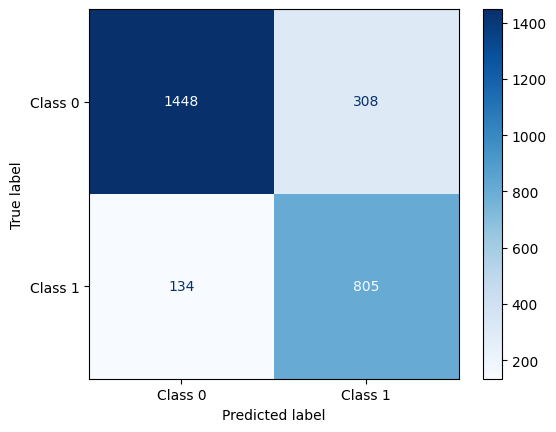

Precision: 0.72
Recall: 0.86
F1 Score: 0.78


In [ ]:
test_df = pd.read_csv('/home/alpaco/project/drunk_prj/data/3_frame_data/degree_test_withhead.csv')
test_df.drop('Unnamed: 0',axis=1,inplace=True)


import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler


coordinate_cols = ['right_arm','left_arm','right_leg','left_leg','x1','x2','x3','x4','x5','y1','y2','y3','y4','y5']

X = test_df[coordinate_cols].values  # 34개의 좌표 피처

scaler_X = StandardScaler()
X_normalized = scaler_X.fit_transform(X)
# y_normalized = scaler_y.fit_transform(y.reshape(-1, 1)).flatten()


test_df[coordinate_cols] = X_normalized

test_X_seq, test_y_seq = create_sequences(test_df, sequence_length)





import torch
from torch.utils.data import TensorDataset,DataLoader



# 학습 데이터와 테스트 데이터를 PyTorch 텐서로 변환하여 모델 학습에 사용합니다.
test_X_tensor = torch.FloatTensor(test_X_seq)
test_y_tensor = torch.LongTensor(test_y_seq)


# PyTorch의 DataLoader를 사용해 데이터를 묶어 관리할 수 있습니다.
batch_size = 16  # 배치 사이즈는 한 번에 학습하는 데이터 개수를 뜻합니다.
test_dataset = TensorDataset(test_X_tensor, test_y_tensor)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)


###########################################################################################################################################

import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score
from torch.utils.data import DataLoader, TensorDataset
import matplotlib.pyplot as plt
from tqdm import tqdm

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")



# 모델 초기화
input_size = 14
hidden_size = 50
num_layers = 1

loaded_model = TransformerModel(14,50,1)
loaded_model.load_state_dict(torch.load('/home/alpaco/project/drunk_prj/models/only_model/1205_degreewithhead2.pt'))
loaded_model.to(device)
loaded_model.eval()


import torch
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt

correct = 0
total = 0
all_preds = []
all_labels = []

with torch.no_grad():
    for inputs, labels in test_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        
        # 모델 예측
        outputs = loaded_model(inputs)
        preds = torch.sigmoid(outputs).cpu().numpy() > 0.5  # 이진 분류로 변환
        
        # 예측값과 실제값 저장
        all_preds.extend(preds.astype(int).squeeze())
        all_labels.extend(labels.cpu().numpy().astype(int).squeeze())
        
        # 정확도 계산
        correct += np.sum(preds.astype(int).squeeze() == labels.cpu().numpy())

        total += labels.size(0)

# 정확도 계산
accuracy = 100 * correct / total

print(f'Accuracy of the model on test data: {accuracy:.2f}%')

# 혼돈 행렬 계산
cm = confusion_matrix(all_labels, all_preds)

# 혼돈 행렬 출력
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Class 0', 'Class 1'])
disp.plot(cmap=plt.cm.Blues)
plt.show()

# Precision, Recall, F1-Score 계산
precision = precision_score(all_labels, all_preds)
recall = recall_score(all_labels, all_preds)
f1 = f1_score(all_labels, all_preds)

print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')



In [8]:
import pandas as pd
import numpy as np

def calculate_angle(pointA, pointB, pointC):
    # 벡터 계산
    BA = np.array(pointA) - np.array(pointB)
    BC = np.array(pointC) - np.array(pointB)
    
    # 내적과 벡터 크기 계산
    dot_product = np.dot(BA, BC)
    magnitude_BA = np.linalg.norm(BA)
    magnitude_BC = np.linalg.norm(BC)
    
    # 각도 계산 (라디안 -> 도)
    cos_theta = dot_product / (magnitude_BA * magnitude_BC + 1e-6)  # 1e-6은 0으로 나누는 오류 방지
    angle = np.arccos(np.clip(cos_theta, -1.0, 1.0))
    return np.degrees(angle)

def calculate_head_coordinates_for_csv(csv_path, output_path):
    # CSV 파일 읽기
    df = pd.read_csv(csv_path)

    # 얼굴에 해당하는 키포인트 인덱스 (1, 2, 3, 4, 5)
    face_indices = [1, 2, 3, 4, 5]

    # x_head와 y_head를 계산하여 새로운 열로 추가
    x_columns = [f"x{i}" for i in range(1, 18)]  # x1 ~ x17
    y_columns = [f"y{i}" for i in range(1, 18)]  # y1 ~ y17

    def calculate_head(row):
        x_values = [row[f"x{i}"] for i in face_indices if row[f"x{i}"] != 0]
        y_values = [row[f"y{i}"] for i in face_indices if row[f"y{i}"] != 0]
        x_head = np.mean(x_values) if x_values else 0
        y_head = np.mean(y_values) if y_values else 0
        return pd.Series({"x_head": x_head, "y_head": y_head})

    # 데이터프레임에 새로운 열 추가
    df[["x18", "y18"]] = df.apply(calculate_head, axis=1)
    df.drop(['x1','x2','x3','x4','x5','y1','y2','y3','y4','y5'],axis=1,inplace= True)
    
    # 결과 CSV 파일로 저장
    df.to_csv(output_path, index=False)
    print(f"결과가 {output_path}에 저장되었습니다.")
    
    # 입력 CSV 경로와 출력 경로 설정
input_csv = "/home/alpaco/project/drunk_prj/data/3_frame_data/final_3frame_test.csv"
output_csv = "/home/alpaco/project/drunk_prj/data/3_frame_data/final_test_onehead.csv"

# 얼굴 중심 좌표 계산
calculate_head_coordinates_for_csv(input_csv, output_csv)


결과가 /home/alpaco/project/drunk_prj/data/3_frame_data/final_test_onehead.csv에 저장되었습니다.


In [9]:


# CSV 파일 로드
file_path = "/home/alpaco/project/drunk_prj/data/3_frame_data/final_test_onehead.csv"  # 파일 경로
data = pd.read_csv(file_path)

# 각도 계산을 위한 키포인트 인덱스
# 예: 오른팔 (6, 8, 10), 왼팔 (5, 7, 9)
keypoint_indices = {
    "right_arm": ("x7","y7", "x9","y9", "x11","y11"),
    "left_arm": ("x6","y6", "x8","y8", "x10","y10"),
    "right_leg": ("x13","y13", "x15","y15","x17","y17"),
    "left_leg":("x12","y12","x14","y14","x16","y16")
}

angles = []  # 각도를 저장할 리스트

# 데이터프레임 순회
for _, row in data.iterrows():
    frame_angles = {}
    for part, (xA, yA, xB, yB, xC, yC) in keypoint_indices.items():
        pointA = (row[xA], row[yA])
        pointB = (row[xB], row[yB])
        pointC = (row[xC], row[yC])
        frame_angles[part] = calculate_angle(pointA, pointB, pointC)
    
    angles.append(frame_angles)

angle_df = pd.DataFrame(angles)
angle_df['FILENAME'] = data['FILENAME']
angle_df['y'] = data['y']
angle_df["frame"] = data['frame']
angle_df['label']=data['label']
angle_df['head_x'] = data['x18']
angle_df['head_y'] = data['y18']

angle_df.to_csv('/home/alpaco/project/drunk_prj/data/3_frame_data/degree_test_onehead.csv')

In [7]:
angle_df = pd.read_csv('/home/alpaco/project/drunk_prj/data/3_frame_data/degree_combined_onehead.csv')
angle_df.drop('Unnamed: 0',axis=1,inplace=True)
#스케일링 진행 후
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler


coordinate_cols = ['right_arm','left_arm','right_leg','left_leg','head_x','head_y']
X = angle_df[coordinate_cols].values  # 34개의 좌표 피처

scaler_X = StandardScaler()
X_normalized = scaler_X.fit_transform(X)
#y_normalized = scaler_y.fit_transform(y.reshape(-1, 1)).flatten()


angle_df[coordinate_cols] = X_normalized



# 6. sequence length 생성하기
import numpy as np
#Sequence Lenght 설정 후 진행 예정
def create_sequences(df, seq_length):
    xs, ys = [], []
    
    # 'FILENAME'과 'label' 기준으로 그룹화
    for _, group in df.groupby(['FILENAME', 'label']):
        # 그룹 내 'frame' 기준 정렬
        group = group.sort_values(by=['frame']).reset_index(drop=True)
        
        # frame, FILENAME, label, id, y 제외한 좌표 피처
        data_X = group.drop(columns=['frame', 'FILENAME', 'label','y'], errors='ignore').values  
        
        data_y = group['y'].values  # 이진 분류 레이블
        
        # 시퀀스 생성
        for i in range(len(data_X) - seq_length+1):
            x = data_X[i:i + seq_length]
            y = data_y[i + seq_length - 1]  # 시퀀스의 마지막 레이블 사용
            xs.append(x)
            ys.append(y)
    
    return np.array(xs), np.array(ys)

sequence_length = 90

# 시퀀스 생성
X_seq, Y_seq = create_sequences(angle_df, sequence_length)

from sklearn.model_selection import train_test_split
import torch
from torch.utils.data import TensorDataset,DataLoader


# 학습 데이터와 테스트 데이터로 나누고, 라벨의 비율을 유지합니다.
train_X, valid_X, train_y, valid_y = train_test_split(X_seq, Y_seq, test_size=0.2, stratify=Y_seq, random_state=42)

# 학습 데이터를 다시 셔플하여 모델이 순서에 너무 의존하지 않도록 합니다.
train_indices = np.arange(len(train_X))
np.random.shuffle(train_indices)
train_X, train_y = train_X[train_indices], train_y[train_indices]


# 학습 데이터와 테스트 데이터를 PyTorch 텐서로 변환하여 모델 학습에 사용합니다.
train_X_tensor = torch.FloatTensor(train_X)
train_y_tensor = torch.LongTensor(train_y)
valid_X_tensor = torch.FloatTensor(valid_X)
valid_y_tensor = torch.LongTensor(valid_y)

# PyTorch의 DataLoader를 사용해 데이터를 묶어 관리할 수 있습니다.
batch_size = 16  # 배치 사이즈는 한 번에 학습하는 데이터 개수를 뜻합니다.
train_dataset = TensorDataset(train_X_tensor, train_y_tensor)
valid_dataset = TensorDataset(valid_X_tensor, valid_y_tensor)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
valid_loader = DataLoader(valid_dataset, batch_size=batch_size, shuffle=False)




import torch
from torch.utils.data import DataLoader
from transformers import AdamW, RobertaConfig, RobertaModel


# Transformer 모델을 위한 설정
class TransformerModel(torch.nn.Module):
    def __init__(self, input_size, hidden_size, num_classes, num_heads=2, num_layers=4, dropout=0.1):
        super(TransformerModel, self).__init__()
        
        # Multi-Head Attention 레이어
        self.attention = torch.nn.MultiheadAttention(embed_dim=input_size, num_heads=num_heads, dropout=dropout)
        
        # Transformer Encoder
        self.transformer = torch.nn.TransformerEncoder(
            torch.nn.TransformerEncoderLayer(d_model=input_size, nhead=num_heads, dim_feedforward=hidden_size, dropout=dropout), 
            num_layers=num_layers
        )
        
        # Fully connected layers
        self.fc = torch.nn.Sequential(
            torch.nn.Linear(input_size, hidden_size),
            torch.nn.ReLU(),
            torch.nn.Dropout(dropout),
            torch.nn.Linear(hidden_size, num_classes)
        )

    def forward(self, x):
        # 시퀀스 길이, 배치 크기, 특성 차원에 맞게 변환
        x = x.transpose(0, 1)  # Transformer는 (seq_len, batch_size, features)의 형태를 기대함
        
        # Attention 통과
        attn_output, _ = self.attention(x, x, x)
        
        # Transformer Encoder 통과
        transformer_output = self.transformer(attn_output)
        
        # 마지막 시퀀스 출력을 사용 (기본적으로 클래스 레이블 예측)
        output = transformer_output[-1, :, :]
        
        # Fully connected layers 통과
        output = self.fc(output)
        
        return output

# 모델 인스턴스 생성
input_size = 6 # 입력 특징의 크기
hidden_size = 50
num_classes = 1  # 이진 분류
model = TransformerModel(input_size, hidden_size, num_classes)

# 손실 함수 및 옵티마이저
criterion = torch.nn.BCEWithLogitsLoss()
optimizer = torch.optim.NAdam(model.parameters(), lr=0.001)

# 훈련 루프
epochs = 50
for epoch in range(epochs):
    model.train()
    for batch_X, batch_y in train_loader:
        optimizer.zero_grad()
        
        # 모델 예측
        output = model(batch_X)
        
        # 손실 계산
        loss = criterion(output.squeeze(), batch_y.float())
        
        # 역전파
        loss.backward()
        optimizer.step()

    print(f"Epoch {epoch+1}, Loss: {loss.item()}")




/home/alpaco/anaconda3/envs/test/lib/python3.8/site-packages/torch/nn/modules/transformer.py:307: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(f"enable_nested_tensor is True, but self.use_nested_tensor is False because {why_not_sparsity_fast_path}")


Epoch 1, Loss: 0.014883719384670258
Epoch 2, Loss: 0.0009586727828718722
Epoch 3, Loss: 0.0016589072765782475
Epoch 4, Loss: 0.00027685592067427933
Epoch 5, Loss: 0.0004059815837536007
Epoch 6, Loss: 7.701945287408307e-05
Epoch 7, Loss: 0.00017196114640682936
Epoch 8, Loss: 5.1766248361673206e-05
Epoch 9, Loss: 2.8751264835591428e-05
Epoch 10, Loss: 7.226972957141697e-05
Epoch 11, Loss: 0.0003938117588404566
Epoch 12, Loss: 4.753976463689469e-05
Epoch 13, Loss: 6.494703484349884e-06
Epoch 14, Loss: 8.922156666812953e-06
Epoch 15, Loss: 2.1165964426472783e-05
Epoch 16, Loss: 2.6530385639489396e-06
Epoch 17, Loss: 2.14610445254948e-05
Epoch 18, Loss: 0.0003706550342030823
Epoch 19, Loss: 1.3137268979335204e-06
Epoch 20, Loss: 7.141207788663451e-06
Epoch 21, Loss: 9.588532702764496e-05
Epoch 22, Loss: 5.337919446901651e-06
Epoch 23, Loss: 1.5386856375698699e-06
Epoch 24, Loss: 7.701517461100593e-06
Epoch 25, Loss: 0.0003211763978470117
Epoch 26, Loss: 2.5165586521325167e-06
Epoch 27, Loss

In [10]:
torch.save(model.state_dict(),'/home/alpaco/project/drunk_prj/models/only_model/1205_degreeonehhead.pt')


In [ ]:
import pandas as pd
import numpy as np
def calculate_angle(pointA, pointB, pointC):
    # 벡터 계산
    BA = np.array(pointA) - np.array(pointB)
    BC = np.array(pointC) - np.array(pointB)
    # 내적과 벡터 크기 계산
    dot_product = np.dot(BA, BC)
    magnitude_BA = np.linalg.norm(BA)
    magnitude_BC = np.linalg.norm(BC)
    # 각도 계산 (라디안 -> 도)
    cos_theta = dot_product / (magnitude_BA * magnitude_BC + 1e-6)  # 1e-6은 0으로 나누는 오류 방지
    angle = np.arccos(np.clip(cos_theta, -1.0, 1.0))
    return np.degrees(angle)


# CSV 파일 로드
file_path = '/home/alpaco/project/drunk_prj/data/3_frame_data/first_test_interpolation2.csv'  # 파일 경로
data = pd.read_csv(file_path)
# 각도 계산을 위한 키포인트 인덱스
# 예: 오른팔 (6, 8, 10), 왼팔 (5, 7, 9)
keypoint_indices = {
    "right_arm": ("x7","y7", "x9","y9", "x11","y11"),
    "left_arm": ("x6","y6", "x8","y8", "x10","y10"),
    "right_leg": ("x13","y13", "x15","y15","x17","y17"),
    "left_leg":("x12","y12","x14","y14","x16","y16")
}
angles = []  # 각도를 저장할 리스트
# 데이터프레임 순회
for _, row in data.iterrows():
    frame_angles = {}
    for part, (xA, yA, xB, yB, xC, yC) in keypoint_indices.items():
        pointA = (row[xA], row[yA])
        pointB = (row[xB], row[yB])
        pointC = (row[xC], row[yC])
        frame_angles[part] = calculate_angle(pointA, pointB, pointC)
    angles.append(frame_angles)
angle_df = pd.DataFrame(angles)
angle_df['FILENAME'] = data['FILENAME']
angle_df['y'] = data['y']
angle_df["frame"] = data['frame']
angle_df['label']=data['label']



angle_df.to_csv('/home/alpaco/project/drunk_prj/data/3_frame_data/degree_combined_interpol.csv')

/home/alpaco/anaconda3/envs/test/lib/python3.8/site-packages/torch/nn/modules/transformer.py:307: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(f"enable_nested_tensor is True, but self.use_nested_tensor is False because {why_not_sparsity_fast_path}")
/tmp/ipykernel_677139/1538456503.py:66: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be load

Accuracy of the model on test data: 84.45%


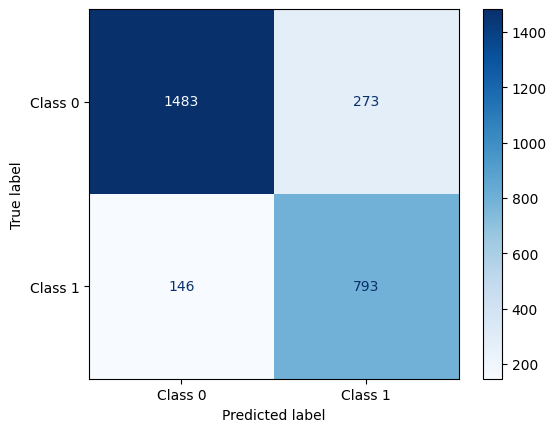

Precision: 0.74
Recall: 0.84
F1 Score: 0.79


In [50]:


test_df = pd.read_csv('/home/alpaco/project/drunk_prj/data/3_frame_data/degree_test_onehead.csv')
test_df.drop('Unnamed: 0',axis=1,inplace=True)


import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler


coordinate_cols = ['right_arm','left_arm','right_leg','left_leg','head_x','head_y']

X = test_df[coordinate_cols].values  # 34개의 좌표 피처

scaler_X = StandardScaler()
X_normalized = scaler_X.fit_transform(X)
# y_normalized = scaler_y.fit_transform(y.reshape(-1, 1)).flatten()


test_df[coordinate_cols] = X_normalized

test_X_seq, test_y_seq = create_sequences(test_df, sequence_length)





import torch
from torch.utils.data import TensorDataset,DataLoader



# 학습 데이터와 테스트 데이터를 PyTorch 텐서로 변환하여 모델 학습에 사용합니다.
test_X_tensor = torch.FloatTensor(test_X_seq)
test_y_tensor = torch.LongTensor(test_y_seq)


# PyTorch의 DataLoader를 사용해 데이터를 묶어 관리할 수 있습니다.
batch_size = 16  # 배치 사이즈는 한 번에 학습하는 데이터 개수를 뜻합니다.
test_dataset = TensorDataset(test_X_tensor, test_y_tensor)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)


###########################################################################################################################################

import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score
from torch.utils.data import DataLoader, TensorDataset
import matplotlib.pyplot as plt
from tqdm import tqdm

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")



# 모델 초기화
input_size = 6
hidden_size = 50
num_layers = 1

loaded_model = TransformerModel(input_size,hidden_size,num_layers)
loaded_model.load_state_dict(torch.load('/home/alpaco/project/drunk_prj/models/only_model/1205_degreeonehhead.pt'))
loaded_model.to(device)
loaded_model.eval()


import torch
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt

correct = 0
total = 0
all_preds = []
all_labels = []

with torch.no_grad():
    for inputs, labels in test_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        
        # 모델 예측
        outputs = loaded_model(inputs)
        preds = torch.sigmoid(outputs).cpu().numpy() > 0.5  # 이진 분류로 변환
        
        # 예측값과 실제값 저장
        all_preds.extend(preds.astype(int).squeeze())
        all_labels.extend(labels.cpu().numpy().astype(int).squeeze())
        
        # 정확도 계산
        correct += np.sum(preds.astype(int).squeeze() == labels.cpu().numpy())

        total += labels.size(0)

# 정확도 계산
accuracy = 100 * correct / total

print(f'Accuracy of the model on test data: {accuracy:.2f}%')

# 혼돈 행렬 계산
cm = confusion_matrix(all_labels, all_preds)

# 혼돈 행렬 출력
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Class 0', 'Class 1'])
disp.plot(cmap=plt.cm.Blues)
plt.show()

# Precision, Recall, F1-Score 계산
precision = precision_score(all_labels, all_preds)
recall = recall_score(all_labels, all_preds)
f1 = f1_score(all_labels, all_preds)

print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')



# Degree with Bert, LSTM

In [22]:
angle_df = pd.read_csv('/home/alpaco/project/drunk_prj/data/3_frame_data/degree_combined.csv')
angle_df.drop('Unnamed: 0',axis=1,inplace=True)
#스케일링 진행 후
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler


coordinate_cols = ['right_arm','left_arm','right_leg','left_leg']
X = angle_df[coordinate_cols].values  # 34개의 좌표 피처

scaler_X = StandardScaler()
X_normalized = scaler_X.fit_transform(X)
#y_normalized = scaler_y.fit_transform(y.reshape(-1, 1)).flatten()


angle_df[coordinate_cols] = X_normalized


In [23]:
angle_df

,right_arm,left_arm,right_leg,left_leg,FILENAME,y,frame,label
0,0.147797,1.702799,1.175223,0.198660,C_32_8_smp_su_09-11_11-43-00_b_for_DF2_label1,0,6,1.0
1,0.147797,1.277608,1.298180,1.308527,C_32_8_smp_su_09-11_11-43-00_b_for_DF2_label1,0,7,1.0
2,0.147797,1.402886,0.702736,0.709738,C_32_8_smp_su_09-11_11-43-00_b_for_DF2_label1,0,8,1.0
3,1.402621,0.831924,0.810964,1.409708,C_32_8_smp_su_09-11_11-43-00_b_for_DF2_label1,0,9,1.0
4,-0.447156,1.770379,1.027621,0.764657,C_32_8_smp_su_09-11_11-43-00_b_for_DF2_label1,0,10,1.0
...,...,...,...,...,...,...,...,...
78419,-0.099209,-1.541876,-1.888366,-1.785641,278-3_cam01_drunken03_place03_night_summer_411...,1,95,ID: tensor(602.)
78420,-0.114346,-1.543021,-1.888824,-2.018503,278-3_cam01_drunken03_place03_night_summer_411...,1,96,ID: tensor(602.)
78421,-0.116652,-1.540482,-1.889738,-1.726800,278-3_cam01_drunken03_place03_night_summer_411...,1,97,ID: tensor(602.)
78422,-0.081206,-1.539369,-1.889285,-1.471115,278-3_cam01_drunken03_place03_night_summer_411...,1,98,ID: tensor(602.)


In [33]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler


# 6. sequence length 생성하기
import numpy as np
#Sequence Lenght 설정 후 진행 예정
def create_sequences(df, seq_length):
    xs, ys = [], []
    
    # 'FILENAME'과 'label' 기준으로 그룹화
    for _, group in df.groupby(['FILENAME', 'label']):
        # 그룹 내 'frame' 기준 정렬
        group = group.sort_values(by=['frame']).reset_index(drop=True)
        
        # frame, FILENAME, label, id, y 제외한 좌표 피처
        data_X = group.drop(columns=['frame', 'FILENAME', 'label','y'], errors='ignore').values  
        
        data_y = group['y'].values  # 이진 분류 레이블
        
        # 시퀀스 생성
        for i in range(len(data_X) - seq_length+1):
            x = data_X[i:i + seq_length]
            y = data_y[i + seq_length - 1]  # 시퀀스의 마지막 레이블 사용
            xs.append(x)
            ys.append(y)
    
    return np.array(xs), np.array(ys)

sequence_length = 90

# 시퀀스 생성
X_seq, Y_seq = create_sequences(angle_df, sequence_length)


from sklearn.model_selection import train_test_split
import torch
from torch.utils.data import TensorDataset,DataLoader
# 학습 데이터와 테스트 데이터로 나누고, 라벨의 비율을 유지합니다.
train_X, valid_X, train_y, valid_y = train_test_split(X_seq, Y_seq, test_size=0.2, stratify=Y_seq, random_state=42)

# 학습 데이터를 다시 셔플하여 모델이 순서에 너무 의존하지 않도록 합니다.
train_indices = np.arange(len(train_X))
np.random.shuffle(train_indices)
train_X, train_y = train_X[train_indices], train_y[train_indices]


# 학습 데이터와 테스트 데이터를 PyTorch 텐서로 변환하여 모델 학습에 사용합니다.
train_X_tensor = torch.FloatTensor(train_X)
train_y_tensor = torch.LongTensor(train_y)
valid_X_tensor = torch.FloatTensor(valid_X)
valid_y_tensor = torch.LongTensor(valid_y)


# 텐서 타입 확인
train_X_tensor = train_X_tensor.float()
valid_X_tensor = valid_X_tensor.float()

train_y_tensor = train_y_tensor.float()
valid_y_tensor = valid_y_tensor.float()

# PyTorch의 DataLoader를 사용해 데이터를 묶어 관리할 수 있습니다.
batch_size = 16  # 배치 사이즈는 한 번에 학습하는 데이터 개수를 뜻합니다.
train_dataset = TensorDataset(train_X_tensor, train_y_tensor)
valid_dataset = TensorDataset(valid_X_tensor, valid_y_tensor)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
valid_loader = DataLoader(valid_dataset, batch_size=batch_size, shuffle=False)


###########################################################################################################################################

import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score
from torch.utils.data import DataLoader, TensorDataset
import matplotlib.pyplot as plt
from tqdm import tqdm
from transformers import BertModel, BertConfig


class BertForKeypointClassification(nn.Module):
    def __init__(self, input_size, sequence_length, hidden_size=256, num_classes=1):
        super(BertForKeypointClassification, self).__init__()
        # BERT 설정
        config = BertConfig(
            hidden_size=hidden_size,
            num_attention_heads=8,
            num_hidden_layers=4,
            intermediate_size=hidden_size * 4,
            max_position_embeddings=sequence_length,
            vocab_size=1  # 가상의 토큰 ID
        )
        self.bert = BertModel(config)
        
        # 입력 차원 조정
        self.input_proj = nn.Linear(input_size, hidden_size)
        
        # 분류기
        self.classifier = nn.Sequential(
            nn.Linear(hidden_size, 128),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(128, num_classes),
            nn.Sigmoid()  # 이진 분류용
        )

    def forward(self, x):
        # x: (batch_size, seq_len, input_size)
        x = self.input_proj(x)  # (batch_size, seq_len, hidden_size)
        bert_output = self.bert(inputs_embeds=x)  # BERT의 출력
        pooled_output = bert_output.pooler_output  # [CLS] 토큰의 출력
        return self.classifier(pooled_output)  # 분류 결과


# 모델 초기화
input_size = 4  # x1~x17, y1~y17
sequence_length = 90
hidden_size = 256
num_classes = 1  # 이진 분류
model = BertForKeypointClassification(input_size, sequence_length, hidden_size, num_classes)
model.to(device)
# 손실 함수와 옵티마이저 설정
criterion = nn.BCELoss()
optimizer = torch.optim.NAdam(model.parameters(), lr=0.001)

# 학습 실행
device = torch.device("cuda:2" if torch.cuda.is_available() else "cpu")
epochs = 50

# 학습 및 검증 함수
def evaluate(model, val_loader):
    model.eval()
    all_preds = []
    all_labels = []
    with torch.no_grad():
        for inputs, labels in val_loader:
            inputs, labels = inputs.to(device), labels.to(device).float()
            outputs = model(inputs)
            preds = torch.sigmoid(outputs).cpu().numpy() > 0.5
            all_preds.extend(preds.astype(int))
            all_labels.extend(labels.cpu().numpy().astype(int))

    # F1 Score 계산
    f1 = f1_score(all_labels, all_preds)
    return f1


def train_model(model, train_loader, criterion, optimizer, device, epochs):
    model.to(device)
    model.train()

    for epoch in range(epochs):
        epoch_loss = 0.0
        correct = 0
        total = 0

        for sequences, labels in tqdm(train_loader, desc=f"Epoch {epoch + 1}/{epochs}"):
            sequences, labels = sequences.to(device), labels.to(device)

            # 초기화
            optimizer.zero_grad()
            
            # 모델 예측 및 손실 계산
            outputs = model(sequences).squeeze()  # (batch_size,)
            loss = criterion(outputs, labels)
            
            # 역전파 및 최적화
            loss.backward()
            optimizer.step()

            # 손실 및 정확도 업데이트
            epoch_loss += loss.item()
            predictions = (outputs > 0.5).float()
            correct += (predictions == labels).sum().item()
            total += labels.size(0)

        accuracy = correct / total
        print(f"Epoch {epoch + 1}/{epochs}, Loss: {epoch_loss:.4f}, Accuracy: {accuracy:.4f}")
    print("Training Complete.")

# 모델 초기화
input_size = 4  # x1~x17, y1~y17
sequence_length = 90
hidden_size = 256
num_classes = 1  # 이진 분류
model = BertForKeypointClassification(input_size, sequence_length, hidden_size, num_classes)

# 손실 함수와 옵티마이저 설정
criterion = nn.BCELoss()
optimizer = torch.optim.NAdam(model.parameters(), lr=0.001)

# 학습 실행
device = torch.device("cuda:2" if torch.cuda.is_available() else "cpu")
epochs = 50
train_model(model, train_loader, criterion, optimizer, device, epochs)


Epoch 1/50: 100%|██████████| 165/165 [00:02<00:00, 64.92it/s]


Epoch 1/50, Loss: 2.2174, Accuracy: 0.9970


Epoch 2/50: 100%|██████████| 165/165 [00:02<00:00, 70.43it/s]


Epoch 2/50, Loss: 0.0067, Accuracy: 1.0000


Epoch 3/50: 100%|██████████| 165/165 [00:02<00:00, 71.31it/s]


Epoch 3/50, Loss: 0.0026, Accuracy: 1.0000


Epoch 4/50: 100%|██████████| 165/165 [00:02<00:00, 70.29it/s]


Epoch 4/50, Loss: 0.0015, Accuracy: 1.0000


Epoch 5/50: 100%|██████████| 165/165 [00:02<00:00, 75.38it/s]


Epoch 5/50, Loss: 0.0009, Accuracy: 1.0000


Epoch 6/50: 100%|██████████| 165/165 [00:02<00:00, 78.55it/s]


Epoch 6/50, Loss: 0.0006, Accuracy: 1.0000


Epoch 7/50: 100%|██████████| 165/165 [00:02<00:00, 74.00it/s]


Epoch 7/50, Loss: 0.0004, Accuracy: 1.0000


Epoch 8/50: 100%|██████████| 165/165 [00:02<00:00, 68.35it/s]


Epoch 8/50, Loss: 0.0003, Accuracy: 1.0000


Epoch 9/50: 100%|██████████| 165/165 [00:02<00:00, 73.67it/s]


Epoch 9/50, Loss: 0.0002, Accuracy: 1.0000


Epoch 10/50: 100%|██████████| 165/165 [00:02<00:00, 75.06it/s]


Epoch 10/50, Loss: 0.0002, Accuracy: 1.0000


Epoch 11/50: 100%|██████████| 165/165 [00:02<00:00, 68.86it/s]


Epoch 11/50, Loss: 0.0002, Accuracy: 1.0000


Epoch 12/50: 100%|██████████| 165/165 [00:02<00:00, 70.56it/s]


Epoch 12/50, Loss: 0.0001, Accuracy: 1.0000


Epoch 13/50: 100%|██████████| 165/165 [00:02<00:00, 71.34it/s]


Epoch 13/50, Loss: 0.0001, Accuracy: 1.0000


Epoch 14/50: 100%|██████████| 165/165 [00:02<00:00, 74.34it/s]


Epoch 14/50, Loss: 0.0001, Accuracy: 1.0000


Epoch 15/50: 100%|██████████| 165/165 [00:02<00:00, 67.26it/s]


Epoch 15/50, Loss: 0.0001, Accuracy: 1.0000


Epoch 16/50: 100%|██████████| 165/165 [00:02<00:00, 68.89it/s]


Epoch 16/50, Loss: 0.0001, Accuracy: 1.0000


Epoch 17/50: 100%|██████████| 165/165 [00:02<00:00, 64.60it/s]


Epoch 17/50, Loss: 0.0001, Accuracy: 1.0000


Epoch 18/50: 100%|██████████| 165/165 [00:02<00:00, 64.88it/s]


Epoch 18/50, Loss: 0.0001, Accuracy: 1.0000


Epoch 19/50: 100%|██████████| 165/165 [00:02<00:00, 67.97it/s]


Epoch 19/50, Loss: 0.0001, Accuracy: 1.0000


Epoch 20/50: 100%|██████████| 165/165 [00:02<00:00, 73.71it/s]


Epoch 20/50, Loss: 0.0000, Accuracy: 1.0000


Epoch 21/50: 100%|██████████| 165/165 [00:02<00:00, 70.83it/s]


Epoch 21/50, Loss: 0.0000, Accuracy: 1.0000


Epoch 22/50: 100%|██████████| 165/165 [00:02<00:00, 73.76it/s]


Epoch 22/50, Loss: 0.0000, Accuracy: 1.0000


Epoch 23/50: 100%|██████████| 165/165 [00:02<00:00, 72.91it/s]


Epoch 23/50, Loss: 0.0000, Accuracy: 1.0000


Epoch 24/50: 100%|██████████| 165/165 [00:02<00:00, 71.53it/s]


Epoch 24/50, Loss: 0.0000, Accuracy: 1.0000


Epoch 25/50: 100%|██████████| 165/165 [00:02<00:00, 71.20it/s]


Epoch 25/50, Loss: 0.0000, Accuracy: 1.0000


Epoch 26/50: 100%|██████████| 165/165 [00:02<00:00, 71.96it/s]


Epoch 26/50, Loss: 0.0000, Accuracy: 1.0000


Epoch 27/50: 100%|██████████| 165/165 [00:02<00:00, 72.33it/s]


Epoch 27/50, Loss: 0.0000, Accuracy: 1.0000


Epoch 28/50: 100%|██████████| 165/165 [00:02<00:00, 75.49it/s]


Epoch 28/50, Loss: 0.0000, Accuracy: 1.0000


Epoch 29/50: 100%|██████████| 165/165 [00:02<00:00, 77.98it/s]


Epoch 29/50, Loss: 0.0000, Accuracy: 1.0000


Epoch 30/50: 100%|██████████| 165/165 [00:02<00:00, 78.24it/s]


Epoch 30/50, Loss: 0.0000, Accuracy: 1.0000


Epoch 31/50: 100%|██████████| 165/165 [00:02<00:00, 78.77it/s]


Epoch 31/50, Loss: 0.0000, Accuracy: 1.0000


Epoch 32/50: 100%|██████████| 165/165 [00:02<00:00, 77.88it/s]


Epoch 32/50, Loss: 0.0000, Accuracy: 1.0000


Epoch 33/50: 100%|██████████| 165/165 [00:02<00:00, 78.84it/s]


Epoch 33/50, Loss: 0.0000, Accuracy: 1.0000


Epoch 34/50: 100%|██████████| 165/165 [00:02<00:00, 78.51it/s]


Epoch 34/50, Loss: 0.0000, Accuracy: 1.0000


Epoch 35/50: 100%|██████████| 165/165 [00:02<00:00, 78.20it/s]


Epoch 35/50, Loss: 0.0000, Accuracy: 1.0000


Epoch 36/50: 100%|██████████| 165/165 [00:02<00:00, 78.36it/s]


Epoch 36/50, Loss: 0.0000, Accuracy: 1.0000


Epoch 37/50: 100%|██████████| 165/165 [00:02<00:00, 78.34it/s]


Epoch 37/50, Loss: 0.0000, Accuracy: 1.0000


Epoch 38/50: 100%|██████████| 165/165 [00:02<00:00, 78.42it/s]


Epoch 38/50, Loss: 0.0000, Accuracy: 1.0000


Epoch 39/50: 100%|██████████| 165/165 [00:02<00:00, 78.66it/s]


Epoch 39/50, Loss: 0.0000, Accuracy: 1.0000


Epoch 40/50: 100%|██████████| 165/165 [00:02<00:00, 79.01it/s]


Epoch 40/50, Loss: 0.0000, Accuracy: 1.0000


Epoch 41/50: 100%|██████████| 165/165 [00:02<00:00, 78.18it/s]


Epoch 41/50, Loss: 0.0000, Accuracy: 1.0000


Epoch 42/50: 100%|██████████| 165/165 [00:02<00:00, 78.12it/s]


Epoch 42/50, Loss: 0.0000, Accuracy: 1.0000


Epoch 43/50: 100%|██████████| 165/165 [00:02<00:00, 79.25it/s]


Epoch 43/50, Loss: 0.0000, Accuracy: 1.0000


Epoch 44/50: 100%|██████████| 165/165 [00:02<00:00, 80.47it/s]


Epoch 44/50, Loss: 0.0000, Accuracy: 1.0000


Epoch 45/50: 100%|██████████| 165/165 [00:02<00:00, 80.71it/s]


Epoch 45/50, Loss: 0.0000, Accuracy: 1.0000


Epoch 46/50: 100%|██████████| 165/165 [00:02<00:00, 80.47it/s]


Epoch 46/50, Loss: 0.0000, Accuracy: 1.0000


Epoch 47/50: 100%|██████████| 165/165 [00:02<00:00, 80.62it/s]


Epoch 47/50, Loss: 0.0000, Accuracy: 1.0000


Epoch 48/50: 100%|██████████| 165/165 [00:02<00:00, 80.88it/s]


Epoch 48/50, Loss: 0.0000, Accuracy: 1.0000


Epoch 49/50: 100%|██████████| 165/165 [00:02<00:00, 79.76it/s]


Epoch 49/50, Loss: 0.0000, Accuracy: 1.0000


Epoch 50/50: 100%|██████████| 165/165 [00:02<00:00, 79.80it/s]

Epoch 50/50, Loss: 0.0000, Accuracy: 1.0000
Training Complete.


In [34]:
torch.save(model.state_dict(),'/home/alpaco/project/drunk_prj/models/only_model/1205_Bert.pt')


In [52]:
test_df = pd.read_csv('/home/alpaco/project/drunk_prj/data/3_frame_data/degree_test.csv')
test_df.drop('Unnamed: 0',axis=1,inplace=True)


import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler


coordinate_cols = ['right_arm','left_arm','right_leg','left_leg']

X = test_df[coordinate_cols].values  # 34개의 좌표 피처

scaler_X = StandardScaler()
X_normalized = scaler_X.fit_transform(X)
# y_normalized = scaler_y.fit_transform(y.reshape(-1, 1)).flatten()


test_df[coordinate_cols] = X_normalized

test_X_seq, test_y_seq = create_sequences(test_df, sequence_length)


/tmp/ipykernel_677139/1733674475.py:44: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  loaded_model.load_state_dict(torch.load('/home/alpaco/project/drunk_prj/models/only_mod

Accuracy of the model on test data: 84.27%


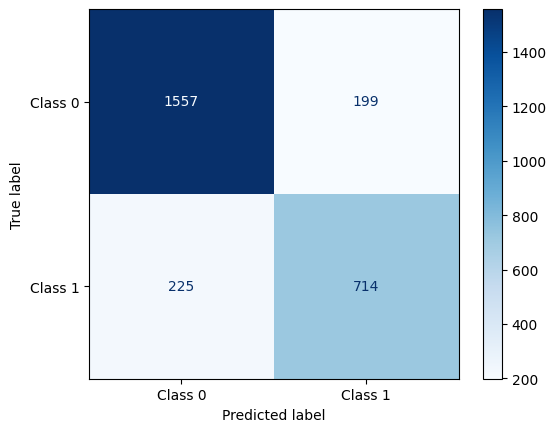

Precision: 0.78
Recall: 0.76
F1 Score: 0.77


In [53]:


import torch
from torch.utils.data import TensorDataset,DataLoader



# 학습 데이터와 테스트 데이터를 PyTorch 텐서로 변환하여 모델 학습에 사용합니다.
test_X_tensor = torch.FloatTensor(test_X_seq)
test_y_tensor = torch.LongTensor(test_y_seq)

# 텐서 타입 확인
test_X_tensor = test_X_tensor.float()
test_y_tensor = test_y_tensor.float()


# PyTorch의 DataLoader를 사용해 데이터를 묶어 관리할 수 있습니다.
batch_size = 16  # 배치 사이즈는 한 번에 학습하는 데이터 개수를 뜻합니다.
test_dataset = TensorDataset(test_X_tensor, test_y_tensor)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)


###########################################################################################################################################

import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score
from torch.utils.data import DataLoader, TensorDataset
import matplotlib.pyplot as plt
from tqdm import tqdm

device = torch.device("cuda:2" if torch.cuda.is_available() else "cpu")


# 모델 초기화
# 모델 초기화
input_size = 4  
sequence_length = 90
hidden_size = 256
num_classes = 1  # 이진 분류
loaded_model = BertForKeypointClassification(input_size, sequence_length, hidden_size, num_classes)
loaded_model.load_state_dict(torch.load('/home/alpaco/project/drunk_prj/models/only_model/1205_Bert.pt'))
loaded_model.to(device)
loaded_model.eval()


import torch
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt

correct = 0
total = 0
all_preds = []
all_labels = []

with torch.no_grad():
    for inputs, labels in test_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        
        # 모델 예측
        outputs = loaded_model(inputs)
        preds = torch.sigmoid(outputs).cpu().numpy() > 0.5  # 이진 분류로 변환
        
        # 예측값과 실제값 저장
        all_preds.extend(preds.astype(int).squeeze())
        all_labels.extend(labels.cpu().numpy().astype(int).squeeze())
        
        # 정확도 계산
        correct += np.sum(preds.astype(int).squeeze() == labels.cpu().numpy())

        total += labels.size(0)

# 정확도 계산
accuracy = 100 * correct / total

print(f'Accuracy of the model on test data: {accuracy:.2f}%')

# 혼돈 행렬 계산
cm = confusion_matrix(all_labels, all_preds)

# 혼돈 행렬 출력
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Class 0', 'Class 1'])
disp.plot(cmap=plt.cm.Blues)
plt.show()

# Precision, Recall, F1-Score 계산
precision = precision_score(all_labels, all_preds)
recall = recall_score(all_labels, all_preds)
f1 = f1_score(all_labels, all_preds)

print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')


# interpolation 넣어보기

In [ ]:
file_path = '/home/alpaco/project/drunk_prj/data/3_frame_data/final_combined.csv'

df = pd.read_csv(file_path)
df.drop('Unnamed: 0	',axis=1,inplace=True)

,Unnamed: 0,frame,x1,y1,x2,y2,x3,y3,x4,y4,...,y14,x15,y15,x16,y16,x17,y17,label,y,FILENAME
0,0,6,1710.0,711.0,1715.0,701.0,0.0,0.0,1737.0,706.0,...,1031.0,1675.0,1000.0,1720.0,1076.0,1660.0,1052.0,1.0,0,C_32_8_smp_su_09-11_11-43-00_b_for_DF2_label1
1,1,7,0.0,0.0,0.0,0.0,0.0,0.0,1621.0,659.0,...,893.0,1648.0,919.0,1480.0,939.0,1654.0,1026.0,1.0,0,C_32_8_smp_su_09-11_11-43-00_b_for_DF2_label1
2,2,8,0.0,0.0,1499.0,601.0,0.0,0.0,1516.0,602.0,...,821.0,1538.0,836.0,1461.0,891.0,1580.0,926.0,1.0,0,C_32_8_smp_su_09-11_11-43-00_b_for_DF2_label1
3,3,9,0.0,0.0,0.0,0.0,0.0,0.0,1430.0,553.0,...,802.0,1390.0,728.0,1461.0,884.0,1360.0,785.0,1.0,0,C_32_8_smp_su_09-11_11-43-00_b_for_DF2_label1
4,4,10,0.0,0.0,0.0,0.0,0.0,0.0,1352.0,500.0,...,735.0,1341.0,713.0,1376.0,797.0,1329.0,777.0,1.0,0,C_32_8_smp_su_09-11_11-43-00_b_for_DF2_label1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78419,24195,95,2533.0,1069.0,955.0,0.0,0.0,0.0,0.0,2522.0,...,2516.0,0.0,1287.0,0.0,2509.0,2497.0,1294.0,ID: tensor(602.),1,278-3_cam01_drunken03_place03_night_summer_411...
78420,24196,96,2532.0,1067.0,953.0,0.0,0.0,0.0,0.0,2527.0,...,2516.0,0.0,1287.0,0.0,2508.0,2498.0,1294.0,ID: tensor(602.),1,278-3_cam01_drunken03_place03_night_summer_411...
78421,24197,97,2528.0,1063.0,950.0,0.0,0.0,0.0,0.0,2523.0,...,2516.0,0.0,1286.0,0.0,2507.0,2498.0,1292.0,ID: tensor(602.),1,278-3_cam01_drunken03_place03_night_summer_411...
78422,24198,98,2529.0,1065.0,948.0,0.0,0.0,0.0,0.0,2526.0,...,2515.0,0.0,1286.0,0.0,2509.0,2501.0,1293.0,ID: tensor(602.),1,278-3_cam01_drunken03_place03_night_summer_411...


In [ ]:
import pandas as pd
import numpy as np

# 예제 데이터프레임 생성
df = pd.read_csv('/home/alpaco/project/drunk_prj/data/3_frame_data/final_combined.csv')

# 0인 값을 결측치로 설정 (label, frame, y, filename 제외)
cols_to_interpolate = [col for col in df.columns if col not in ['label', 'frame', 'y', 'FILENAME']]
df[cols_to_interpolate] = df[cols_to_interpolate].replace(0, np.nan)

# 그룹화 및 보간법 적용
def interpolate_group(group):
    # 프레임 정렬
    group = group.sort_values('frame')
    # 각 열에서 처음과 마지막 유효 값의 인덱스 찾기
    for col in cols_to_interpolate:
        valid_idx = group[col].first_valid_index(), group[col].last_valid_index()
        if valid_idx[0] is not None and valid_idx[1] is not None:
            # 유효 범위 내 보간
            group.loc[valid_idx[0]:valid_idx[1], col] = group.loc[valid_idx[0]:valid_idx[1], col].interpolate(method='linear', limit_direction='both')
    return group

# filename, label로 그룹화
df_interpolated = df.groupby(['FILENAME', 'label'], group_keys=False).apply(interpolate_group)

# 결과 출력



       Unnamed: 0  frame      x1      y1      x2      y2  x3      y3  x4  \
60224      6000.0      0  2022.0  1205.0  1012.0  2048.0 NaN  1197.0 NaN   
60225      6001.0      1  2059.0  1217.0  1047.0  2058.0 NaN  1206.0 NaN   
60226      6002.0      2  2086.0  1213.0  1050.0  2063.0 NaN  1201.0 NaN   
60227      6003.0      3  2117.5  1214.0  1021.0  2115.0 NaN  1179.5 NaN   
60228      6004.0      4  2149.0  1177.0   992.0  2167.0 NaN  1158.0 NaN   
...           ...    ...     ...     ...     ...     ...  ..     ...  ..   
33263     33263.0    245     NaN     NaN     NaN     NaN NaN     NaN NaN   
33264     33264.0    246     NaN     NaN     NaN     NaN NaN     NaN NaN   
33265     33265.0    247     NaN     NaN     NaN     NaN NaN     NaN NaN   
33266     33266.0    248     NaN     NaN     NaN     NaN NaN     NaN NaN   
33267     33267.0    249     NaN     NaN     NaN     NaN NaN     NaN NaN   

           y4  ...     y14     x15     y15     x16     y16     x17     y17  \
60224  19

In [60]:
df = pd.read_csv('/home/alpaco/project/drunk_prj/data/3_frame_data/final_combined.csv')

# 보간 대상 열만 추출
cols_to_check = [col for col in df.columns if col not in ['label', 'frame', 'y', 'FILENAME']]

# 조건에 맞는 행에 대해 0을 NaN으로 변환
mask = (df[cols_to_check] == 0).all(axis=1)  # ['label', 'frame', 'y', 'filename']를 제외한 값들이 모두 0인 경우
df.loc[mask, cols_to_check] = np.nan

# 그룹화 및 보간법 적용
def interpolate_group(group):
    # 프레임 정렬
    group = group.sort_values('frame')
    # 각 열에서 처음과 마지막 유효 값의 인덱스 찾기
    for col in cols_to_check:
        valid_idx = group[col].first_valid_index(), group[col].last_valid_index()
        if valid_idx[0] is not None and valid_idx[1] is not None:
            # 유효 범위 내 보간
            group.loc[valid_idx[0]:valid_idx[1], col] = group.loc[valid_idx[0]:valid_idx[1], col].interpolate(method='linear', limit_direction='both')
    return group

# filename, label로 그룹화
df_interpolated = df.groupby(['FILENAME', 'label'], group_keys=False).apply(interpolate_group)

# 결과 출력
print(df_interpolated)


df_interpolated[cols_to_interpolate] = df_interpolated[cols_to_interpolate].fillna(0)

df_interpolated.to_csv('/home/alpaco/project/drunk_prj/data/3_frame_data/first_interpolation2.csv')

       Unnamed: 0  frame      x1      y1      x2      y2   x3      y3   x4  \
60224      6000.0      0  2022.0  1205.0  1012.0  2048.0  0.0  1197.0  0.0   
60225      6001.0      1  2059.0  1217.0  1047.0  2058.0  0.0  1206.0  0.0   
60226      6002.0      2  2086.0  1213.0  1050.0  2063.0  0.0  1201.0  0.0   
60227      6003.0      3     0.0  1214.0     0.0     0.0  0.0     0.0  0.0   
60228      6004.0      4  2149.0  1177.0   992.0  2167.0  0.0  1158.0  0.0   
...           ...    ...     ...     ...     ...     ...  ...     ...  ...   
33263     33263.0    245     0.0     0.0     0.0     0.0  0.0     0.0  0.0   
33264     33264.0    246     0.0     0.0     0.0     0.0  0.0     0.0  0.0   
33265     33265.0    247     0.0     0.0     0.0     0.0  0.0     0.0  0.0   
33266     33266.0    248     0.0     0.0     0.0     0.0  0.0     0.0  0.0   
33267     33267.0    249     0.0     0.0     0.0     0.0  0.0     0.0  0.0   

           y4  ...     y14     x15     y15     x16     y16     